# Project - Classification Model untuk Produk 7

## Business Understanding: 

Machine learning (ML), bagian dari kecerdasan buatan (artificial intelligence), merupakan metode untuk mengoptimalkan performa dari sistem dengan mempelajari data sampel atau data histori (Alpaydin, 2009). Dalam kehidupan sehari-hari, obyek dapat diidentifikasi dengan mudah oleh manusia, namun belum tentu dapat dijelaskan secara spesifik. Di sinilah peran ML dalam mengenali, mengidentifikasi, ataupun memprediksi data tertentu dengan mempelajari data histori (experience data). Dengan ML, model dibuat baik secara langsung ataupun tidak, dengan mengekstrak pengetahuan dari pakar ataupun dari data yang bahkan belum diketahui hubungannya dengan cara mempelajarinya dengan algoritme tertentu.

Manfaat dari teknologi machine learning tersebut dapat kita rasakan saat ini seperti pada bidang teknologi, bisnis, pemasaran, Pendidikan, Kesehatan dan masih banyak yang lainnya.

Dalam final projek ini saya akan menprediksi produk sebuah perusahaan yang ingin ditawarkan kepada pelanggannya yaitu produk 7 dengan bantuan model machine learning, produk 7 adalah produk vending machine yang ditawarkan pada toko-toko retail atau semacamnya. Pada projek saya akan menganalisis data tingkat pelanggan yang telah dikumpulkan dan dianalisis, lalu membuat model machine learning untuk prediksi apakah produk 7 bagus atau tidak bila ditawarkan kepada pelanggan.

## Model Criteria Success: 

Recall minimal 0,7 dan FPR maksimal 0,3

## Data Understanding :

Kumpulan data tersebut mencakup data - data pelanggan yang pernah bertransaksi kepada perusahaan terhadap pembelian produk sebelumnya. Dari total 13824 transaksi yang terdiri dari trainset dan test set yang sudah dipisah, 89.19% adalah label 0 atau klasifikasi buruk bila ditawarkan ke pelanggan. Kumpulan data ini sangat tidak seimbang, dengan klasifikasi bagus menyumbang 10.8056% dari total transaksi. Kumpulan datanya juga memiliki banyak nan value pada kolom - kolom featurenya. feature 'flag' merupakan label class yaitu label class 0 dan 1, 0 artinya buruk dan 1 berarti bagus.

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
3. [Splitting the data into train & test data](#p3)
4. [Model Building](#p4)
   * [Perform Making Model with Default Cross Validation](#p4-1)
   * [Perform RandomOverSampler Method with Default Cross Validation](#p4-2)
   * [Perform RandomUnderSampler Method with Default Cross Validation](#p4-3)
   * [Oversampling with SMOTE Oversampling](#p4-4)
   * [Oversampling with ADASYN Oversampling](#p4-5)
   * [Undersampling with Nearmiss V.1 Undersampling](#p4-6)
   * [Undersampling with Nearmiss V.2 Undersampling](#p4-7)
   * [Undersampling with Nearmiss V.3 Undersampling](#p4-8)
   * [Undersampling with ENN Undersampling](#p4-9)
   * [Undersampling with TomekLink Undersampling](#p4-10)
5. [Hyperparameter Tuning](#p5)
6. [Conclusion](#p6)
7. [Backtesting](#p7)

## <a name="p1">Importing Dependencies</a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

from scipy import stats
from scipy.stats import norm, skew,skewtest
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, MaxAbsScaler, RobustScaler, PowerTransformer

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_fscore_support 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn import tree as tr


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## <a name="p2">Exploratory data analysis</a>

In [2]:
df_train = pd.read_csv('trainset.csv')

In [3]:
df_train.head()

kode pelanggan  umur kota gender  education keluarga  \
0        TLP5787   0.0    C    NaN        NaN      NaN   
1        V798888  32.0    G      F        NaN        K   
2        INX8444  28.0    L      M        NaN        K   
3        HP08456  58.0    N      M        NaN        K   
4        HBJ1138  34.0    Q      F        NaN        K   

                     Pekerjaan Penanggung Usaha  punya_produk1  ...  \
0                          NaN        NaN   NaN            0.0  ...   
1  Mahasiswa Diploma / S1 / S2        NaN   NaN            0.0  ...   
2                Usaha Mandiri        NaN   NaN            0.0  ...   
3                     Karyawan        NaN   NaN            0.0  ...   
4                Usaha Mandiri        NaN   NaN            0.0  ...   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        2.0                        7.0   
4                       37.0                       26.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     22.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                     38.0                     19.0                     24.0   

  frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      7.0   
4                    46.0                     42.0                     37.0   

         tgl data  flag  
0  04/08/23 14.17   0.0  
1  04/08/23 14.17   0.0  
2  04/08/23 14.17   0.0  
3  04/08/23 14.17   0.0  
4  04/08/23 14.17   0.0  

[5 rows x 80 columns]

In [4]:
df_test = pd.read_csv('testset.csv')
df_test.head()

kode pelanggan  umur kota gender  education keluarga      Pekerjaan  \
0        MMCZ118   3.0    I    NaN        NaN      NaN            NaN   
1        BAF3139  40.0    D      M        NaN        K  Usaha Mandiri   
2        AXG8501  26.0    J      M        NaN        K  Usaha Mandiri   
3        EBW5433  38.0    B      F        NaN        K  Usaha Mandiri   
4        ZD18222  62.0    B      M        NaN        K       Pedagang   

  Penanggung                   Usaha  punya_produk1  ...  \
0        NaN  Restoran / Rumah Makan            0.0  ...   
1        NaN                     NaN            0.0  ...   
2        NaN                     NaN            0.0  ...   
3        NaN                     NaN            0.0  ...   
4        NaN                     NaN            1.0  ...   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        7.0                        7.0   
1                        0.0                        0.0   
2                        1.0                        4.0   
3                       26.0                       23.0   
4                       55.0                       48.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                     26.0                     27.0                     14.0   
1                      7.0                      4.0                     12.0   
2                      1.0                      0.0                      0.0   
3                     38.0                     57.0                     40.0   
4                    190.0                    237.0                    217.0   

  frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  \
0                    19.0                     16.0                      8.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                    49.0                    112.0                     73.0   
4                   230.0                    187.0                    193.0   

         tgl data  flag  
0  04/08/23 14.17   0.0  
1  04/08/23 14.17   0.0  
2  04/08/23 14.17   1.0  
3  04/08/23 14.17   0.0  
4  04/08/23 14.17   0.0  

[5 rows x 80 columns]

In [5]:
# cek shape dari masing - masing dataset
df_train.shape, df_test.shape

((11059, 80), (2765, 80))

In [6]:
# cek untuk memeriksa distribusi nilai numerik dalam kumpulan data
df_train.describe()

umur  education  punya_produk1  punya_produk2  punya_produk3  \
count  10898.000000        0.0   10902.000000   10902.000000   10902.000000   
mean      34.694164        NaN       0.321317       0.570813       0.876720   
std       16.658376        NaN       0.467004       0.494983       0.328774   
min       -3.000000        NaN       0.000000       0.000000       0.000000   
25%       28.000000        NaN       0.000000       0.000000       1.000000   
50%       37.000000        NaN       0.000000       1.000000       1.000000   
75%       45.000000        NaN       1.000000       1.000000       1.000000   
max       96.000000        NaN       1.000000       1.000000       1.000000   

       punya_produk4  punya_produk5  punya_produk6  omset  penghasilan  ...  \
count   10902.000000   10902.000000   10902.000000    0.0          0.0  ...   
mean        0.263254       0.087507       0.256375    NaN          NaN  ...   
std         0.440420       0.282589       0.436651    NaN          NaN  ...   
min         0.000000       0.000000       0.000000    NaN          NaN  ...   
25%         0.000000       0.000000       0.000000    NaN          NaN  ...   
50%         0.000000       0.000000       0.000000    NaN          NaN  ...   
75%         1.000000       0.000000       1.000000    NaN          NaN  ...   
max         1.000000       1.000000       1.000000    NaN          NaN  ...   

       frekuensi_pengeluaran_4BT  frekuensi_pengeluaran_5BT  \
count               11059.000000               11059.000000   
mean                  101.491817                  96.429967   
std                   447.472845                 422.525973   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                    25.000000                  23.000000   
max                 19304.000000               14943.000000   

       frekuensi_pengeluaran_6BT  frekuensi_pemasukan_1BT  \
count               11059.000000             11059.000000   
mean                   89.672846                57.752600   
std                   384.838604               301.501284   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 2.000000   
75%                    21.000000                25.000000   
max                 12215.000000             23082.000000   

       frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
count             11059.000000             11059.000000   
mean                 55.387648                51.984357   
std                 284.921281               272.411872   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   1.000000                 0.000000   
75%                  22.000000                19.000000   
max               21853.000000             20709.000000   

       frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  \
count             11059.000000             11059.000000   
mean                 51.748711                49.291166   
std                 268.896075               238.954966   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                  17.000000                16.000000   
max               19270.000000             14804.000000   

       frekuensi_pemasukan_6BT          flag  
count             11059.000000  11059.000000  
mean                 46.466679      0.108057  
std                 225.929259      0.310466  
min                   0.000000      0.000000  
25%                   0.000000      0.000000  
50%                   0.000000      0.000000  
75%                  14.000000      0.000000  
max               12173.000000   

In [7]:
# Memeriksa tipe data dan distribusi NaN/nonNaN dan dikonversi kedalam persen
df_train.isna().sum()/len(df_train)*100

kode pelanggan               0.000000
umur                         1.455828
kota                         1.419658
gender                      18.048648
education                  100.000000
                              ...    
frekuensi_pemasukan_4BT      0.000000
frekuensi_pemasukan_5BT      0.000000
frekuensi_pemasukan_6BT      0.000000
tgl data                     0.000000
flag                         0.000000
Length: 80, dtype: float64

In [8]:
# cek korelasi antar feature
corr_train = df_train.corr()
corr_train

umur  education  punya_produk1  punya_produk2  \
umur                     1.000000        NaN       0.175665       0.055732   
education                     NaN        NaN            NaN            NaN   
punya_produk1            0.175665        NaN       1.000000       0.241062   
punya_produk2            0.055732        NaN       0.241062       1.000000   
punya_produk3            0.560206        NaN       0.211415       0.157369   
...                           ...        ...            ...            ...   
frekuensi_pemasukan_3BT  0.016086        NaN       0.009264       0.026785   
frekuensi_pemasukan_4BT  0.024422        NaN       0.006849       0.026068   
frekuensi_pemasukan_5BT  0.027723        NaN       0.013737       0.031177   
frekuensi_pemasukan_6BT  0.029710        NaN       0.009184       0.033232   
flag                    -0.011823        NaN       0.010488       0.045722   

                         punya_produk3  punya_produk4  punya_produk5  \
umur                          0.560206      -0.327610       0.116200   
education                          NaN            NaN            NaN   
punya_produk1                 0.211415      -0.120058       0.076090   
punya_produk2                 0.157369      -0.051436       0.024557   
punya_produk3                 1.000000      -0.627317       0.047995   
...                                ...            ...            ...   
frekuensi_pemasukan_3BT       0.034472      -0.005439       0.040020   
frekuensi_pemasukan_4BT       0.036996      -0.008890       0.047118   
frekuensi_pemasukan_5BT       0.040404      -0.010352       0.052402   
frekuensi_pemasukan_6BT       0.038367      -0.008384       0.043026   
flag                         -0.024066       0.029982       0.018305   

                         punya_produk6  omset  penghasilan  ...  \
umur                          0.157846    NaN          NaN  ...   
education                          NaN    NaN          NaN  ...   
punya_produk1                 0.088136    NaN          NaN  ...   
punya_produk2                 0.060091    NaN          NaN  ...   
punya_produk3                 0.135192    NaN          NaN  ...   
...                                ...    ...          ...  ...   
frekuensi_pemasukan_3BT       0.071322    NaN          NaN  ...   
frekuensi_pemasukan_4BT       0.075706    NaN          NaN  ...   
frekuensi_pemasukan_5BT       0.081845    NaN          NaN  ...   
frekuensi_pemasukan_6BT       0.089046    NaN          NaN  ...   
flag                         -0.052392    NaN          NaN  ...   

                         frekuensi_pengeluaran_4BT  frekuensi_pengeluaran_5BT  \
umur                                      0.062647                   0.064908   
education                                      NaN                        NaN   
punya_produk1                             0.027962                   0.032249   
punya_produk2                             0.069171                   0.070903   
punya_produk3                             0.078099                   0.078304   
...                                            ...                        ...   
frekuensi_pemasukan_3BT                   0.629943                   0.573085   
frekuensi_pemasukan_4BT                   0.622933                   0.567593   
frekuensi_pemasukan_5BT                   0.600594                   0.597773   
frekuensi_pemasukan_6BT                   0.574548                   0.542063   
flag                                     -0.062371                  -0.062581   

                         frekuensi_pengeluaran_6BT  frekuensi_pemasukan_1BT  \
umur                                      0.068450                 0.017091   
education                                      NaN                      NaN   
punya_produk1                             0.033532                 0.010149   
punya_produk2                             0.075222                 0.033497   
punya_produk3                             0.079363    

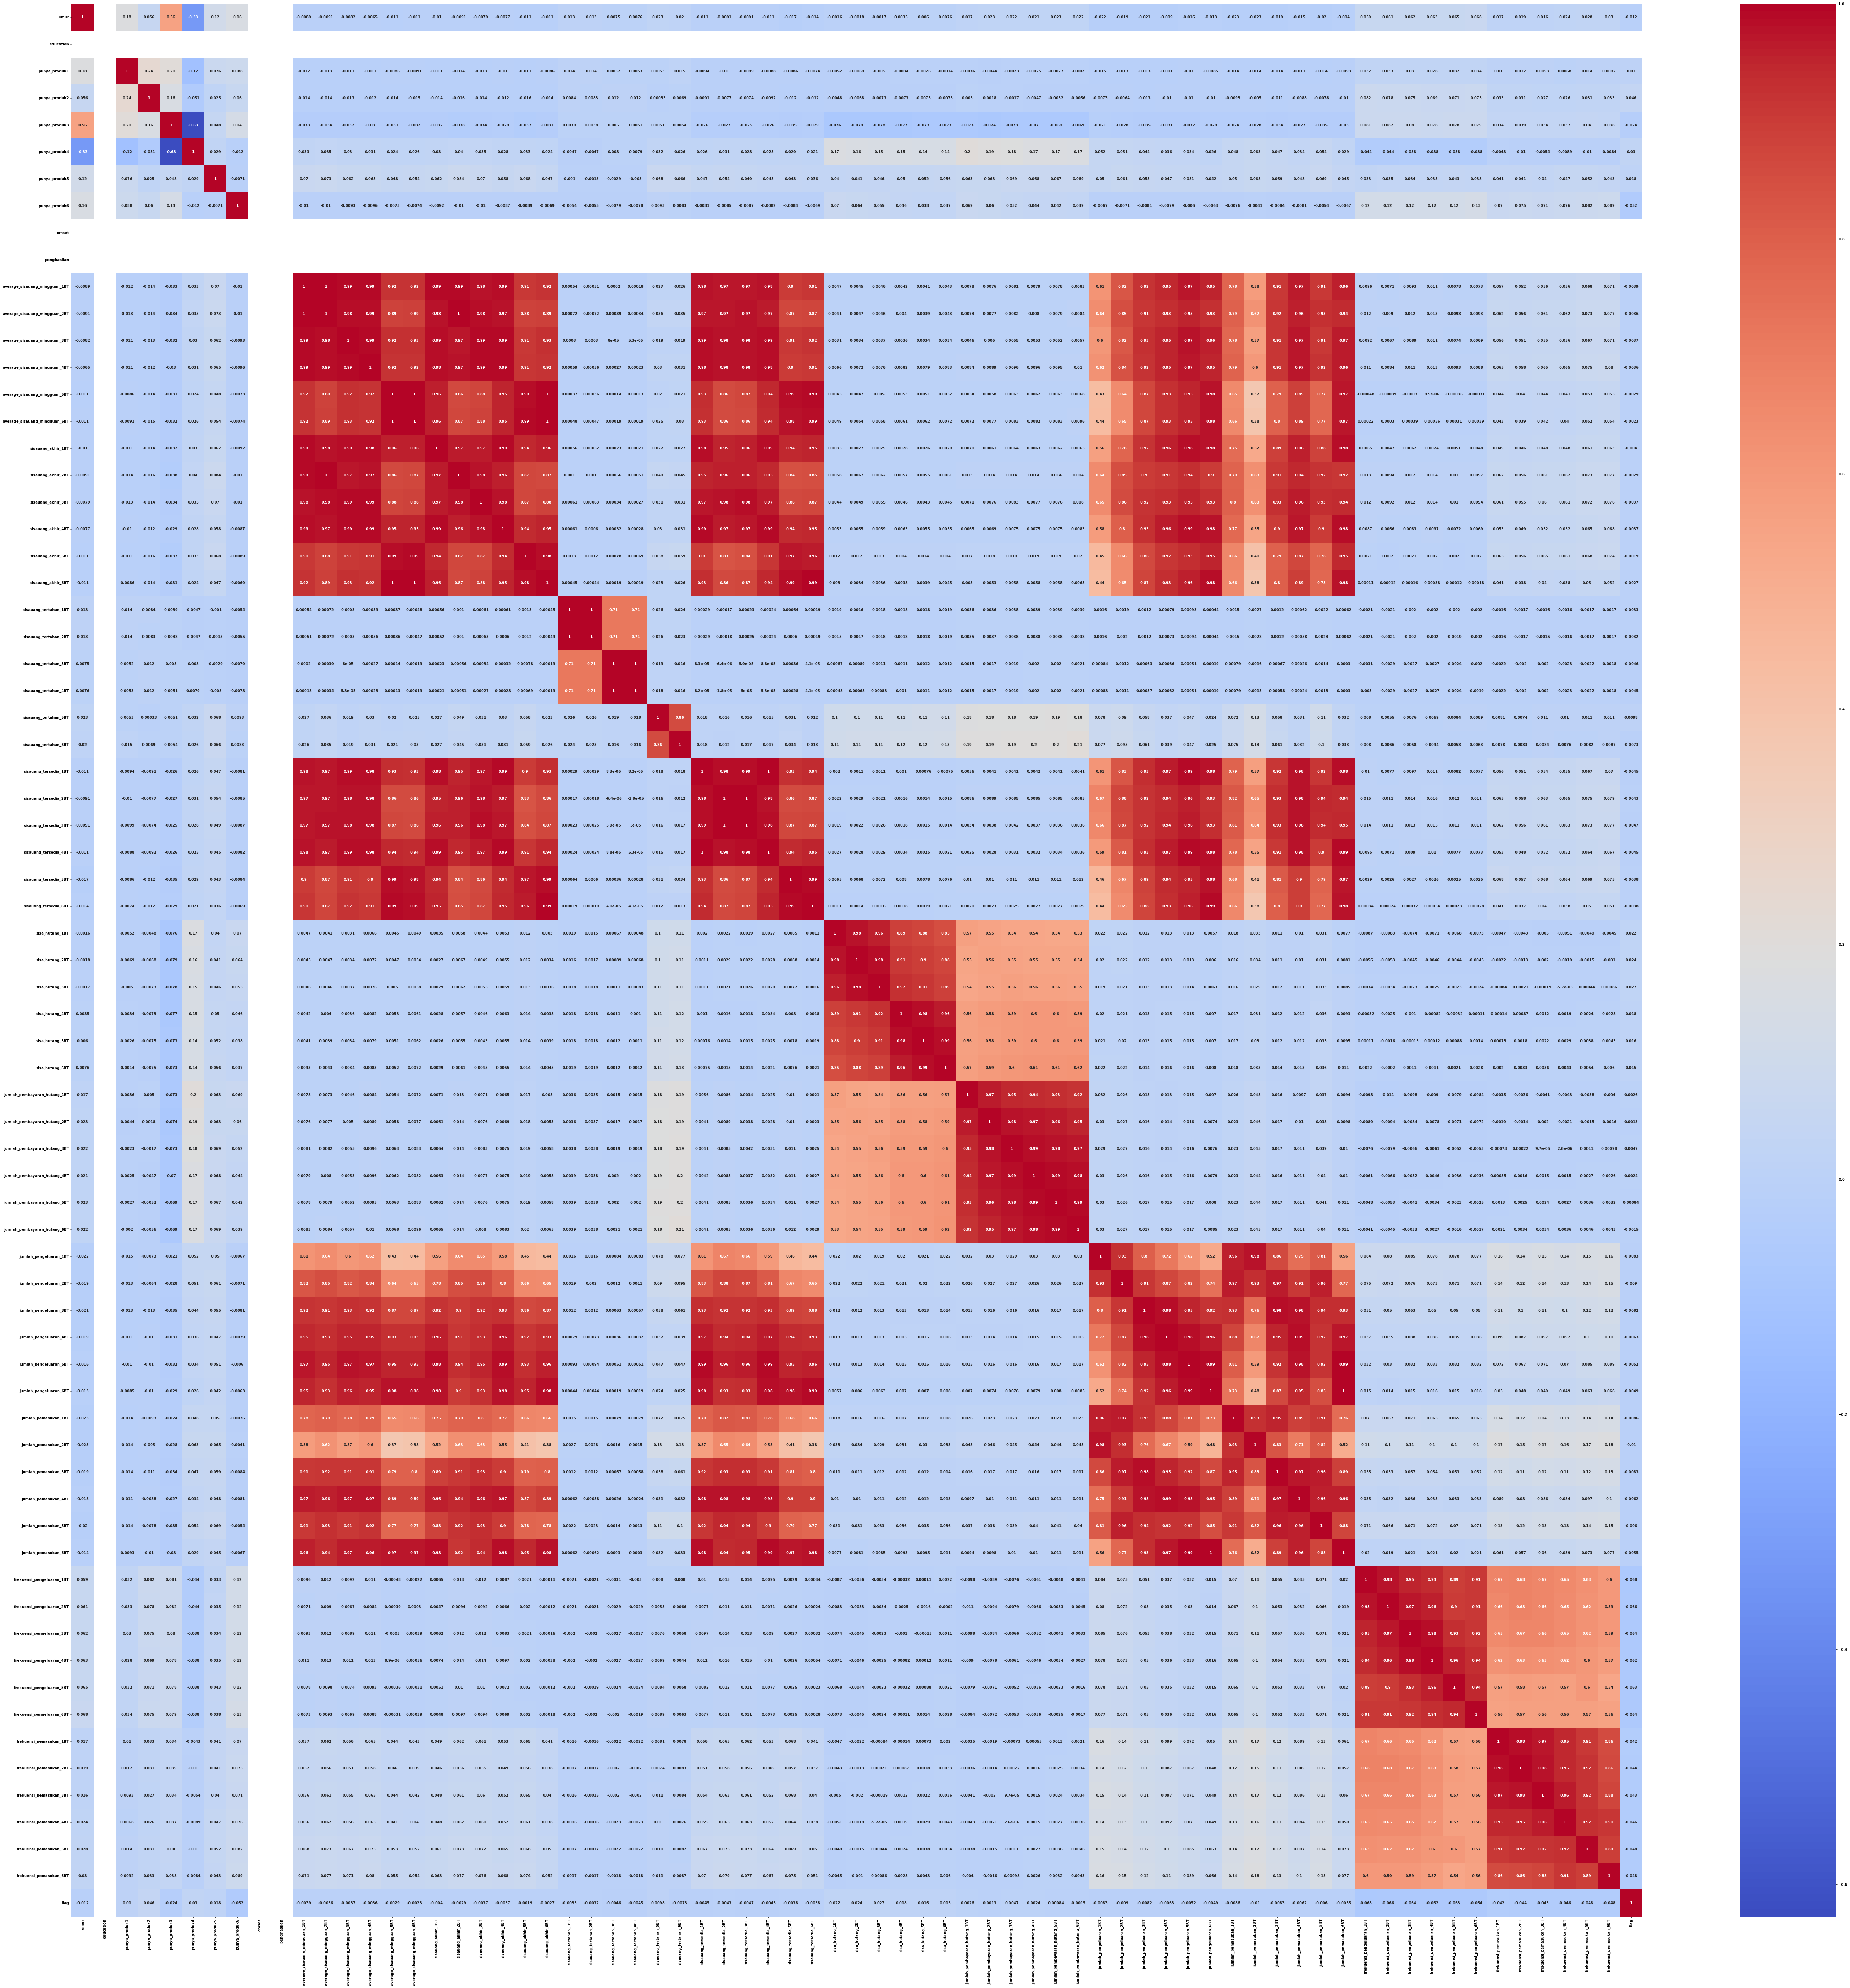

In [9]:
# cek korelasi dengan heatmap
plt.figure(figsize=(100,100))

sns.heatmap(corr_train, cmap="coolwarm", annot=True)
plt.show()

In [10]:
# Cek berapa % distribusi dari good vs bad
flags=df_train['flag'].value_counts()
bad_share=flags[0]/df_train['flag'].count()*100
good_share=flags[1]/df_train['flag'].count()*100

print(bad_share)
print(good_share)

89.19432136721223
10.805678632787775


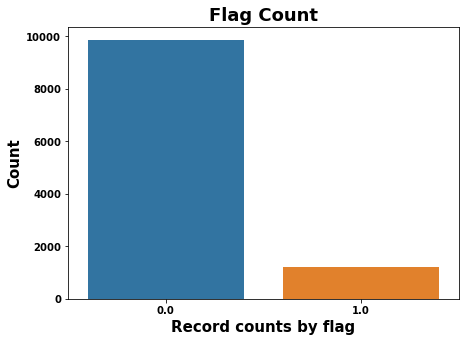

In [11]:
# membuat plot bar untuk jumlah dan persentase good vs bad jika kita mempromosikan produk.
plt.figure(figsize=(7,5))
sns.countplot(df_train['flag'])
plt.title("Flag Count", fontsize=18)
plt.xlabel("Record counts by flag", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [12]:
df_number = df_train.select_dtypes(include = 'number')
df_number.head()

umur  education  punya_produk1  punya_produk2  punya_produk3  \
0   0.0        NaN            0.0            0.0            1.0   
1  32.0        NaN            0.0            0.0            1.0   
2  28.0        NaN            0.0            1.0            1.0   
3  58.0        NaN            0.0            1.0            1.0   
4  34.0        NaN            0.0            1.0            1.0   

   punya_produk4  punya_produk5  punya_produk6  omset  penghasilan  ...  \
0            0.0            0.0            0.0    NaN          NaN  ...   
1            0.0            0.0            0.0    NaN          NaN  ...   
2            0.0            0.0            0.0    NaN          NaN  ...   
3            0.0            0.0            0.0    NaN          NaN  ...   
4            0.0            1.0            1.0    NaN          NaN  ...   

   frekuensi_pengeluaran_4BT  frekuensi_pengeluaran_5BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        1.0                        2.0   
4                       36.0                       37.0   

   frekuensi_pengeluaran_6BT  frekuensi_pemasukan_1BT  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                     22.0   
3                        7.0                      0.0   
4                       26.0                     38.0   

   frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  frekuensi_pemasukan_4BT  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                     19.0                     24.0                     46.0   

   frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  flag  
0                      0.0                      0.0   0.0  
1                      0.0                      0.0   0.0  
2                      0.0                      0.0   0.0  
3                      0.0                      7.0   0.0  
4                     42.0                     37.0   0.0  

[5 rows x 71 columns]

umur


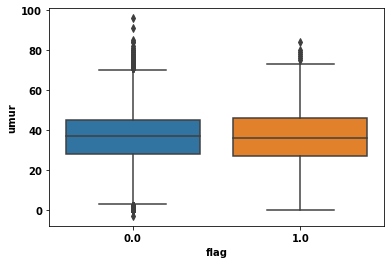

education


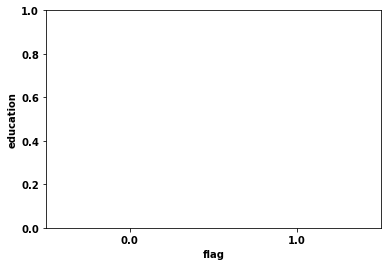

punya_produk1


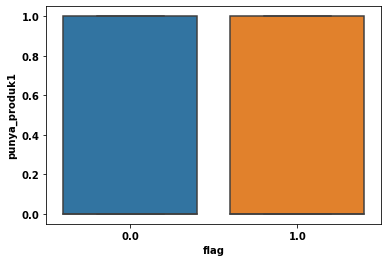

punya_produk2


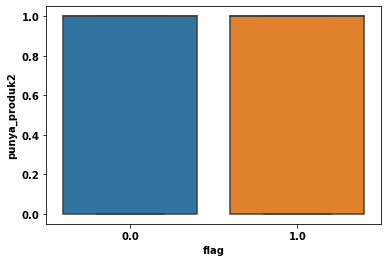

punya_produk3


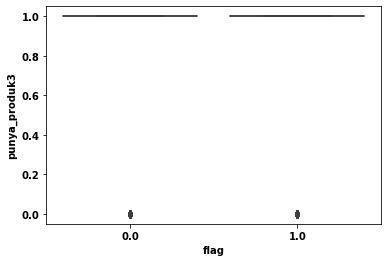

punya_produk4


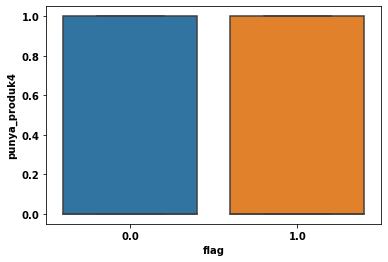

punya_produk5


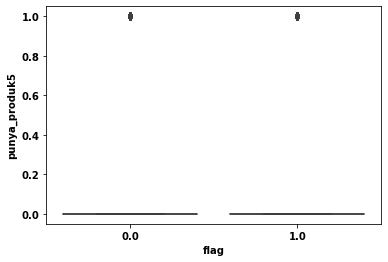

punya_produk6


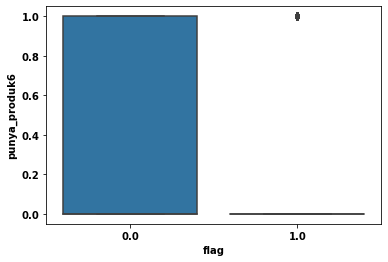

omset


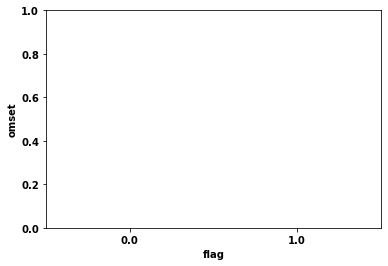

penghasilan


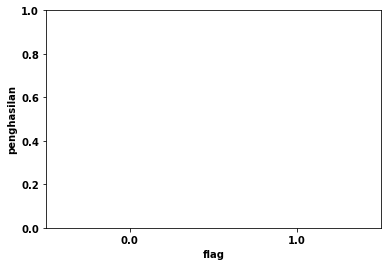

average_sisauang_mingguan_1BT


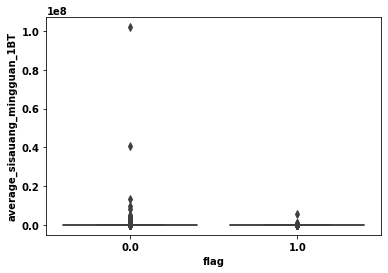

average_sisauang_mingguan_2BT


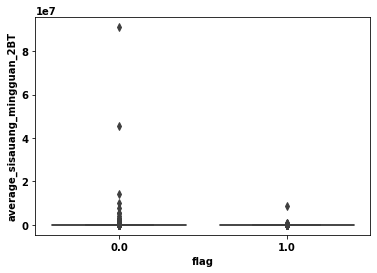

average_sisauang_mingguan_3BT


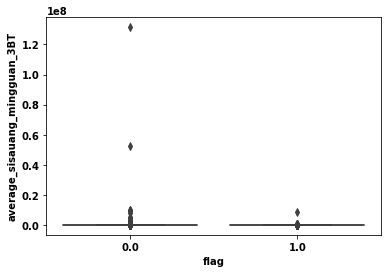

average_sisauang_mingguan_4BT


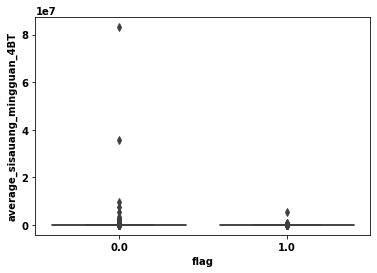

average_sisauang_mingguan_5BT


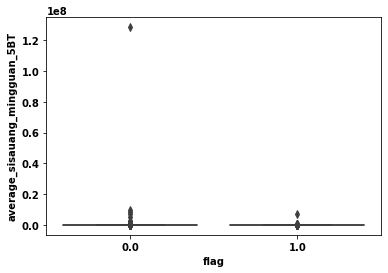

average_sisauang_mingguan_6BT


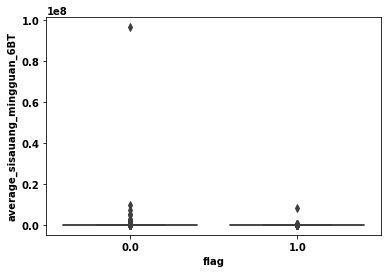

sisauang_akhir_1BT


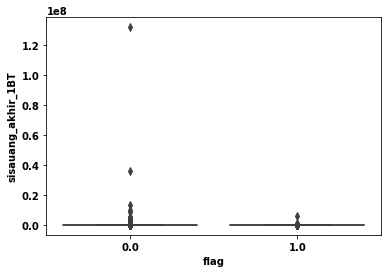

sisauang_akhir_2BT


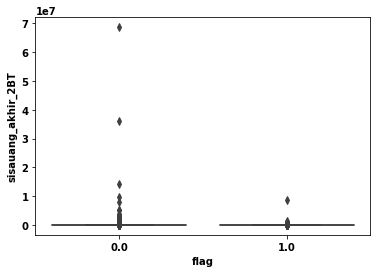

sisauang_akhir_3BT


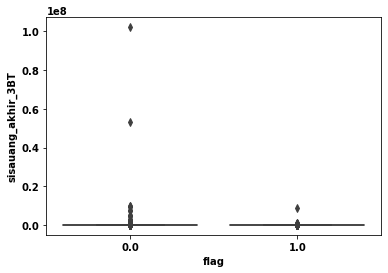

sisauang_akhir_4BT


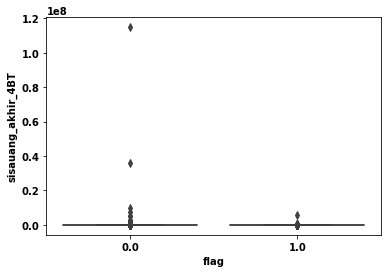

sisauang_akhir_5BT


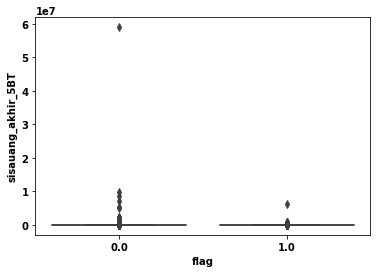

sisauang_akhir_6BT


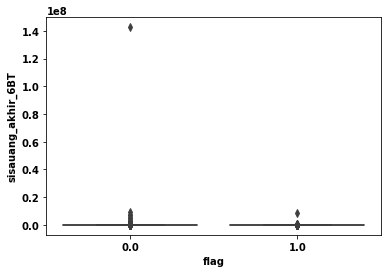

sisauang_tertahan_1BT


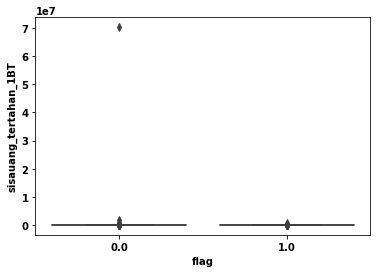

sisauang_tertahan_2BT


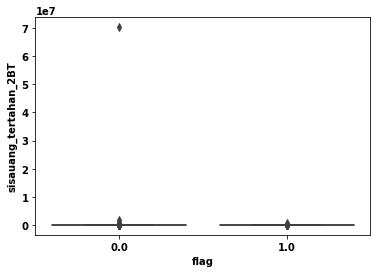

sisauang_tertahan_3BT


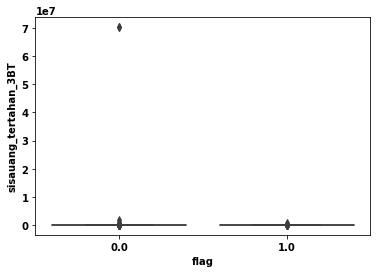

sisauang_tertahan_4BT


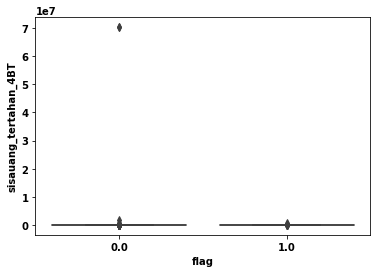

sisauang_tertahan_5BT


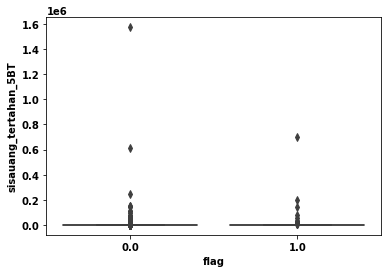

sisauang_tertahan_6BT


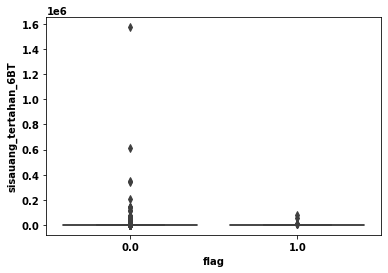

sisauang_tersedia_1BT


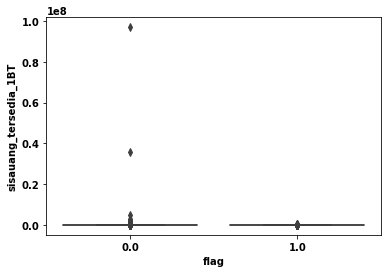

sisauang_tersedia_2BT


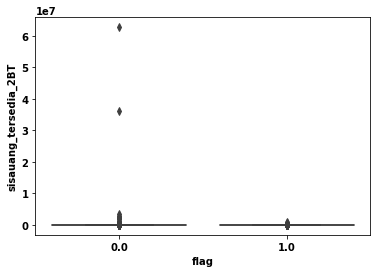

sisauang_tersedia_3BT


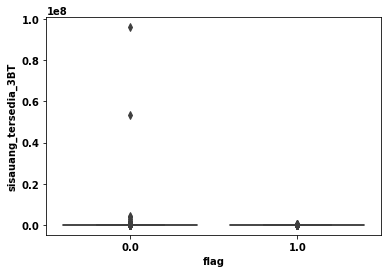

sisauang_tersedia_4BT


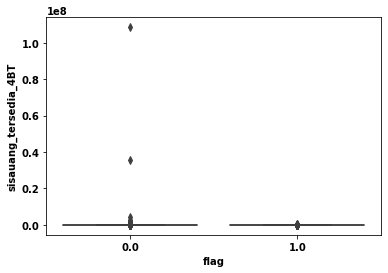

sisauang_tersedia_5BT


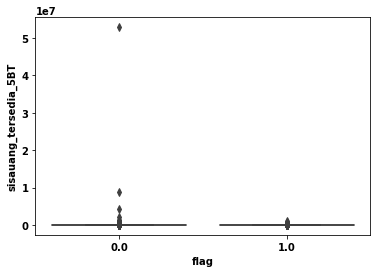

sisauang_tersedia_6BT


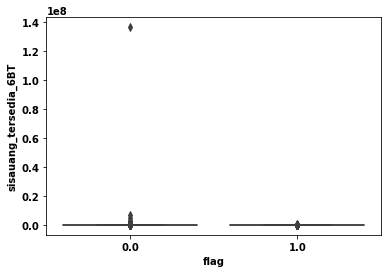

sisa_hutang_1BT


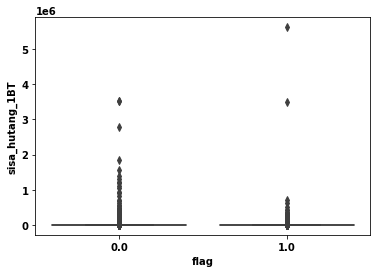

sisa_hutang_2BT


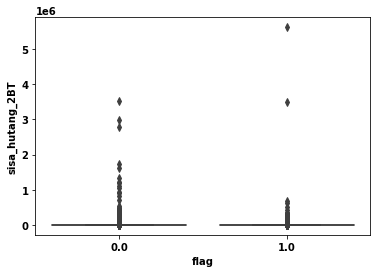

sisa_hutang_3BT


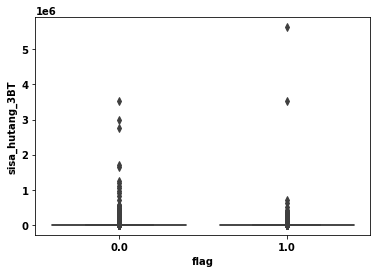

sisa_hutang_4BT


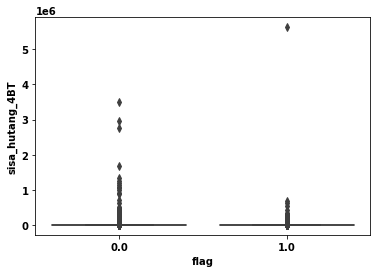

sisa_hutang_5BT


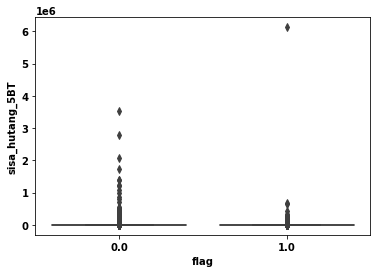

sisa_hutang_6BT


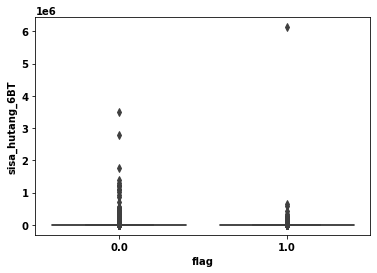

jumlah_pembayaran_hutang_1BT


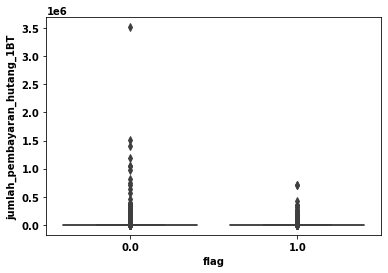

jumlah_pembayaran_hutang_2BT


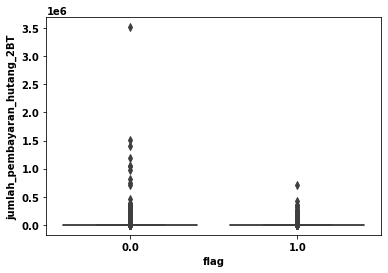

jumlah_pembayaran_hutang_3BT


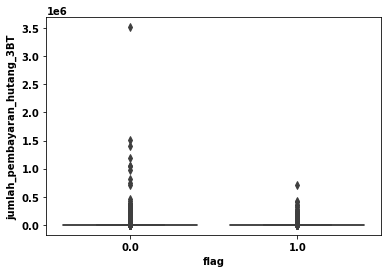

jumlah_pembayaran_hutang_4BT


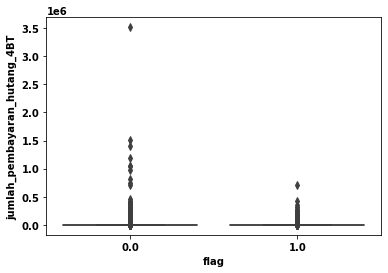

jumlah_pembayaran_hutang_5BT


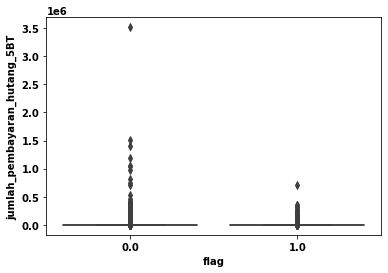

jumlah_pembayaran_hutang_6BT


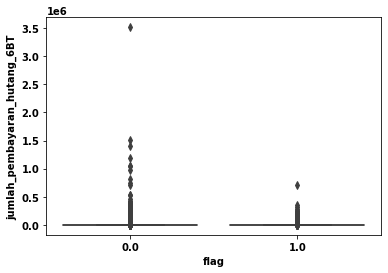

jumlah_pengeluaran_1BT


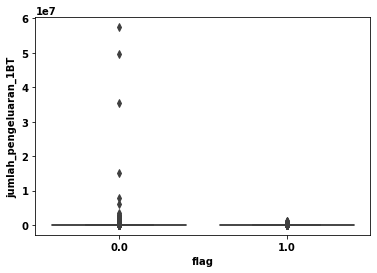

jumlah_pengeluaran_2BT


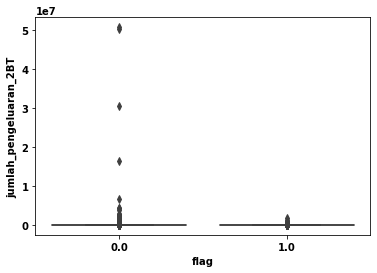

jumlah_pengeluaran_3BT


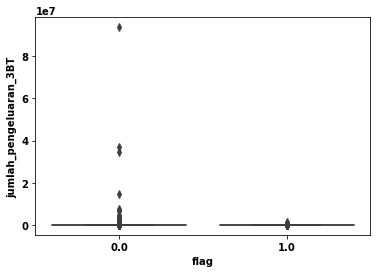

jumlah_pengeluaran_4BT


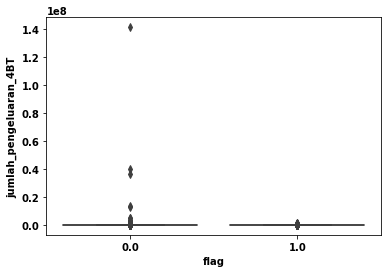

jumlah_pengeluaran_5BT


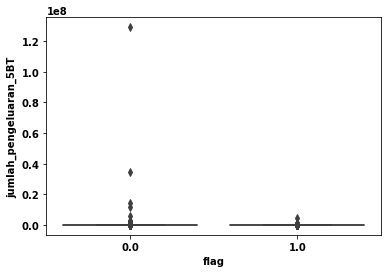

jumlah_pengeluaran_6BT


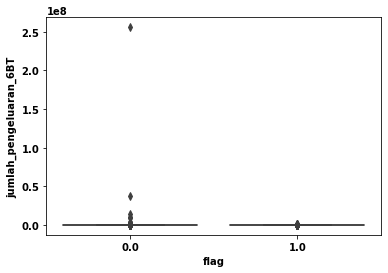

jumlah_pemasukan_1BT


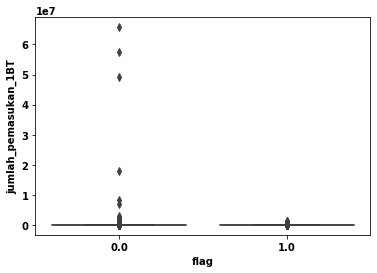

jumlah_pemasukan_2BT


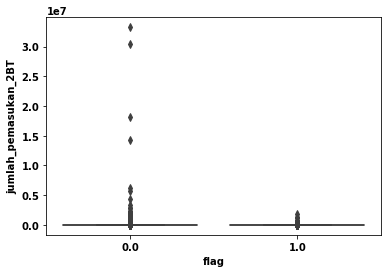

jumlah_pemasukan_3BT


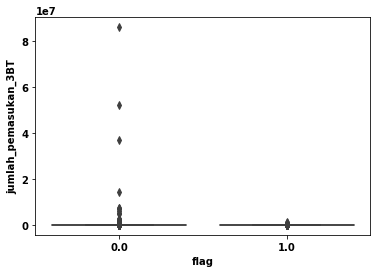

jumlah_pemasukan_4BT


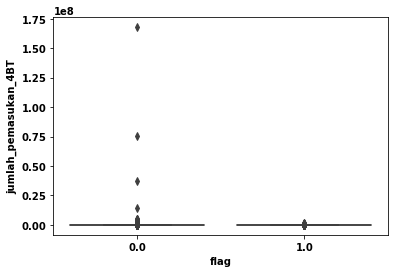

jumlah_pemasukan_5BT


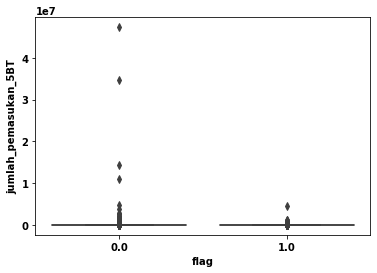

jumlah_pemasukan_6BT


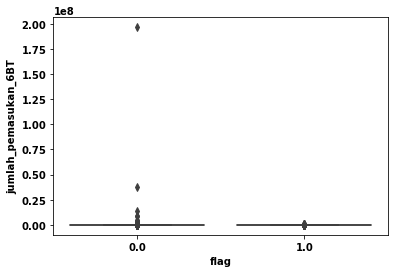

frekuensi_pengeluaran_1BT


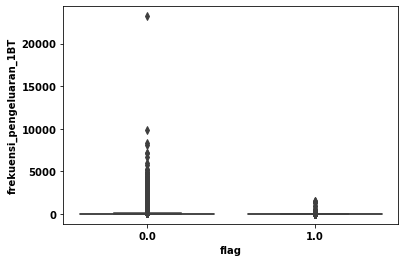

frekuensi_pengeluaran_2BT


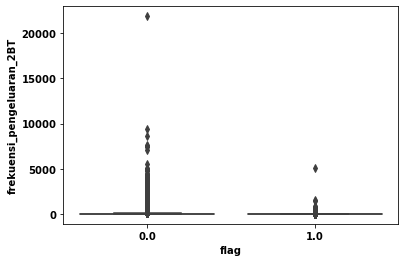

frekuensi_pengeluaran_3BT


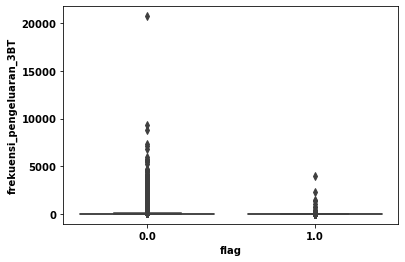

frekuensi_pengeluaran_4BT


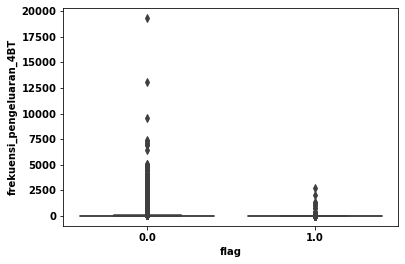

frekuensi_pengeluaran_5BT


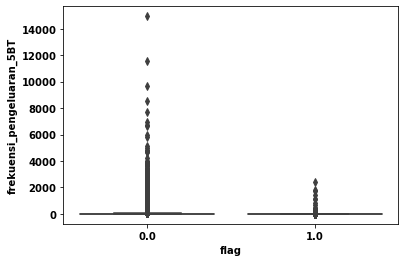

frekuensi_pengeluaran_6BT


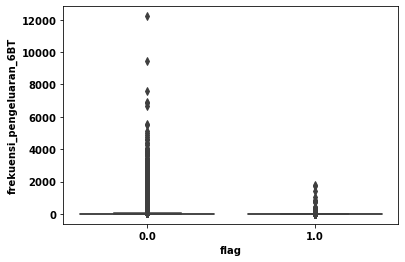

frekuensi_pemasukan_1BT


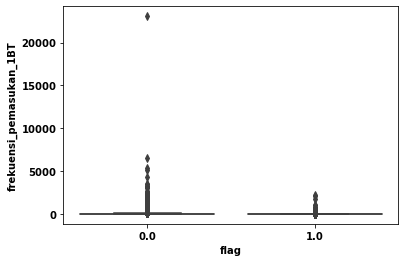

frekuensi_pemasukan_2BT


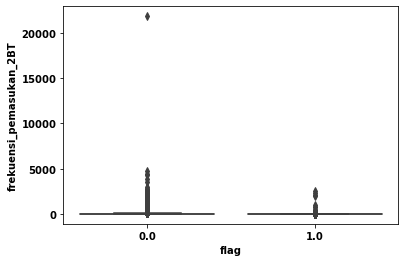

frekuensi_pemasukan_3BT


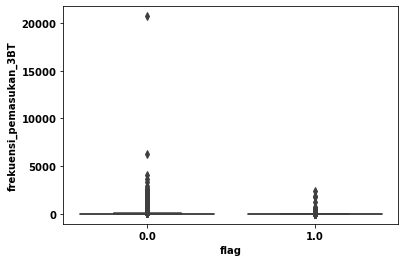

frekuensi_pemasukan_4BT


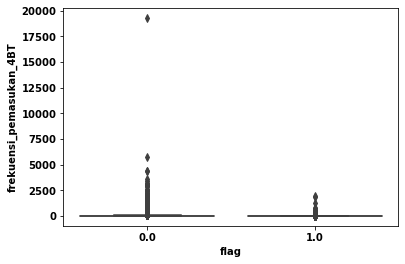

frekuensi_pemasukan_5BT


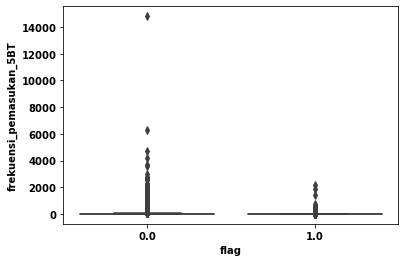

frekuensi_pemasukan_6BT


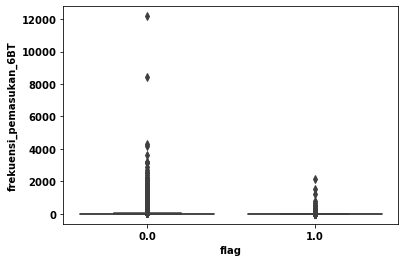

In [13]:
for x in df_number.columns[:-1]:
    print(x)
    sns.boxplot(data = df_number, y=x, x = 'flag')
    plt.show()

In [14]:
cols = list(df_number.columns.values)

In [15]:
df_number.columns

Index(['umur', 'education', 'punya_produk1', 'punya_produk2', 'punya_produk3',
       'punya_produk4', 'punya_produk5', 'punya_produk6', 'omset',
       'penghasilan', 'average_sisauang_mingguan_1BT',
       'average_sisauang_mingguan_2BT', 'average_sisauang_mingguan_3BT',
       'average_sisauang_mingguan_4BT', 'average_sisauang_mingguan_5BT',
       'average_sisauang_mingguan_6BT', 'sisauang_akhir_1BT',
       'sisauang_akhir_2BT', 'sisauang_akhir_3BT', 'sisauang_akhir_4BT',
       'sisauang_akhir_5BT', 'sisauang_akhir_6BT', 'sisauang_tertahan_1BT',
       'sisauang_tertahan_2BT', 'sisauang_tertahan_3BT',
       'sisauang_tertahan_4BT', 'sisauang_tertahan_5BT',
       'sisauang_tertahan_6BT', 'sisauang_tersedia_1BT',
       'sisauang_tersedia_2BT', 'sisauang_tersedia_3BT',
       'sisauang_tersedia_4BT', 'sisauang_tersedia_5BT',
       'sisauang_tersedia_6BT', 'sisa_hutang_1BT', 'sisa_hutang_2BT',
       'sisa_hutang_3BT', 'sisa_hutang_4BT', 'sisa_hutang_5BT',
       'sisa_hutang_6BT

In [16]:
df_obj = df_train.select_dtypes(exclude = 'number')
df_obj.head()

kode pelanggan kota gender keluarga                    Pekerjaan Penanggung  \
0        TLP5787    C    NaN      NaN                          NaN        NaN   
1        V798888    G      F        K  Mahasiswa Diploma / S1 / S2        NaN   
2        INX8444    L      M        K                Usaha Mandiri        NaN   
3        HP08456    N      M        K                     Karyawan        NaN   
4        HBJ1138    Q      F        K                Usaha Mandiri        NaN   

  Usaha jualan        tgl data  
0   NaN    NaN  04/08/23 14.17  
1   NaN    NaN  04/08/23 14.17  
2   NaN    NaN  04/08/23 14.17  
3   NaN    NaN  04/08/23 14.17  
4   NaN    NaN  04/08/23 14.17

In [17]:
df_obj.columns

Index(['kode pelanggan', 'kota', 'gender', 'keluarga', 'Pekerjaan',
       'Penanggung', 'Usaha', 'jualan', 'tgl data'],
      dtype='object')

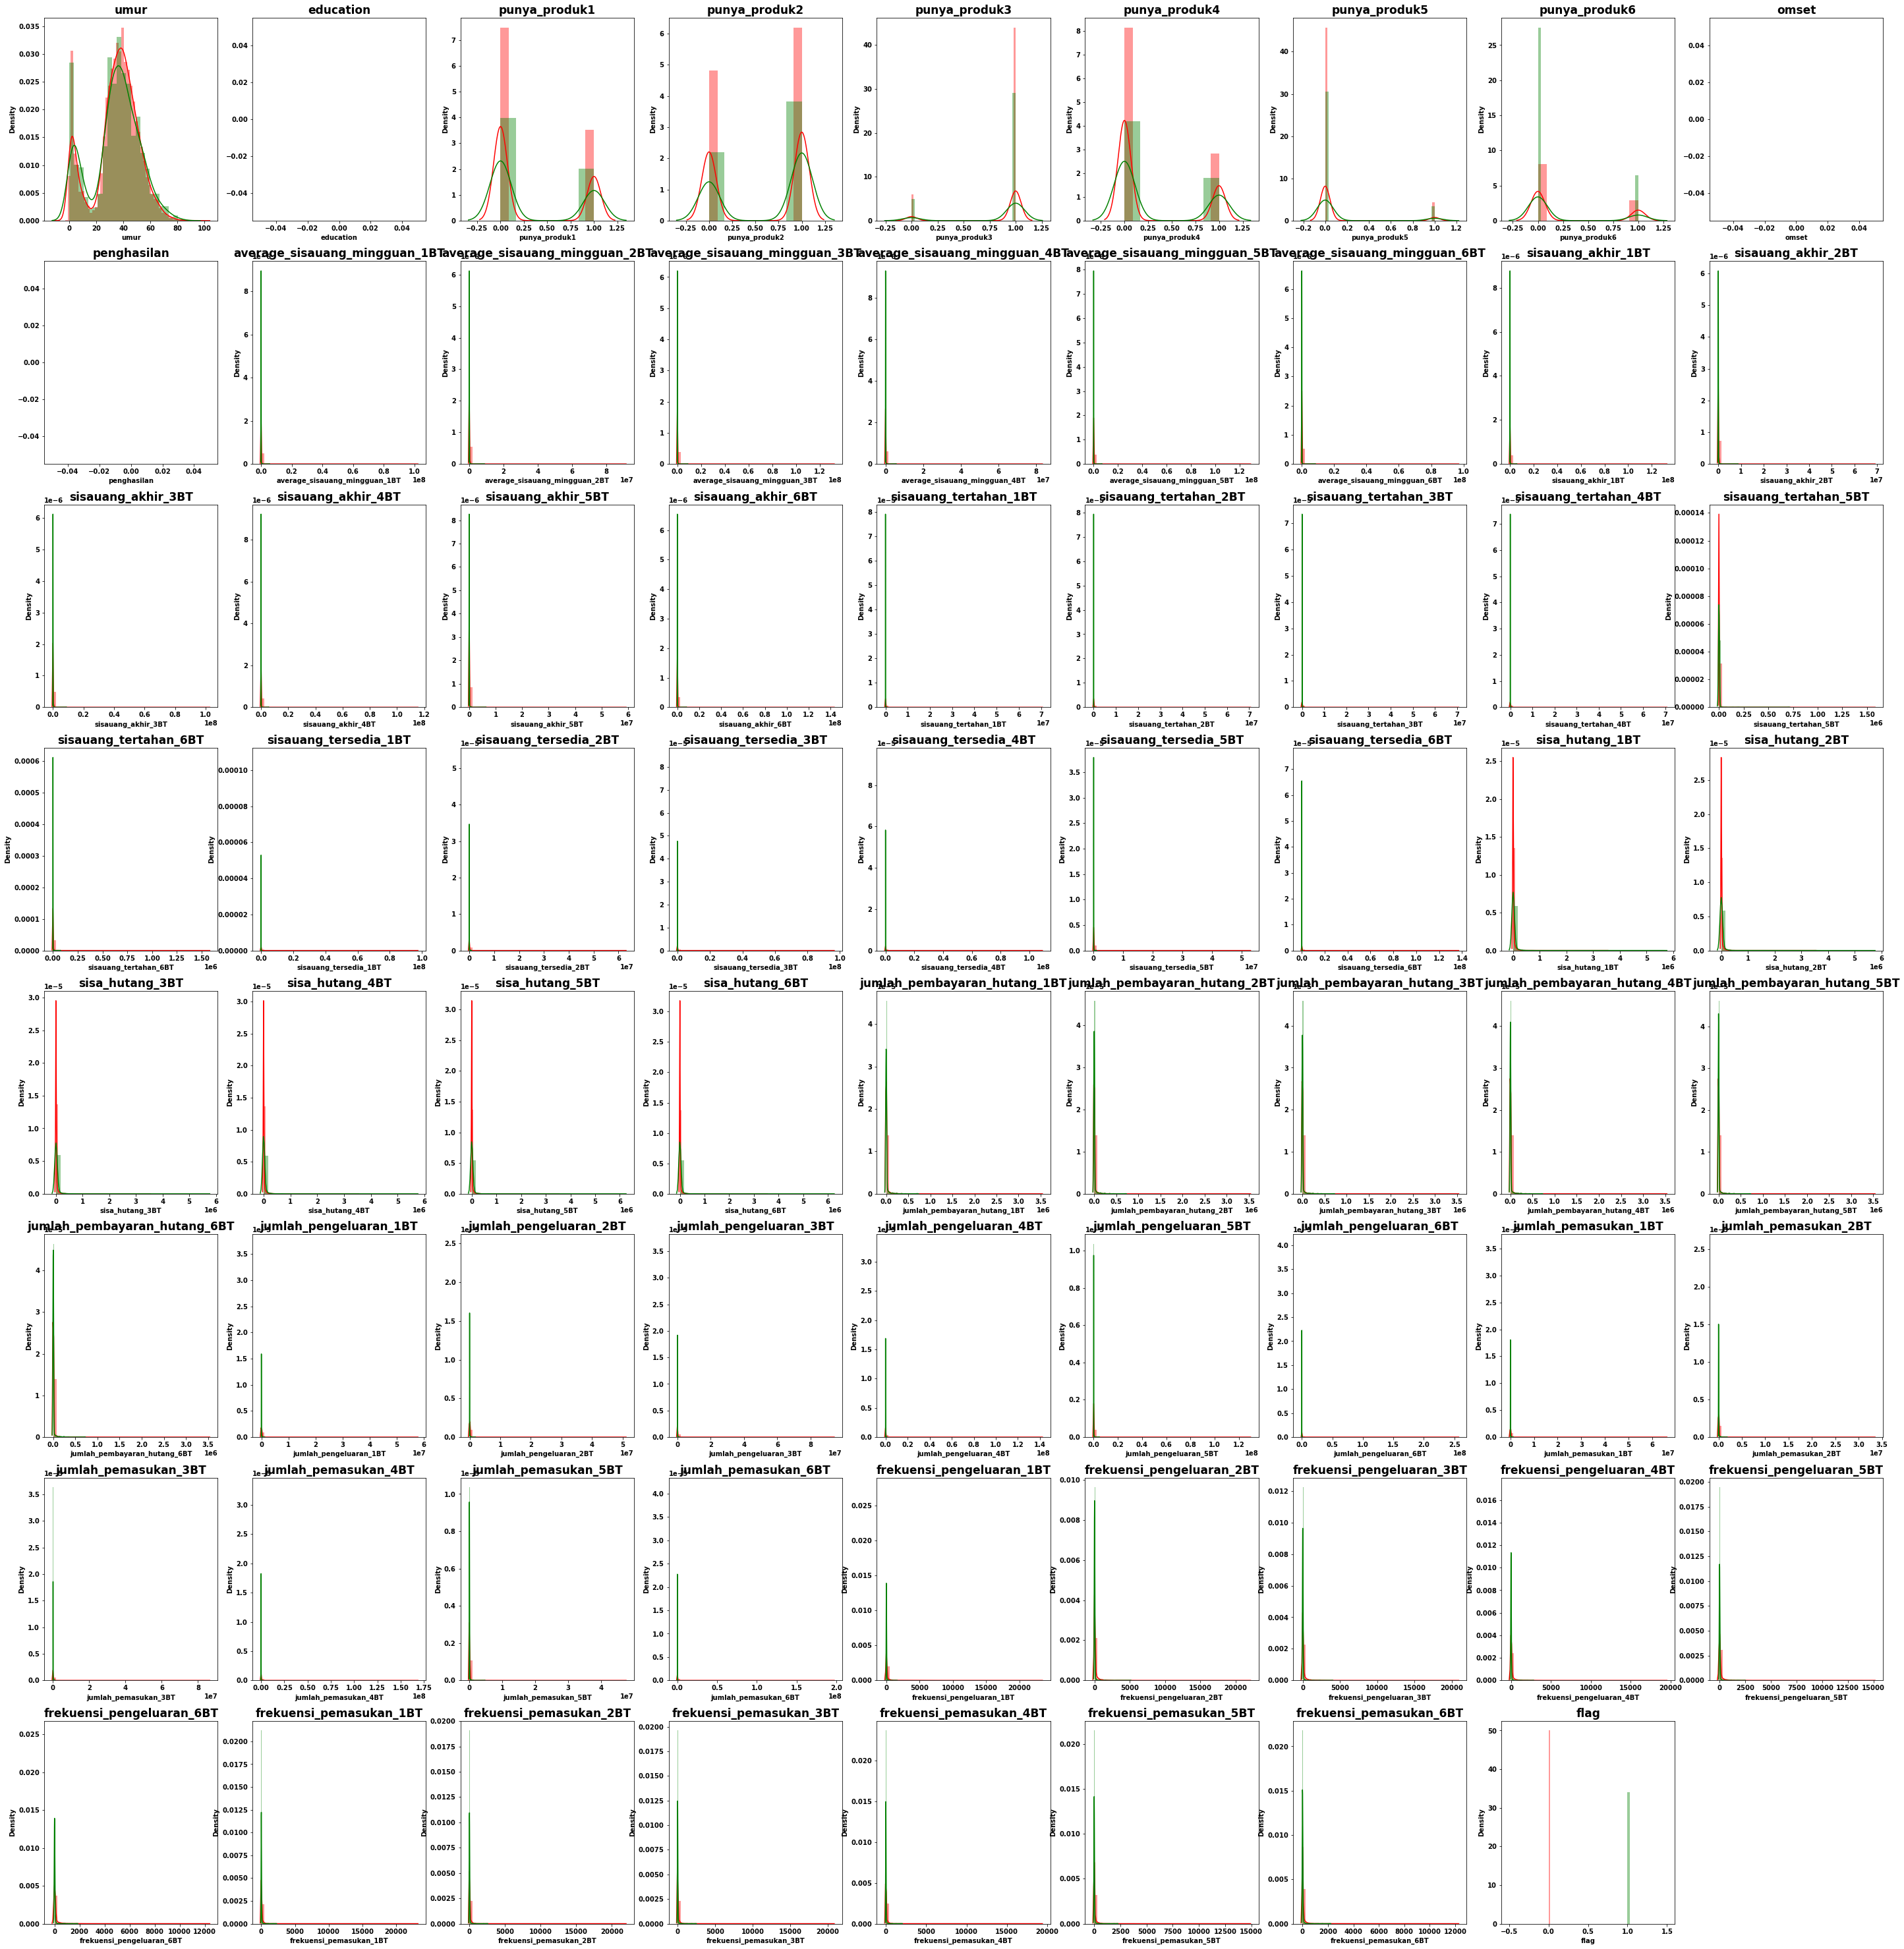

In [18]:
# plot histogram variabel dari dataset untuk melihat skewness dari datanya.
Bad_recom = df_number.flag == 0
Good_recom = df_number.flag == 1

plt.figure(figsize=(50, 60))
for n, col in enumerate(cols):
  plt.subplot(9,9,n+1)
  sns.distplot(df_number[col][Bad_recom], color='red')
  sns.distplot(df_number[col][Good_recom], color='green')
  plt.title(col, fontsize=17)
plt.show()

setelah melakukan EDA,distribusi data antar fitur rata - rata terdistribusi normal. sementara itu pada EDA boxplot banyak sekali outlier terlihat, dan juga saya melihat bahwa beberapa fitur, korelasi antar 1 fitur dengan fitur lainnya lemah . Dan beberapa fitur memiliki banyak sekali nan values, jadi saya memutuskan untuk drop fitur yang tidak memiliki korelasi sama sekali tersebut dan yang memiliki nan values paling banyak.

**noted : saya membuat scatter plot untuk multivariat sebenarnya untuk melihat korelasi antar feature, tapi saya drop karna plotnya terlalu banyak, dan juga korelasinya juga lemah. jadi saya putuskan untuk menggunakan boxplot dan displot diatas saja untuk melihat distribusi datanya seperti apa.

In [19]:
df_train2 = df_train.drop(['kode pelanggan','education','Penanggung','Usaha','jualan','omset','penghasilan'], axis=1)
df_train2.head()

umur kota gender keluarga                    Pekerjaan  punya_produk1  \
0   0.0    C    NaN      NaN                          NaN            0.0   
1  32.0    G      F        K  Mahasiswa Diploma / S1 / S2            0.0   
2  28.0    L      M        K                Usaha Mandiri            0.0   
3  58.0    N      M        K                     Karyawan            0.0   
4  34.0    Q      F        K                Usaha Mandiri            0.0   

   punya_produk2  punya_produk3  punya_produk4  punya_produk5  ...  \
0            0.0            1.0            0.0            0.0  ...   
1            0.0            1.0            0.0            0.0  ...   
2            1.0            1.0            0.0            0.0  ...   
3            1.0            1.0            0.0            0.0  ...   
4            1.0            1.0            0.0            1.0  ...   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        2.0                        7.0   
4                       37.0                       26.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     22.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                     38.0                     19.0                     24.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      7.0   
4                     46.0                     42.0                     37.0   

         tgl data  flag  
0  04/08/23 14.17   0.0  
1  04/08/23 14.17   0.0  
2  04/08/23 14.17   0.0  
3  04/08/23 14.17   0.0  
4  04/08/23 14.17   0.0  

[5 rows x 73 columns]

In [20]:
pd.set_option('display.max_rows',100)
df_train2.isna().sum()/len(df_train2)*100

umur                              1.455828
kota                              1.419658
gender                           18.048648
keluarga                         18.536938
Pekerjaan                        23.609730
punya_produk1                     1.419658
punya_produk2                     1.419658
punya_produk3                     1.419658
punya_produk4                     1.419658
punya_produk5                     1.419658
punya_produk6                     1.419658
average_sisauang_mingguan_1BT     0.000000
average_sisauang_mingguan_2BT     0.000000
average_sisauang_mingguan_3BT     0.000000
average_sisauang_mingguan_4BT     0.000000
average_sisauang_mingguan_5BT     0.000000
average_sisauang_mingguan_6BT     0.000000
sisauang_akhir_1BT                0.000000
sisauang_akhir_2BT                0.000000
sisauang_akhir_3BT                0.000000
sisauang_akhir_4BT                0.000000
sisauang_akhir_5BT                0.000000
sisauang_akhir_6BT                0.000000
sisauang_te

In [21]:
df_test2 = df_test.drop(['kode pelanggan','education','Penanggung','Usaha','jualan','omset','penghasilan'], axis=1)
df_test2.head()

umur kota gender keluarga      Pekerjaan  punya_produk1  punya_produk2  \
0   3.0    I    NaN      NaN            NaN            0.0            0.0   
1  40.0    D      M        K  Usaha Mandiri            0.0            1.0   
2  26.0    J      M        K  Usaha Mandiri            0.0            1.0   
3  38.0    B      F        K  Usaha Mandiri            0.0            1.0   
4  62.0    B      M        K       Pedagang            1.0            0.0   

   punya_produk3  punya_produk4  punya_produk5  ...  \
0            0.0            1.0            0.0  ...   
1            1.0            0.0            0.0  ...   
2            1.0            1.0            0.0  ...   
3            1.0            0.0            0.0  ...   
4            1.0            0.0            0.0  ...   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        7.0                        7.0   
1                        0.0                        0.0   
2                        1.0                        4.0   
3                       26.0                       23.0   
4                       55.0                       48.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                     26.0                     27.0                     14.0   
1                      7.0                      4.0                     12.0   
2                      1.0                      0.0                      0.0   
3                     38.0                     57.0                     40.0   
4                    190.0                    237.0                    217.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  \
0                     19.0                     16.0                      8.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                     49.0                    112.0                     73.0   
4                    230.0                    187.0                    193.0   

         tgl data  flag  
0  04/08/23 14.17   0.0  
1  04/08/23 14.17   0.0  
2  04/08/23 14.17   1.0  
3  04/08/23 14.17   0.0  
4  04/08/23 14.17   0.0  

[5 rows x 73 columns]

In [22]:
pd.set_option('display.max_rows',100)
df_test2.isna().sum()/len(df_test2)*100

umur                              1.482821
kota                              1.482821
gender                           18.083183
keluarga                         18.481013
Pekerjaan                        24.086799
punya_produk1                     1.482821
punya_produk2                     1.482821
punya_produk3                     1.482821
punya_produk4                     1.482821
punya_produk5                     1.482821
punya_produk6                     1.482821
average_sisauang_mingguan_1BT     0.000000
average_sisauang_mingguan_2BT     0.000000
average_sisauang_mingguan_3BT     0.000000
average_sisauang_mingguan_4BT     0.000000
average_sisauang_mingguan_5BT     0.000000
average_sisauang_mingguan_6BT     0.000000
sisauang_akhir_1BT                0.000000
sisauang_akhir_2BT                0.000000
sisauang_akhir_3BT                0.000000
sisauang_akhir_4BT                0.000000
sisauang_akhir_5BT                0.000000
sisauang_akhir_6BT                0.000000
sisauang_te

# Feature Engineering

### <a name="p3">Splitting the data into train & test data</a>

In [23]:
X_train = df_train2.drop(['flag'], axis=1)
y_train = df_train2['flag']
X_test = df_test2.drop(['flag'], axis=1)
y_test = df_test2['flag']

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11059, 72), (11059,), (2765, 72), (2765,))

In [25]:
y_train.value_counts()/len(y_train)*100

0.0    89.194321
1.0    10.805679
Name: flag, dtype: float64

### Feature Transformation (Imputation, OHE, Scalling) 

Feature transformasi yang saya lakukan, untuk imputation saya menggunakan KNN untuk data numerik dan category yang NaN value. lalu data numerik diubah ke numerik dengan OneHotEncoder(OHE) agar bisa diproses pada modelling nantinya. dan Scalling saya menggunakan Robust Scaller. karna seperti yang kita tau bahwa dari hasil EDA banyak sekali outlier pada dataset diatas dan RobustScaller merupakan scaller yang paling bagus dan robust untuk digunakan pada dataset yang outliernya banyak.  

In [26]:
X_train_cat = X_train.select_dtypes(exclude=np.number)
X_train_num = X_train.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(exclude=np.number)
X_test_num = X_test.select_dtypes(include=np.number)

In [27]:
X_train_num.isna().sum()

umur                             161
punya_produk1                    157
punya_produk2                    157
punya_produk3                    157
punya_produk4                    157
punya_produk5                    157
punya_produk6                    157
average_sisauang_mingguan_1BT      0
average_sisauang_mingguan_2BT      0
average_sisauang_mingguan_3BT      0
average_sisauang_mingguan_4BT      0
average_sisauang_mingguan_5BT      0
average_sisauang_mingguan_6BT      0
sisauang_akhir_1BT                 0
sisauang_akhir_2BT                 0
sisauang_akhir_3BT                 0
sisauang_akhir_4BT                 0
sisauang_akhir_5BT                 0
sisauang_akhir_6BT                 0
sisauang_tertahan_1BT              0
sisauang_tertahan_2BT              0
sisauang_tertahan_3BT              0
sisauang_tertahan_4BT              0
sisauang_tertahan_5BT              0
sisauang_tertahan_6BT              0
sisauang_tersedia_1BT              0
sisauang_tersedia_2BT              0
s

In [28]:
X_train_cat.isna().sum()

kota          157
gender       1996
keluarga     2050
Pekerjaan    2611
tgl data        0
dtype: int64

### Imputation dan OHE

In [29]:
X_train_num3 = X_train_num.copy()

In [30]:
imputer_KNN = KNNImputer(n_neighbors=3)
X_train_num_knn = imputer_KNN.fit_transform(X_train_num3)

In [31]:
X_train_num_knn = pd.DataFrame(X_train_num_knn)
X_train_num_knn.columns = X_train_num3.columns

In [32]:
X_train_num_knn.isna().sum()

umur                             0
punya_produk1                    0
punya_produk2                    0
punya_produk3                    0
punya_produk4                    0
punya_produk5                    0
punya_produk6                    0
average_sisauang_mingguan_1BT    0
average_sisauang_mingguan_2BT    0
average_sisauang_mingguan_3BT    0
average_sisauang_mingguan_4BT    0
average_sisauang_mingguan_5BT    0
average_sisauang_mingguan_6BT    0
sisauang_akhir_1BT               0
sisauang_akhir_2BT               0
sisauang_akhir_3BT               0
sisauang_akhir_4BT               0
sisauang_akhir_5BT               0
sisauang_akhir_6BT               0
sisauang_tertahan_1BT            0
sisauang_tertahan_2BT            0
sisauang_tertahan_3BT            0
sisauang_tertahan_4BT            0
sisauang_tertahan_5BT            0
sisauang_tertahan_6BT            0
sisauang_tersedia_1BT            0
sisauang_tersedia_2BT            0
sisauang_tersedia_3BT            0
sisauang_tersedia_4B

In [33]:
X_train_num_knn.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0   0.0            0.0            0.0            1.0            0.0   
1  32.0            0.0            0.0            1.0            0.0   
2  28.0            0.0            1.0            1.0            0.0   
3  58.0            0.0            1.0            1.0            0.0   
4  34.0            0.0            1.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            0.0                       0.000000   
2            0.0            0.0                       0.000000   
3            0.0            0.0                       0.000000   
4            1.0            1.0                    6344.258121   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       0.000000                       0.000000  ...   
2                       0.000000                       0.000000  ...   
3                       0.000000                       0.000000  ...   
4                    6206.943591                    6171.870696  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        2.0                        1.0   
4                       31.0                       36.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        2.0                        7.0   
4                       37.0                       26.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     22.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                     38.0                     19.0                     24.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                      0.0                      0.0                      7.0  
4                     46.0                     42.0                     37.0  

[5 rows x 67 columns]

In [34]:
X_train_num_knn=round(X_train_num_knn)

In [35]:
X_train_num_knn.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0   0.0            0.0            0.0            1.0            0.0   
1  32.0            0.0            0.0            1.0            0.0   
2  28.0            0.0            1.0            1.0            0.0   
3  58.0            0.0            1.0            1.0            0.0   
4  34.0            0.0            1.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                            0.0   
1            0.0            0.0                            0.0   
2            0.0            0.0                            0.0   
3            0.0            0.0                            0.0   
4            1.0            1.0                         6344.0   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                            0.0                            0.0  ...   
1                            0.0                            0.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            0.0  ...   
4                         6207.0                         6172.0  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        2.0                        1.0   
4                       31.0                       36.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        2.0                        7.0   
4                       37.0                       26.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     22.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                     38.0                     19.0                     24.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                      0.0                      0.0                      7.0  
4                     46.0                     42.0                     37.0  

[5 rows x 67 columns]

In [36]:
X_test_num3 = X_test_num.copy()

In [37]:
X_test_num_knn = imputer_KNN.transform(X_test_num3)

In [38]:
X_test_num_knn = pd.DataFrame(X_test_num_knn)
X_test_num_knn.columns = X_test_num3.columns

In [39]:
X_test_num_knn.isna().sum()

umur                             0
punya_produk1                    0
punya_produk2                    0
punya_produk3                    0
punya_produk4                    0
punya_produk5                    0
punya_produk6                    0
average_sisauang_mingguan_1BT    0
average_sisauang_mingguan_2BT    0
average_sisauang_mingguan_3BT    0
average_sisauang_mingguan_4BT    0
average_sisauang_mingguan_5BT    0
average_sisauang_mingguan_6BT    0
sisauang_akhir_1BT               0
sisauang_akhir_2BT               0
sisauang_akhir_3BT               0
sisauang_akhir_4BT               0
sisauang_akhir_5BT               0
sisauang_akhir_6BT               0
sisauang_tertahan_1BT            0
sisauang_tertahan_2BT            0
sisauang_tertahan_3BT            0
sisauang_tertahan_4BT            0
sisauang_tertahan_5BT            0
sisauang_tertahan_6BT            0
sisauang_tersedia_1BT            0
sisauang_tersedia_2BT            0
sisauang_tersedia_3BT            0
sisauang_tersedia_4B

In [40]:
X_test_num_knn.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0   3.0            0.0            0.0            0.0            1.0   
1  40.0            0.0            1.0            1.0            0.0   
2  26.0            0.0            1.0            1.0            1.0   
3  38.0            0.0            1.0            1.0            0.0   
4  62.0            1.0            0.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            1.0                       0.000000   
2            0.0            1.0                       0.000000   
3            0.0            0.0                    4053.756661   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                    3112.144880                   10050.763170  ...   
2                     207.564754                    1224.104457  ...   
3                    4622.846811                    4206.000431  ...   
4                       0.000000                       0.000000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        6.0                        5.0   
1                       13.0                        0.0   
2                        1.0                        4.0   
3                       16.0                       19.0   
4                       49.0                       45.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        7.0                        7.0   
1                        0.0                        0.0   
2                        1.0                        4.0   
3                       26.0                       23.0   
4                       55.0                       48.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                     26.0                     27.0                     14.0   
1                      7.0                      4.0                     12.0   
2                      1.0                      0.0                      0.0   
3                     38.0                     57.0                     40.0   
4                    190.0                    237.0                    217.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                     19.0                     16.0                      8.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                     49.0                    112.0                     73.0  
4                    230.0                    187.0                    193.0  

[5 rows x 67 columns]

In [41]:
X_test_num_knn=round(X_test_num_knn)
X_test_num_knn.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0   3.0            0.0            0.0            0.0            1.0   
1  40.0            0.0            1.0            1.0            0.0   
2  26.0            0.0            1.0            1.0            1.0   
3  38.0            0.0            1.0            1.0            0.0   
4  62.0            1.0            0.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                            0.0   
1            0.0            1.0                            0.0   
2            0.0            1.0                            0.0   
3            0.0            0.0                         4054.0   
4            0.0            1.0                            0.0   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                            0.0                            0.0  ...   
1                         3112.0                        10051.0  ...   
2                          208.0                         1224.0  ...   
3                         4623.0                         4206.0  ...   
4                            0.0                            0.0  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        6.0                        5.0   
1                       13.0                        0.0   
2                        1.0                        4.0   
3                       16.0                       19.0   
4                       49.0                       45.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        7.0                        7.0   
1                        0.0                        0.0   
2                        1.0                        4.0   
3                       26.0                       23.0   
4                       55.0                       48.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                     26.0                     27.0                     14.0   
1                      7.0                      4.0                     12.0   
2                      1.0                      0.0                      0.0   
3                     38.0                     57.0                     40.0   
4                    190.0                    237.0                    217.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                     19.0                     16.0                      8.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                     49.0                    112.0                     73.0  
4                    230.0                    187.0                    193.0  

[5 rows x 67 columns]

In [42]:
X_train_cat2 = X_train_cat.copy()

In [43]:
ordinal_encode = OrdinalEncoder()

In [44]:
X_train_enc = ordinal_encode.fit_transform(X_train_cat2)

In [45]:
X_train_enc = pd.DataFrame(X_train_enc)

In [46]:
X_train_enc.columns = X_train_cat2.columns

In [47]:
X_train_enc.head()

kota  gender  keluarga  Pekerjaan  tgl data
0   1.0     NaN       NaN        NaN       0.0
1   5.0     0.0       3.0       10.0       0.0
2  10.0     1.0       3.0       29.0       0.0
3  12.0     1.0       3.0        6.0       0.0
4  15.0     0.0       3.0       29.0       0.0

In [48]:
imputer_KNN_cat = KNNImputer(n_neighbors=5)

In [49]:
X_train_cat_knn = imputer_KNN_cat.fit_transform(X_train_enc)

In [50]:
X_train_cat_knn = pd.DataFrame(X_train_cat_knn)
X_train_cat_knn.columns = X_train_enc.columns

In [51]:
X_train_cat_knn.isna().sum()

kota         0
gender       0
keluarga     0
Pekerjaan    0
tgl data     0
dtype: int64

In [52]:
X_train_cat_knn.head()

kota  gender  keluarga  Pekerjaan  tgl data
0   1.0     0.6       1.2       18.0       0.0
1   5.0     0.0       3.0       10.0       0.0
2  10.0     1.0       3.0       29.0       0.0
3  12.0     1.0       3.0        6.0       0.0
4  15.0     0.0       3.0       29.0       0.0

In [53]:
X_train_cat_knn=round(X_train_cat_knn)

In [54]:
X_train_cat_knn.head()

kota  gender  keluarga  Pekerjaan  tgl data
0   1.0     1.0       1.0       18.0       0.0
1   5.0     0.0       3.0       10.0       0.0
2  10.0     1.0       3.0       29.0       0.0
3  12.0     1.0       3.0        6.0       0.0
4  15.0     0.0       3.0       29.0       0.0

In [55]:
X_train_cat_knn = ordinal_encode.inverse_transform(X_train_cat_knn)

In [56]:
X_train_cat_knn = pd.DataFrame(X_train_cat_knn)

In [57]:
X_train_cat_knn.columns = X_train_enc.columns

In [58]:
X_train_cat_knn.head()

kota gender keluarga                    Pekerjaan        tgl data
0    C      M        D                     Pendidik  04/08/23 14.17
1    G      F        K  Mahasiswa Diploma / S1 / S2  04/08/23 14.17
2    L      M        K                Usaha Mandiri  04/08/23 14.17
3    N      M        K                     Karyawan  04/08/23 14.17
4    Q      F        K                Usaha Mandiri  04/08/23 14.17

In [59]:
ohe = OneHotEncoder(handle_unknown= 'ignore')

In [60]:
X_train_cat_knn2 = X_train_cat_knn.copy()

In [61]:
ohe.fit(X_train_cat_knn2)

OneHotEncoder(handle_unknown='ignore')

In [62]:
X_train_ohe = pd.DataFrame(ohe.transform(X_train_cat_knn2).toarray())
X_train_ohe.columns = ohe.get_feature_names_out(X_train_cat_knn2.columns)
X_train_ohe.head()

kota_B  kota_C  kota_D  kota_E  kota_F  kota_G  kota_H  kota_I  kota_J  \
0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   kota_K  ...  Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja  \
0     0.0  ...                                               0.0   
1     0.0  ...                                               0.0   
2     0.0  ...                                               0.0   
3     0.0  ...                                               0.0   
4     0.0  ...                                               0.0   

   Pekerjaan_Pensiunan  Pekerjaan_Produksi / Operasi / Manufatur  \
0                  0.0                                       0.0   
1                  0.0                                       0.0   
2                  0.0                                       0.0   
3                  0.0                                       0.0   
4                  0.0                                       0.0   

   Pekerjaan_Riset & Pengembangan  Pekerjaan_Sales / Marketing / Promosi  \
0                             0.0                                    0.0   
1                             0.0                                    0.0   
2                             0.0                                    0.0   
3                             0.0                                    0.0   
4                             0.0                                    0.0   

   Pekerjaan_Seniman  Pekerjaan_Service / Customer Support / Layanan  \
0                0.0                                             0.0   
1                0.0                                             0.0   
2                0.0                                             0.0   
3                0.0                                             0.0   
4                0.0                                             0.0   

   Pekerjaan_Technical / Engineering-lainnya  Pekerjaan_Usaha Mandiri  \
0                                        0.0                      0.0   
1                                        0.0                      0.0   
2                                        0.0                      1.0   
3                                        0.0                      0.0   
4                                        0.0                      1.0   

   tgl data_04/08/23 14.17  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  

[5 rows x 56 columns]

In [63]:
X_test_cat2 = X_test_cat.copy()

In [64]:
X_test_enc = ordinal_encode.transform(X_test_cat2)

In [65]:
X_test_enc = pd.DataFrame(X_test_enc)

In [66]:
X_test_enc.columns = X_test_cat2.columns

In [67]:
X_test_enc.head()

kota  gender  keluarga  Pekerjaan  tgl data
0   7.0     NaN       NaN        NaN       0.0
1   2.0     1.0       3.0       29.0       0.0
2   8.0     1.0       3.0       29.0       0.0
3   0.0     0.0       3.0       29.0       0.0
4   0.0     1.0       3.0       15.0       0.0

In [68]:
X_test_cat_knn = imputer_KNN_cat.transform(X_test_enc)

In [69]:
X_test_cat_knn = pd.DataFrame(X_test_cat_knn)
X_test_cat_knn.columns = X_test_enc.columns

In [70]:
X_test_cat_knn.isna().sum()

kota         0
gender       0
keluarga     0
Pekerjaan    0
tgl data     0
dtype: int64

In [71]:
X_test_cat_knn.head()

kota  gender  keluarga  Pekerjaan  tgl data
0   7.0     0.6       1.8       24.4       0.0
1   2.0     1.0       3.0       29.0       0.0
2   8.0     1.0       3.0       29.0       0.0
3   0.0     0.0       3.0       29.0       0.0
4   0.0     1.0       3.0       15.0       0.0

In [72]:
X_test_cat_knn=round(X_test_cat_knn)

In [73]:
X_test_cat_knn.head()

kota  gender  keluarga  Pekerjaan  tgl data
0   7.0     1.0       2.0       24.0       0.0
1   2.0     1.0       3.0       29.0       0.0
2   8.0     1.0       3.0       29.0       0.0
3   0.0     0.0       3.0       29.0       0.0
4   0.0     1.0       3.0       15.0       0.0

In [74]:
X_test_cat_knn = ordinal_encode.inverse_transform(X_test_cat_knn)

In [75]:
X_test_cat_knn = pd.DataFrame(X_test_cat_knn)

In [76]:
X_test_cat_knn.columns = X_test_enc.columns

In [77]:
X_test_cat_knn.head()

kota gender keluarga             Pekerjaan        tgl data
0    I      M        J  Riset & Pengembangan  04/08/23 14.17
1    D      M        K         Usaha Mandiri  04/08/23 14.17
2    J      M        K         Usaha Mandiri  04/08/23 14.17
3    B      F        K         Usaha Mandiri  04/08/23 14.17
4    B      M        K              Pedagang  04/08/23 14.17

In [78]:
X_test_cat_knn2 = X_test_cat_knn.copy()

In [79]:
X_test_ohe = pd.DataFrame(ohe.transform(X_test_cat_knn2).toarray())
X_test_ohe.columns = ohe.get_feature_names_out(X_test_cat_knn2.columns)
X_test_ohe.head()

kota_B  kota_C  kota_D  kota_E  kota_F  kota_G  kota_H  kota_I  kota_J  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
3     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   kota_K  ...  Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja  \
0     0.0  ...                                               0.0   
1     0.0  ...                                               0.0   
2     0.0  ...                                               0.0   
3     0.0  ...                                               0.0   
4     0.0  ...                                               0.0   

   Pekerjaan_Pensiunan  Pekerjaan_Produksi / Operasi / Manufatur  \
0                  0.0                                       0.0   
1                  0.0                                       0.0   
2                  0.0                                       0.0   
3                  0.0                                       0.0   
4                  0.0                                       0.0   

   Pekerjaan_Riset & Pengembangan  Pekerjaan_Sales / Marketing / Promosi  \
0                             1.0                                    0.0   
1                             0.0                                    0.0   
2                             0.0                                    0.0   
3                             0.0                                    0.0   
4                             0.0                                    0.0   

   Pekerjaan_Seniman  Pekerjaan_Service / Customer Support / Layanan  \
0                0.0                                             0.0   
1                0.0                                             0.0   
2                0.0                                             0.0   
3                0.0                                             0.0   
4                0.0                                             0.0   

   Pekerjaan_Technical / Engineering-lainnya  Pekerjaan_Usaha Mandiri  \
0                                        0.0                      0.0   
1                                        0.0                      1.0   
2                                        0.0                      1.0   
3                                        0.0                      1.0   
4                                        0.0                      0.0   

   tgl data_04/08/23 14.17  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  

[5 rows x 56 columns]

### Scalling 

In [80]:
X_train_num_knn.reset_index(drop=True, inplace=True)
X_test_num_knn.reset_index(drop=True, inplace=True)

X_train_ohe
X_test_ohe

In [81]:
rscaler = RobustScaler()

In [82]:
X_train_scal = pd.DataFrame(rscaler.fit_transform(X_train_num_knn), index = X_train.index, columns = X_train_num3.columns)

In [83]:
X_train_scal.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -2.176471            0.0           -1.0            0.0            0.0   
1 -0.294118            0.0           -1.0            0.0            0.0   
2 -0.529412            0.0            0.0            0.0            0.0   
3  1.235294            0.0            0.0            0.0            0.0   
4 -0.176471            0.0            0.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            0.0                       0.000000   
2            0.0            0.0                       0.000000   
3            0.0            0.0                       0.000000   
4            1.0            1.0                       3.590266   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       0.000000                       0.000000  ...   
2                       0.000000                       0.000000  ...   
3                       0.000000                       0.000000  ...   
4                       5.549397                       9.096536  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                  -0.074074                       0.00   
1                  -0.074074                       0.00   
2                  -0.074074                       0.00   
3                   0.000000                       0.04   
4                   1.074074                       1.44   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                   0.000000                   0.000000   
1                   0.000000                   0.000000   
2                   0.000000                   0.000000   
3                   0.086957                   0.333333   
4                   1.608696                   1.238095   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                    -0.08                -0.045455                 0.000000   
1                    -0.08                -0.045455                 0.000000   
2                     0.80                -0.045455                 0.000000   
3                    -0.08                -0.045455                 0.000000   
4                     1.44                 0.818182                 1.263158   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                 0.000000                    0.000                 0.000000  
1                 0.000000                    0.000                 0.000000  
2                 0.000000                    0.000                 0.000000  
3                 0.000000                    0.000                 0.500000  
4                 2.705882                    2.625                 2.642857  

[5 rows x 67 columns]

In [84]:
X_train_scal.reset_index(drop=True, inplace=True)

In [85]:
X_train_scal.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -2.176471            0.0           -1.0            0.0            0.0   
1 -0.294118            0.0           -1.0            0.0            0.0   
2 -0.529412            0.0            0.0            0.0            0.0   
3  1.235294            0.0            0.0            0.0            0.0   
4 -0.176471            0.0            0.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            0.0                       0.000000   
2            0.0            0.0                       0.000000   
3            0.0            0.0                       0.000000   
4            1.0            1.0                       3.590266   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       0.000000                       0.000000  ...   
2                       0.000000                       0.000000  ...   
3                       0.000000                       0.000000  ...   
4                       5.549397                       9.096536  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                  -0.074074                       0.00   
1                  -0.074074                       0.00   
2                  -0.074074                       0.00   
3                   0.000000                       0.04   
4                   1.074074                       1.44   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                   0.000000                   0.000000   
1                   0.000000                   0.000000   
2                   0.000000                   0.000000   
3                   0.086957                   0.333333   
4                   1.608696                   1.238095   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                    -0.08                -0.045455                 0.000000   
1                    -0.08                -0.045455                 0.000000   
2                     0.80                -0.045455                 0.000000   
3                    -0.08                -0.045455                 0.000000   
4                     1.44                 0.818182                 1.263158   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                 0.000000                    0.000                 0.000000  
1                 0.000000                    0.000                 0.000000  
2                 0.000000                    0.000                 0.000000  
3                 0.000000                    0.000                 0.500000  
4                 2.705882                    2.625                 2.642857  

[5 rows x 67 columns]

In [86]:
X_train_rbs = pd.concat([X_train_scal,X_train_ohe], axis = 1)
X_train_rbs.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -2.176471            0.0           -1.0            0.0            0.0   
1 -0.294118            0.0           -1.0            0.0            0.0   
2 -0.529412            0.0            0.0            0.0            0.0   
3  1.235294            0.0            0.0            0.0            0.0   
4 -0.176471            0.0            0.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            0.0                       0.000000   
2            0.0            0.0                       0.000000   
3            0.0            0.0                       0.000000   
4            1.0            1.0                       3.590266   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       0.000000                       0.000000  ...   
2                       0.000000                       0.000000  ...   
3                       0.000000                       0.000000  ...   
4                       5.549397                       9.096536  ...   

   Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja  Pekerjaan_Pensiunan  \
0                                               0.0                  0.0   
1                                               0.0                  0.0   
2                                               0.0                  0.0   
3                                               0.0                  0.0   
4                                               0.0                  0.0   

   Pekerjaan_Produksi / Operasi / Manufatur  Pekerjaan_Riset & Pengembangan  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   

   Pekerjaan_Sales / Marketing / Promosi  Pekerjaan_Seniman  \
0                                    0.0                0.0   
1                                    0.0                0.0   
2                                    0.0                0.0   
3                                    0.0                0.0   
4                                    0.0                0.0   

   Pekerjaan_Service / Customer Support / Layanan  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Pekerjaan_Technical / Engineering-lainnya  Pekerjaan_Usaha Mandiri  \
0                                        0.0                      0.0   
1                                        0.0                      0.0   
2                                        0.0                      1.0   
3                                        0.0                      0.0   
4                                        0.0                      1.0   

   tgl data_04/08/23 14.17  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  

[5 rows x 123 columns]

In [87]:
X_test_scal = pd.DataFrame(rscaler.transform(X_test_num_knn), index = X_test.index, columns = X_test_num3.columns)

In [88]:
X_test_scal.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -2.000000            0.0           -1.0           -1.0            1.0   
1  0.176471            0.0            0.0            0.0            0.0   
2 -0.647059            0.0            0.0            0.0            1.0   
3  0.058824            0.0            0.0            0.0            0.0   
4  1.470588            1.0           -1.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            1.0                       0.000000   
2            0.0            1.0                       0.000000   
3            0.0            0.0                       2.294284   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       2.782298                      14.813559  ...   
2                       0.185963                       1.803979  ...   
3                       4.133214                       6.198968  ...   
4                       0.000000                       0.000000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                   0.148148                       0.20   
1                   0.407407                       0.00   
2                  -0.037037                       0.16   
3                   0.518519                       0.76   
4                   1.740741                       1.80   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                   0.304348                   0.333333   
1                   0.000000                   0.000000   
2                   0.043478                   0.190476   
3                   1.130435                   1.095238   
4                   2.391304                   2.285714   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                     0.96                 1.181818                 0.736842   
1                     0.20                 0.136364                 0.631579   
2                    -0.04                -0.045455                 0.000000   
3                     1.44                 2.545455                 2.105263   
4                     7.52                10.727273                11.421053   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                 1.117647                   1.0000                 0.571429  
1                 0.000000                   0.0000                 0.000000  
2                 0.000000                   0.0000                 0.000000  
3                 2.882353                   7.0000                 5.214286  
4                13.529412                  11.6875                13.785714  

[5 rows x 67 columns]

In [89]:
X_test_scal.reset_index(drop=True, inplace=True)

In [90]:
X_test_scal.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -2.000000            0.0           -1.0           -1.0            1.0   
1  0.176471            0.0            0.0            0.0            0.0   
2 -0.647059            0.0            0.0            0.0            1.0   
3  0.058824            0.0            0.0            0.0            0.0   
4  1.470588            1.0           -1.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            1.0                       0.000000   
2            0.0            1.0                       0.000000   
3            0.0            0.0                       2.294284   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       2.782298                      14.813559  ...   
2                       0.185963                       1.803979  ...   
3                       4.133214                       6.198968  ...   
4                       0.000000                       0.000000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                   0.148148                       0.20   
1                   0.407407                       0.00   
2                  -0.037037                       0.16   
3                   0.518519                       0.76   
4                   1.740741                       1.80   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                   0.304348                   0.333333   
1                   0.000000                   0.000000   
2                   0.043478                   0.190476   
3                   1.130435                   1.095238   
4                   2.391304                   2.285714   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                     0.96                 1.181818                 0.736842   
1                     0.20                 0.136364                 0.631579   
2                    -0.04                -0.045455                 0.000000   
3                     1.44                 2.545455                 2.105263   
4                     7.52                10.727273                11.421053   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                 1.117647                   1.0000                 0.571429  
1                 0.000000                   0.0000                 0.000000  
2                 0.000000                   0.0000                 0.000000  
3                 2.882353                   7.0000                 5.214286  
4                13.529412                  11.6875                13.785714  

[5 rows x 67 columns]

In [91]:
X_test_rbs = pd.concat([X_test_scal,X_test_ohe], axis = 1)
X_test_rbs.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -2.000000            0.0           -1.0           -1.0            1.0   
1  0.176471            0.0            0.0            0.0            0.0   
2 -0.647059            0.0            0.0            0.0            1.0   
3  0.058824            0.0            0.0            0.0            0.0   
4  1.470588            1.0           -1.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            0.0                       0.000000   
1            0.0            1.0                       0.000000   
2            0.0            1.0                       0.000000   
3            0.0            0.0                       2.294284   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       2.782298                      14.813559  ...   
2                       0.185963                       1.803979  ...   
3                       4.133214                       6.198968  ...   
4                       0.000000                       0.000000  ...   

   Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja  Pekerjaan_Pensiunan  \
0                                               0.0                  0.0   
1                                               0.0                  0.0   
2                                               0.0                  0.0   
3                                               0.0                  0.0   
4                                               0.0                  0.0   

   Pekerjaan_Produksi / Operasi / Manufatur  Pekerjaan_Riset & Pengembangan  \
0                                       0.0                             1.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   

   Pekerjaan_Sales / Marketing / Promosi  Pekerjaan_Seniman  \
0                                    0.0                0.0   
1                                    0.0                0.0   
2                                    0.0                0.0   
3                                    0.0                0.0   
4                                    0.0                0.0   

   Pekerjaan_Service / Customer Support / Layanan  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Pekerjaan_Technical / Engineering-lainnya  Pekerjaan_Usaha Mandiri  \
0                                        0.0                      0.0   
1                                        0.0                      1.0   
2                                        0.0                      1.0   
3                                        0.0                      1.0   
4                                        0.0                      0.0   

   tgl data_04/08/23 14.17  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  

[5 rows x 123 columns]

## Feature Selection 

setelah hasil feature transformation, feature dari dataset mejadi 123 feature, jadi saya pakai beberapa teknik feature selection yang ada untuk mengurangi jumlah feature yang  korelasinya kecil dan banyak tadi, sekaligus untuk mengurangi kompleksitas dari model. karna untuk dataset imbalance kompleksitas mempengaruhi model juga nantinya.

ada 5 teknik yang saya pakai : WOE, IV, lalu drop feature dengan spearman yang korelasinya kurang, mutual_info_classif, dan SelectKbest.

urutannya : IV ---> WOE ---> drop feature spearman ---> mutual_info_classif  ---> SelectKbest.

In [92]:
from skorecard.preprocessing import WoeEncoder
from skorecard.reporting import iv

In [93]:
iv_dict = iv(X_train_rbs, y_train)

iv_values = pd.Series(iv_dict).sort_values(ascending=False)
iv_values.head(5)

jumlah_pemasukan_1BT             1.205986
jumlah_pengeluaran_1BT           1.178267
jumlah_pemasukan_2BT             1.055747
jumlah_pengeluaran_2BT           1.032528
average_sisauang_mingguan_1BT    1.020422
dtype: float64

In [94]:
preselected_features = iv_values[iv_values > 0.002].index.tolist()
print(f"Total selected features by IV: {len(preselected_features)}")

Total selected features by IV: 90


In [95]:
preselected_features

['jumlah_pemasukan_1BT',
 'jumlah_pengeluaran_1BT',
 'jumlah_pemasukan_2BT',
 'jumlah_pengeluaran_2BT',
 'average_sisauang_mingguan_1BT',
 'jumlah_pemasukan_3BT',
 'sisauang_akhir_1BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pemasukan_4BT',
 'jumlah_pengeluaran_4BT',
 'sisauang_tersedia_1BT',
 'average_sisauang_mingguan_2BT',
 'jumlah_pemasukan_5BT',
 'jumlah_pengeluaran_5BT',
 'sisauang_akhir_2BT',
 'jumlah_pengeluaran_6BT',
 'jumlah_pemasukan_6BT',
 'average_sisauang_mingguan_3BT',
 'sisauang_tersedia_2BT',
 'sisauang_akhir_3BT',
 'average_sisauang_mingguan_4BT',
 'sisauang_tersedia_3BT',
 'sisauang_akhir_4BT',
 'average_sisauang_mingguan_5BT',
 'sisauang_tersedia_4BT',
 'sisauang_akhir_5BT',
 'average_sisauang_mingguan_6BT',
 'sisauang_akhir_6BT',
 'sisauang_tersedia_5BT',
 'sisauang_tersedia_6BT',
 'sisa_hutang_1BT',
 'sisa_hutang_2BT',
 'sisa_hutang_3BT',
 'sisa_hutang_4BT',
 'sisa_hutang_6BT',
 'sisa_hutang_5BT',
 'frekuensi_pemasukan_2BT',
 'frekuensi_pengeluaran_3BT',
 'frekuensi_

In [96]:
X_train_rbs3 = X_train_rbs[preselected_features]

In [97]:
X_train_rbs3.head()

jumlah_pemasukan_1BT  jumlah_pengeluaran_1BT  jumlah_pemasukan_2BT  \
0              0.000000                0.000000                   0.0   
1              0.000000                0.000000                   0.0   
2              0.001573                0.000000                   0.0   
3              0.000000                0.000000                   0.0   
4              0.014475                0.017305                   0.0   

   jumlah_pengeluaran_2BT  average_sisauang_mingguan_1BT  \
0                     0.0                       0.000000   
1                     0.0                       0.000000   
2                     0.0                       0.000000   
3                     0.0                       0.000000   
4                     0.0                       3.590266   

   jumlah_pemasukan_3BT  sisauang_akhir_1BT  jumlah_pengeluaran_3BT  \
0                   0.0            0.000000                     0.0   
1                   0.0            0.000000                     0.0   
2                   0.0            0.000000                     0.0   
3                   0.0            0.000000                     0.0   
4                   0.0            4.135072                     0.0   

   jumlah_pemasukan_4BT  jumlah_pengeluaran_4BT  ...  kota_E  \
0                   0.0                0.000000  ...     0.0   
1                   0.0                0.000000  ...     0.0   
2                   0.0                0.000000  ...     0.0   
3                   0.0                0.000000  ...     0.0   
4                   0.0                0.000941  ...     0.0   

   Pekerjaan_Dokter  kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0               0.0     0.0            0.0         0.0                 1.0   
1               0.0     0.0            0.0         0.0                 0.0   
2               0.0     0.0            0.0         0.0                 0.0   
3               0.0     0.0            0.0         0.0                 0.0   
4               0.0     0.0            1.0         0.0                 0.0   

   Pekerjaan_Militer (POLRI)  gender_F  gender_M  Pekerjaan_Notaris  
0                        0.0       0.0       1.0                0.0  
1                        0.0       1.0       0.0                0.0  
2                        0.0       0.0       1.0                0.0  
3                        0.0       0.0       1.0                0.0  
4                        0.0       1.0       0.0                0.0  

[5 rows x 90 columns]

In [98]:
X_test_rbs3 = X_test_rbs[preselected_features]
X_test_rbs3.head()

jumlah_pemasukan_1BT  jumlah_pengeluaran_1BT  jumlah_pemasukan_2BT  \
0              0.080449                0.074285              0.037284   
1              0.000000                0.074496              0.000000   
2              0.000000                0.000000              0.000000   
3              3.786973                2.788119              5.583018   
4              0.348123                0.340403              0.574298   

   jumlah_pengeluaran_2BT  average_sisauang_mingguan_1BT  \
0                0.054475                       0.000000   
1                0.375841                       0.000000   
2                0.000000                       0.000000   
3                5.921840                       2.294284   
4                0.595612                       0.000000   

   jumlah_pemasukan_3BT  sisauang_akhir_1BT  jumlah_pengeluaran_3BT  \
0              0.019596            0.000000                0.050330   
1              4.033615            0.000000                3.224913   
2              0.000000            0.000000                0.000000   
3              6.269521            5.957874                8.898396   
4              0.572957            0.000000                0.597830   

   jumlah_pemasukan_4BT  jumlah_pengeluaran_4BT  ...  kota_E  \
0              0.079099                0.012605  ...     0.0   
1              0.000000                0.000000  ...     0.0   
2              0.000000                0.500423  ...     0.0   
3              9.117067                8.222933  ...     0.0   
4              0.800484                0.810648  ...     0.0   

   Pekerjaan_Dokter  kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0               0.0     1.0            0.0         1.0                 0.0   
1               0.0     0.0            0.0         0.0                 0.0   
2               0.0     0.0            0.0         0.0                 0.0   
3               0.0     0.0            0.0         0.0                 0.0   
4               0.0     0.0            0.0         0.0                 0.0   

   Pekerjaan_Militer (POLRI)  gender_F  gender_M  Pekerjaan_Notaris  
0                        0.0       0.0       1.0                0.0  
1                        0.0       0.0       1.0                0.0  
2                        0.0       0.0       1.0                0.0  
3                        0.0       1.0       0.0                0.0  
4                        0.0       0.0       1.0                0.0  

[5 rows x 90 columns]

In [99]:
woe = WoeEncoder()

In [100]:
X_train_woe = woe.fit_transform(X_train_rbs3, y_train)

In [101]:
X_test_woe = woe.transform(X_test_rbs3)

In [102]:
X_test_woe.head()

jumlah_pemasukan_1BT  jumlah_pengeluaran_1BT  jumlah_pemasukan_2BT  \
0              0.000000                0.000000              0.000000   
1             -0.145993                0.000000             -0.150644   
2             -0.145993               -0.149231             -0.150644   
3              0.000000                0.000000              0.000000   
4              0.700017                0.000000              0.000000   

   jumlah_pengeluaran_2BT  average_sisauang_mingguan_1BT  \
0                0.000000                       0.000373   
1                0.000000                       0.000373   
2               -0.166240                       0.000373   
3                0.000000                       0.000000   
4                0.700017                       0.000373   

   jumlah_pemasukan_3BT  sisauang_akhir_1BT  jumlah_pengeluaran_3BT  \
0              0.000000            0.004764                1.396582   
1              0.000000            0.004764                0.000000   
2             -0.135101            0.004764               -0.138095   
3              0.000000            0.000000                0.000000   
4              0.000000            0.004764                0.000000   

   jumlah_pemasukan_4BT  jumlah_pengeluaran_4BT  ...    kota_E  \
0              0.000000                0.700017  ... -0.015045   
1             -0.120917               -0.117321  ... -0.015045   
2             -0.120917                0.000000  ... -0.015045   
3              0.000000                0.000000  ... -0.015045   
4              0.000000                0.000000  ... -0.015045   

   Pekerjaan_Dokter    kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0          0.006326  0.226505       0.019568   -0.146171           -0.005891   
1          0.006326 -0.016703       0.019568    0.024306           -0.005891   
2          0.006326 -0.016703       0.019568    0.024306           -0.005891   
3          0.006326 -0.016703       0.019568    0.024306           -0.005891   
4          0.006326 -0.016703       0.019568    0.024306           -0.005891   

   Pekerjaan_Militer (POLRI)  gender_F  gender_M  Pekerjaan_Notaris  
0                  -0.002999 -0.038728 -0.038728          -0.003541  
1                  -0.002999 -0.038728 -0.038728          -0.003541  
2                  -0.002999 -0.038728 -0.038728          -0.003541  
3                  -0.002999  0.060566  0.060566          -0.003541  
4                  -0.002999 -0.038728 -0.038728          -0.003541  

[5 rows x 90 columns]

In [103]:
from scipy.stats import spearmanr
col1 = list(X_train_woe.columns)
col2 = list(X_train_woe.columns)
linear_columns = []
for a in col1:
    for b in col2:
        if a != b:
            r,p = spearmanr(X_train_woe[a], X_train_woe[b])
            print("Linear relation between {} and {}".format(a, b))
            print("r:", r)
            print("p-value:", p, "\n\n")
            if abs(r) > 0.7:
                linear_columns.append(a)
    col2.remove(a)
    
print(linear_columns)

Linear relation between jumlah_pemasukan_1BT and jumlah_pengeluaran_1BT
r: 0.8094157894473554
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and jumlah_pemasukan_2BT
r: 0.6967217518638238
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and jumlah_pengeluaran_2BT
r: 0.686866338006837
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and average_sisauang_mingguan_1BT
r: 0.5128530498612058
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and jumlah_pemasukan_3BT
r: 0.6649796796711693
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and sisauang_akhir_1BT
r: 0.5037248999766917
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and jumlah_pengeluaran_3BT
r: 0.6476725823938968
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and jumlah_pemasukan_4BT
r: 0.6395627378988953
p-value: 0.0 


Linear relation between jumlah_pemasukan_1BT and jumlah_pengeluaran_4BT
r: 0.6332748872775188
p-value: 0.0 


Linear relatio

Linear relation between jumlah_pemasukan_1BT and keluarga_K
r: 0.1188198294704688
p-value: 4.6059489031299114e-36 


Linear relation between jumlah_pemasukan_1BT and Pekerjaan_Sales / Marketing / Promosi
r: 0.02981167002213971
p-value: 0.0017162534972795776 


Linear relation between jumlah_pemasukan_1BT and kota_C
r: 0.040643882499514075
p-value: 1.9073752347333238e-05 


Linear relation between jumlah_pemasukan_1BT and Pekerjaan_Pensiunan
r: 0.03856170208743039
p-value: 4.986316253857982e-05 


Linear relation between jumlah_pemasukan_1BT and kota_D
r: 0.03166509620978879
p-value: 0.0008671614733590749 


Linear relation between jumlah_pemasukan_1BT and kota_E
r: -0.007349019696657228
p-value: 0.4396649810926635 


Linear relation between jumlah_pemasukan_1BT and Pekerjaan_Dokter
r: 0.026185097442209176
p-value: 0.005890193354763688 


Linear relation between jumlah_pemasukan_1BT and kota_I
r: -0.040943691594877055
p-value: 1.6546061481894046e-05 


Linear relation between jumlah_pem

Linear relation between jumlah_pengeluaran_1BT and kota_E
r: -0.0031760418489970095
p-value: 0.7384087595705675 


Linear relation between jumlah_pengeluaran_1BT and Pekerjaan_Dokter
r: 0.027911057746856337
p-value: 0.0033310017969481113 


Linear relation between jumlah_pengeluaran_1BT and kota_I
r: -0.044640675731933525
p-value: 2.64912038396388e-06 


Linear relation between jumlah_pengeluaran_1BT and punya_produk5
r: -0.06744500314620049
p-value: 1.248293549396602e-12 


Linear relation between jumlah_pengeluaran_1BT and keluarga_J
r: 0.10892505372407822
p-value: 1.5219420444842143e-30 


Linear relation between jumlah_pengeluaran_1BT and Pekerjaan_Pendidik
r: 0.006068690300296681
p-value: 0.5233903535672021 


Linear relation between jumlah_pengeluaran_1BT and Pekerjaan_Militer (POLRI)
r: 0.009989221742788072
p-value: 0.2935380131375158 


Linear relation between jumlah_pengeluaran_1BT and gender_F
r: 0.003687752948300423
p-value: 0.6981876200416353 


Linear relation between juml

r: 0.009895185856881417
p-value: 0.2981061754553474 


Linear relation between jumlah_pemasukan_2BT and gender_F
r: -6.978381107919803e-05
p-value: 0.9941453668988097 


Linear relation between jumlah_pemasukan_2BT and gender_M
r: -6.978381107919803e-05
p-value: 0.9941453668988097 


Linear relation between jumlah_pemasukan_2BT and Pekerjaan_Notaris
r: -0.02695222591608278
p-value: 0.004589192010023836 


Linear relation between jumlah_pengeluaran_2BT and average_sisauang_mingguan_1BT
r: 0.46351261008209144
p-value: 0.0 


Linear relation between jumlah_pengeluaran_2BT and jumlah_pemasukan_3BT
r: 0.7492442314459193
p-value: 0.0 


Linear relation between jumlah_pengeluaran_2BT and sisauang_akhir_1BT
r: 0.43849106834834717
p-value: 0.0 


Linear relation between jumlah_pengeluaran_2BT and jumlah_pengeluaran_3BT
r: 0.7415174958652263
p-value: 0.0 


Linear relation between jumlah_pengeluaran_2BT and jumlah_pemasukan_4BT
r: 0.7055606709218688
p-value: 0.0 


Linear relation between jumlah

p-value: 3.81685872242655e-09 


Linear relation between jumlah_pengeluaran_2BT and punya_produk5
r: -0.07740806526083152
p-value: 3.5889547238095764e-16 


Linear relation between jumlah_pengeluaran_2BT and keluarga_J
r: 0.10983580662089551
p-value: 4.950788694847283e-31 


Linear relation between jumlah_pengeluaran_2BT and Pekerjaan_Pendidik
r: 0.011023607411316567
p-value: 0.2463883817723701 


Linear relation between jumlah_pengeluaran_2BT and Pekerjaan_Militer (POLRI)
r: 0.0008603612548018101
p-value: 0.9279161875550889 


Linear relation between jumlah_pengeluaran_2BT and gender_F
r: 0.012665837548122625
p-value: 0.18290459268503986 


Linear relation between jumlah_pengeluaran_2BT and gender_M
r: 0.012665837548122625
p-value: 0.18290459268503986 


Linear relation between jumlah_pengeluaran_2BT and Pekerjaan_Notaris
r: -0.029768809701464012
p-value: 0.0017428278149037928 


Linear relation between average_sisauang_mingguan_1BT and jumlah_pemasukan_3BT
r: 0.4645639218674358
p-val

Linear relation between average_sisauang_mingguan_1BT and Pekerjaan_Sales / Marketing / Promosi
r: 0.008295909940576572
p-value: 0.38302889280501584 


Linear relation between average_sisauang_mingguan_1BT and kota_C
r: 0.01056565808168138
p-value: 0.26656455069453927 


Linear relation between average_sisauang_mingguan_1BT and Pekerjaan_Pensiunan
r: 0.0036807595007942776
p-value: 0.6987319413836565 


Linear relation between average_sisauang_mingguan_1BT and kota_D
r: 0.0008635980346998899
p-value: 0.9276457428874642 


Linear relation between average_sisauang_mingguan_1BT and kota_E
r: -0.014387689451208666
p-value: 0.13029431356154553 


Linear relation between average_sisauang_mingguan_1BT and Pekerjaan_Dokter
r: 0.011686711447117434
p-value: 0.21910989341031012 


Linear relation between average_sisauang_mingguan_1BT and kota_I
r: 0.0016350713064732412
p-value: 0.8634943788611187 


Linear relation between average_sisauang_mingguan_1BT and punya_produk5
r: -0.14411044732832332
p-v

Linear relation between jumlah_pemasukan_3BT and punya_produk5
r: -0.07747306234643765
p-value: 3.3907633713039584e-16 


Linear relation between jumlah_pemasukan_3BT and keluarga_J
r: 0.09761739992955229
p-value: 7.896023567521765e-25 


Linear relation between jumlah_pemasukan_3BT and Pekerjaan_Pendidik
r: 0.005046240816844598
p-value: 0.5956855572216363 


Linear relation between jumlah_pemasukan_3BT and Pekerjaan_Militer (POLRI)
r: 0.0019804188277299543
p-value: 0.8350407717501065 


Linear relation between jumlah_pemasukan_3BT and gender_F
r: 0.008447522534486858
p-value: 0.37439449042878437 


Linear relation between jumlah_pemasukan_3BT and gender_M
r: 0.008447522534486858
p-value: 0.37439449042878437 


Linear relation between jumlah_pemasukan_3BT and Pekerjaan_Notaris
r: -0.024451129509135205
p-value: 0.010128298040522123 


Linear relation between sisauang_akhir_1BT and jumlah_pengeluaran_3BT
r: 0.40434767323393217
p-value: 0.0 


Linear relation between sisauang_akhir_1BT an

Linear relation between jumlah_pengeluaran_3BT and jumlah_pengeluaran_5BT
r: 0.7391042001808074
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and sisauang_akhir_2BT
r: 0.4597704184934955
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and jumlah_pengeluaran_6BT
r: 0.7263581012386849
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and jumlah_pemasukan_6BT
r: 0.7198939286267794
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and average_sisauang_mingguan_3BT
r: 0.5469284965675564
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and sisauang_tersedia_2BT
r: 0.4510736985625116
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and sisauang_akhir_3BT
r: 0.5118184071868113
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and average_sisauang_mingguan_4BT
r: 0.5336954492950099
p-value: 0.0 


Linear relation between jumlah_pengeluaran_3BT and sisauang_tersedia_3BT
r: 0.49461886529932003
p-val

Linear relation between jumlah_pemasukan_4BT and sisauang_tersedia_6BT
r: 0.49633639691115666
p-value: 0.0 


Linear relation between jumlah_pemasukan_4BT and sisa_hutang_1BT
r: 0.2920851823288732
p-value: 2.0288824806464425e-216 


Linear relation between jumlah_pemasukan_4BT and sisa_hutang_2BT
r: 0.32271798038116944
p-value: 2.051722337097187e-266 


Linear relation between jumlah_pemasukan_4BT and sisa_hutang_3BT
r: 0.3472682955767717
p-value: 0.0 


Linear relation between jumlah_pemasukan_4BT and sisa_hutang_4BT
r: 0.3579435351088791
p-value: 0.0 


Linear relation between jumlah_pemasukan_4BT and sisa_hutang_6BT
r: 0.3515745430321232
p-value: 0.0 


Linear relation between jumlah_pemasukan_4BT and sisa_hutang_5BT
r: 0.35285721757284955
p-value: 0.0 


Linear relation between jumlah_pemasukan_4BT and frekuensi_pemasukan_2BT
r: 0.44067284534114437
p-value: 0.0 


Linear relation between jumlah_pemasukan_4BT and frekuensi_pengeluaran_3BT
r: 0.3751989691981018
p-value: 0.0 


Linear

Linear relation between jumlah_pengeluaran_4BT and frekuensi_pengeluaran_6BT
r: 0.3400985623078763
p-value: 1.635854799274937e-297 


Linear relation between jumlah_pengeluaran_4BT and frekuensi_pemasukan_6BT
r: 0.28608532535536757
p-value: 2.539747138155899e-207 


Linear relation between jumlah_pengeluaran_4BT and frekuensi_pemasukan_4BT
r: 0.3652814471844173
p-value: 0.0 


Linear relation between jumlah_pengeluaran_4BT and jumlah_pembayaran_hutang_1BT
r: 0.16247165313610562
p-value: 2.736255702051657e-66 


Linear relation between jumlah_pengeluaran_4BT and jumlah_pembayaran_hutang_2BT
r: 0.1900929157533899
p-value: 1.7097588884018508e-90 


Linear relation between jumlah_pengeluaran_4BT and jumlah_pembayaran_hutang_3BT
r: 0.19778713403254303
p-value: 5.88837762820779e-98 


Linear relation between jumlah_pengeluaran_4BT and jumlah_pembayaran_hutang_4BT
r: 0.19126809363853198
p-value: 1.2990415560029476e-91 


Linear relation between jumlah_pengeluaran_4BT and umur
r: 0.02035028146

Linear relation between sisauang_tersedia_1BT and kota_N
r: 0.013713374439718377
p-value: 0.149294571900213 


Linear relation between sisauang_tersedia_1BT and Pekerjaan_Produksi / Operasi / Manufatur
r: -0.049449519893859546
p-value: 1.9631384483822763e-07 


Linear relation between sisauang_tersedia_1BT and sisauang_tertahan_2BT
r: 0.0849076478678678
p-value: 3.747058415780712e-19 


Linear relation between sisauang_tersedia_1BT and sisauang_tertahan_3BT
r: 0.08060815377802022
p-value: 2.0707139681027632e-17 


Linear relation between sisauang_tersedia_1BT and punya_produk6
r: 0.06904964882665206
p-value: 3.6151560200515103e-13 


Linear relation between sisauang_tersedia_1BT and sisauang_tertahan_4BT
r: 0.09986133630581845
p-value: 6.505548381773415e-26 


Linear relation between sisauang_tersedia_1BT and sisauang_tertahan_6BT
r: 0.10138268366220243
p-value: 1.1593551467302052e-26 


Linear relation between sisauang_tersedia_1BT and punya_produk2
r: -0.0961150793650103
p-value: 4.0

Linear relation between average_sisauang_mingguan_2BT and punya_produk4
r: -0.07201242086963844
p-value: 3.404180371381742e-14 


Linear relation between average_sisauang_mingguan_2BT and kota_R
r: 0.014031147800355302
p-value: 0.14009259154542872 


Linear relation between average_sisauang_mingguan_2BT and kota_X
r: 0.005549404416075562
p-value: 0.5595407578541582 


Linear relation between average_sisauang_mingguan_2BT and punya_produk3
r: 0.022853802761494967
p-value: 0.016243907107654713 


Linear relation between average_sisauang_mingguan_2BT and kota_L
r: 0.04198270484351419
p-value: 1.0034716892411651e-05 


Linear relation between average_sisauang_mingguan_2BT and keluarga_K
r: 0.08730172013914222
p-value: 3.6695291319603105e-20 


Linear relation between average_sisauang_mingguan_2BT and Pekerjaan_Sales / Marketing / Promosi
r: 0.019277663326408026
p-value: 0.042638630337844055 


Linear relation between average_sisauang_mingguan_2BT and kota_C
r: 0.012367407676698779
p-value:

Linear relation between jumlah_pemasukan_5BT and kota_I
r: -0.07042368726294584
p-value: 1.2231562650799926e-13 


Linear relation between jumlah_pemasukan_5BT and punya_produk5
r: -0.08378575512255255
p-value: 1.0888992304994713e-18 


Linear relation between jumlah_pemasukan_5BT and keluarga_J
r: 0.10337472057853746
p-value: 1.1646687110056884e-27 


Linear relation between jumlah_pemasukan_5BT and Pekerjaan_Pendidik
r: 0.005005853620793503
p-value: 0.598632356949366 


Linear relation between jumlah_pemasukan_5BT and Pekerjaan_Militer (POLRI)
r: 0.007105793274721662
p-value: 0.4549532039473334 


Linear relation between jumlah_pemasukan_5BT and gender_F
r: 0.006403544326865221
p-value: 0.500731707733593 


Linear relation between jumlah_pemasukan_5BT and gender_M
r: 0.006403544326865221
p-value: 0.500731707733593 


Linear relation between jumlah_pemasukan_5BT and Pekerjaan_Notaris
r: -0.020707047461114913
p-value: 0.029437522299980826 


Linear relation between jumlah_pengeluaran_5

Linear relation between jumlah_pengeluaran_5BT and Pekerjaan_Notaris
r: -0.02415095002054911
p-value: 0.011090311849466425 


Linear relation between sisauang_akhir_2BT and jumlah_pengeluaran_6BT
r: 0.4183104711561192
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and jumlah_pemasukan_6BT
r: 0.43618392001915246
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and average_sisauang_mingguan_3BT
r: 0.7020173017018594
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and sisauang_tersedia_2BT
r: 0.9393531423068776
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and sisauang_akhir_3BT
r: 0.7142421294139875
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and average_sisauang_mingguan_4BT
r: 0.6434570624934294
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and sisauang_tersedia_3BT
r: 0.6932393047686571
p-value: 0.0 


Linear relation between sisauang_akhir_2BT and sisauang_akhir_4BT
r: 0.6518545014844689
p-value: 0.0 


Linear 

Linear relation between jumlah_pengeluaran_6BT and average_sisauang_mingguan_3BT
r: 0.4716297795971152
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and sisauang_tersedia_2BT
r: 0.41022710766722115
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and sisauang_akhir_3BT
r: 0.45311467048116766
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and average_sisauang_mingguan_4BT
r: 0.5063393360727201
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and sisauang_tersedia_3BT
r: 0.44190954645916575
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and sisauang_akhir_4BT
r: 0.49291174687574424
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and average_sisauang_mingguan_5BT
r: 0.5389791238097396
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and sisauang_tersedia_4BT
r: 0.48558546118581275
p-value: 0.0 


Linear relation between jumlah_pengeluaran_6BT and sisauang_akhir_5BT
r: 0.50893616140178

Linear relation between jumlah_pemasukan_6BT and sisauang_tersedia_6BT
r: 0.559548200367866
p-value: 0.0 


Linear relation between jumlah_pemasukan_6BT and sisa_hutang_1BT
r: 0.2812317004245607
p-value: 3.9995472837540294e-200 


Linear relation between jumlah_pemasukan_6BT and sisa_hutang_2BT
r: 0.30539348405014183
p-value: 2.1119025664760813e-237 


Linear relation between jumlah_pemasukan_6BT and sisa_hutang_3BT
r: 0.3316463121222495
p-value: 3.896731860646616e-282 


Linear relation between jumlah_pemasukan_6BT and sisa_hutang_4BT
r: 0.3539090701464868
p-value: 0.0 


Linear relation between jumlah_pemasukan_6BT and sisa_hutang_6BT
r: 0.3793427467941534
p-value: 0.0 


Linear relation between jumlah_pemasukan_6BT and sisa_hutang_5BT
r: 0.3628944163262625
p-value: 0.0 


Linear relation between jumlah_pemasukan_6BT and frekuensi_pemasukan_2BT
r: 0.4285182076877178
p-value: 0.0 


Linear relation between jumlah_pemasukan_6BT and frekuensi_pengeluaran_3BT
r: 0.36440974579389346
p-val

Linear relation between average_sisauang_mingguan_3BT and sisauang_tersedia_6BT
r: 0.6469770524021398
p-value: 0.0 


Linear relation between average_sisauang_mingguan_3BT and sisa_hutang_1BT
r: 0.2191662010918469
p-value: 2.2265145637052914e-120 


Linear relation between average_sisauang_mingguan_3BT and sisa_hutang_2BT
r: 0.24497891743820813
p-value: 7.766716259167379e-151 


Linear relation between average_sisauang_mingguan_3BT and sisa_hutang_3BT
r: 0.2704526792984317
p-value: 1.1834410024870604e-184 


Linear relation between average_sisauang_mingguan_3BT and sisa_hutang_4BT
r: 0.23943422704778805
p-value: 5.636281762833673e-144 


Linear relation between average_sisauang_mingguan_3BT and sisa_hutang_6BT
r: 0.22934843663812593
p-value: 6.05225445618949e-132 


Linear relation between average_sisauang_mingguan_3BT and sisa_hutang_5BT
r: 0.23102081263841584
p-value: 6.711084415608224e-134 


Linear relation between average_sisauang_mingguan_3BT and frekuensi_pemasukan_2BT
r: 0.2673

Linear relation between sisauang_tersedia_2BT and sisa_hutang_4BT
r: 0.19444071080396363
p-value: 1.1347255495258844e-94 


Linear relation between sisauang_tersedia_2BT and sisa_hutang_6BT
r: 0.19129910596939229
p-value: 1.2133468016709272e-91 


Linear relation between sisauang_tersedia_2BT and sisa_hutang_5BT
r: 0.17771728135609632
p-value: 3.750755162036375e-79 


Linear relation between sisauang_tersedia_2BT and frekuensi_pemasukan_2BT
r: 0.25074497553700226
p-value: 3.697611053944911e-158 


Linear relation between sisauang_tersedia_2BT and frekuensi_pengeluaran_3BT
r: 0.15490603531326444
p-value: 2.354578851383383e-60 


Linear relation between sisauang_tersedia_2BT and frekuensi_pemasukan_1BT
r: 0.23968283104569457
p-value: 2.7999374264785903e-144 


Linear relation between sisauang_tersedia_2BT and frekuensi_pengeluaran_2BT
r: 0.21486774474871156
p-value: 1.140502226852274e-115 


Linear relation between sisauang_tersedia_2BT and frekuensi_pengeluaran_1BT
r: 0.2458992791592555

Linear relation between sisauang_akhir_3BT and jumlah_pembayaran_hutang_3BT
r: 0.1740838409617554
p-value: 5.624866328500061e-76 


Linear relation between sisauang_akhir_3BT and jumlah_pembayaran_hutang_4BT
r: 0.14544384356033926
p-value: 2.4001117937639107e-53 


Linear relation between sisauang_akhir_3BT and umur
r: -0.0031915392113420183
p-value: 0.737179416320993 


Linear relation between sisauang_akhir_3BT and jumlah_pembayaran_hutang_5BT
r: 0.13121709073917454
p-value: 1.1473245219925248e-43 


Linear relation between sisauang_akhir_3BT and jumlah_pembayaran_hutang_6BT
r: 0.1441974045303603
p-value: 1.859154652650051e-52 


Linear relation between sisauang_akhir_3BT and kota_B
r: 0.09343377620447471
p-value: 7.125863160829051e-23 


Linear relation between sisauang_akhir_3BT and kota_G
r: 0.03557918612830852
p-value: 0.00018232013058481128 


Linear relation between sisauang_akhir_3BT and sisauang_tertahan_1BT
r: 0.10671865247143565
p-value: 2.2231918537387113e-29 


Linear rel

Linear relation between sisauang_tersedia_3BT and punya_produk6
r: 0.06901722743286166
p-value: 3.707857292555666e-13 


Linear relation between sisauang_tersedia_3BT and sisauang_tertahan_4BT
r: 0.12415745588934625
p-value: 3.0470892984926125e-39 


Linear relation between sisauang_tersedia_3BT and sisauang_tertahan_6BT
r: 0.12544488726504993
p-value: 4.962465087975431e-40 


Linear relation between sisauang_tersedia_3BT and punya_produk2
r: -0.08501452607471259
p-value: 3.3824824143774124e-19 


Linear relation between sisauang_tersedia_3BT and kota_S
r: -0.010109266741562761
p-value: 0.287774932612815 


Linear relation between sisauang_tersedia_3BT and kota_M
r: 0.026416842364528303
p-value: 0.005465878437153078 


Linear relation between sisauang_tersedia_3BT and kota_J
r: 0.02825705991529473
p-value: 0.002960400047412736 


Linear relation between sisauang_tersedia_3BT and punya_produk4
r: -0.056255765740176614
p-value: 3.2198885515014346e-09 


Linear relation between sisauang_t

p-value: 0.5537162878609315 


Linear relation between sisauang_akhir_4BT and Pekerjaan_Militer (POLRI)
r: 0.010389744286910654
p-value: 0.2746090040209996 


Linear relation between sisauang_akhir_4BT and gender_F
r: -0.000741897704869512
p-value: 0.9378197204901683 


Linear relation between sisauang_akhir_4BT and gender_M
r: -0.000741897704869512
p-value: 0.9378197204901683 


Linear relation between sisauang_akhir_4BT and Pekerjaan_Notaris
r: -0.009028657617626624
p-value: 0.3424264984434582 


Linear relation between average_sisauang_mingguan_5BT and sisauang_tersedia_4BT
r: 0.7113105098081738
p-value: 0.0 


Linear relation between average_sisauang_mingguan_5BT and sisauang_akhir_5BT
r: 0.8117559060306468
p-value: 0.0 


Linear relation between average_sisauang_mingguan_5BT and average_sisauang_mingguan_6BT
r: 0.7986292887196194
p-value: 0.0 


Linear relation between average_sisauang_mingguan_5BT and sisauang_akhir_6BT
r: 0.7840492891400171
p-value: 0.0 


Linear relation betwee

Linear relation between sisauang_tersedia_4BT and frekuensi_pemasukan_1BT
r: 0.24273132186063798
p-value: 4.9266186547201494e-148 


Linear relation between sisauang_tersedia_4BT and frekuensi_pengeluaran_2BT
r: 0.2240949019375819
p-value: 6.630337724032192e-126 


Linear relation between sisauang_tersedia_4BT and frekuensi_pengeluaran_1BT
r: 0.22831478002890346
p-value: 9.604332841118431e-131 


Linear relation between sisauang_tersedia_4BT and frekuensi_pengeluaran_5BT
r: 0.21286773262756867
p-value: 1.635277162252524e-113 


Linear relation between sisauang_tersedia_4BT and frekuensi_pemasukan_3BT
r: 0.21340721757454695
p-value: 4.305910059086146e-114 


Linear relation between sisauang_tersedia_4BT and frekuensi_pengeluaran_4BT
r: 0.18094494311691176
p-value: 4.948670521446108e-82 


Linear relation between sisauang_tersedia_4BT and frekuensi_pemasukan_5BT
r: 0.1644912933419956
p-value: 6.350312820384325e-68 


Linear relation between sisauang_tersedia_4BT and frekuensi_pengeluaran

Linear relation between sisauang_akhir_5BT and Pekerjaan_Produksi / Operasi / Manufatur
r: -0.0379328804691668
p-value: 6.605260852210594e-05 


Linear relation between sisauang_akhir_5BT and sisauang_tertahan_2BT
r: 0.12596180412602004
p-value: 2.3817546778803025e-40 


Linear relation between sisauang_akhir_5BT and sisauang_tertahan_3BT
r: 0.1302869286414213
p-value: 4.53861635124107e-43 


Linear relation between sisauang_akhir_5BT and punya_produk6
r: 0.07340180630066333
p-value: 1.0871979876726141e-14 


Linear relation between sisauang_akhir_5BT and sisauang_tertahan_4BT
r: 0.16472274701169945
p-value: 4.112847326565088e-68 


Linear relation between sisauang_akhir_5BT and sisauang_tertahan_6BT
r: 0.18362042488165695
p-value: 1.8439582977559424e-84 


Linear relation between sisauang_akhir_5BT and punya_produk2
r: -0.06455248622788147
p-value: 1.0848230544316196e-11 


Linear relation between sisauang_akhir_5BT and kota_S
r: -0.012144193165627747
p-value: 0.20159952923400223 


L

p-value: 0.31724905653778496 


Linear relation between average_sisauang_mingguan_6BT and kota_L
r: 0.06254758789188439
p-value: 4.600624184682915e-11 


Linear relation between average_sisauang_mingguan_6BT and keluarga_K
r: 0.08363933163743575
p-value: 1.2502723333656804e-18 


Linear relation between average_sisauang_mingguan_6BT and Pekerjaan_Sales / Marketing / Promosi
r: 0.01938953472537021
p-value: 0.04145011059958893 


Linear relation between average_sisauang_mingguan_6BT and kota_C
r: 0.0024098637021972642
p-value: 0.7999612305033157 


Linear relation between average_sisauang_mingguan_6BT and Pekerjaan_Pensiunan
r: -0.0034459730691805022
p-value: 0.7170944022356818 


Linear relation between average_sisauang_mingguan_6BT and kota_D
r: -0.001989915504507218
p-value: 0.8342611926863344 


Linear relation between average_sisauang_mingguan_6BT and kota_E
r: -0.01043279257272796
p-value: 0.27262527244775225 


Linear relation between average_sisauang_mingguan_6BT and Pekerjaan_Do

Linear relation between sisauang_tersedia_5BT and frekuensi_pemasukan_2BT
r: 0.25396226482957207
p-value: 2.5032757955635425e-162 


Linear relation between sisauang_tersedia_5BT and frekuensi_pengeluaran_3BT
r: 0.16656038300458703
p-value: 1.2777478049401401e-69 


Linear relation between sisauang_tersedia_5BT and frekuensi_pemasukan_1BT
r: 0.24663403446979393
p-value: 6.427663987833463e-153 


Linear relation between sisauang_tersedia_5BT and frekuensi_pengeluaran_2BT
r: 0.22135934424988074
p-value: 8.041657040096985e-123 


Linear relation between sisauang_tersedia_5BT and frekuensi_pengeluaran_1BT
r: 0.2275950641006338
p-value: 6.528967378497261e-130 


Linear relation between sisauang_tersedia_5BT and frekuensi_pengeluaran_5BT
r: 0.22450448113980448
p-value: 2.2710317299627635e-126 


Linear relation between sisauang_tersedia_5BT and frekuensi_pemasukan_3BT
r: 0.2159960329035114
p-value: 6.77336895057261e-117 


Linear relation between sisauang_tersedia_5BT and frekuensi_pengeluar

Linear relation between sisauang_tersedia_6BT and Pekerjaan_Produksi / Operasi / Manufatur
r: -0.036390000844736925
p-value: 0.00012936078466767306 


Linear relation between sisauang_tersedia_6BT and sisauang_tertahan_2BT
r: 0.08676214717434191
p-value: 6.229672563127326e-20 


Linear relation between sisauang_tersedia_6BT and sisauang_tertahan_3BT
r: 0.08964945784658238
p-value: 3.5319014153220385e-21 


Linear relation between sisauang_tersedia_6BT and punya_produk6
r: 0.06190638424573936
p-value: 7.235173164388159e-11 


Linear relation between sisauang_tersedia_6BT and sisauang_tertahan_4BT
r: 0.11378551377687009
p-value: 3.4043674872543094e-33 


Linear relation between sisauang_tersedia_6BT and sisauang_tertahan_6BT
r: 0.13117640515586018
p-value: 1.2187108021288967e-43 


Linear relation between sisauang_tersedia_6BT and punya_produk2
r: -0.06980608279907567
p-value: 1.995939856238415e-13 


Linear relation between sisauang_tersedia_6BT and kota_S
r: -0.015067330915297402
p-val

p-value: 0.1599675657077778 


Linear relation between sisa_hutang_1BT and gender_F
r: -0.03366510300136535
p-value: 0.00039878648227341997 


Linear relation between sisa_hutang_1BT and gender_M
r: -0.03366510300136535
p-value: 0.00039878648227341997 


Linear relation between sisa_hutang_1BT and Pekerjaan_Notaris
r: -0.019497158847079813
p-value: 0.040333307530388045 


Linear relation between sisa_hutang_2BT and sisa_hutang_3BT
r: 0.817521777933711
p-value: 0.0 


Linear relation between sisa_hutang_2BT and sisa_hutang_4BT
r: 0.7420791977217654
p-value: 0.0 


Linear relation between sisa_hutang_2BT and sisa_hutang_6BT
r: 0.6929082578590374
p-value: 0.0 


Linear relation between sisa_hutang_2BT and sisa_hutang_5BT
r: 0.7277309484110247
p-value: 0.0 


Linear relation between sisa_hutang_2BT and frekuensi_pemasukan_2BT
r: 0.18281233920682546
p-value: 1.0076461353493217e-83 


Linear relation between sisa_hutang_2BT and frekuensi_pengeluaran_3BT
r: 0.11905469205887054
p-value: 3.3605

Linear relation between sisa_hutang_3BT and umur
r: 0.026503738786254095
p-value: 0.005314024669269195 


Linear relation between sisa_hutang_3BT and jumlah_pembayaran_hutang_5BT
r: 0.29007935049409933
p-value: 2.3631693268102546e-213 


Linear relation between sisa_hutang_3BT and jumlah_pembayaran_hutang_6BT
r: 0.33028611913413863
p-value: 1.0475143139978661e-279 


Linear relation between sisa_hutang_3BT and kota_B
r: 0.07697598804011732
p-value: 5.229386325676735e-16 


Linear relation between sisa_hutang_3BT and kota_G
r: 0.026911693514082985
p-value: 0.0046508118407064866 


Linear relation between sisa_hutang_3BT and sisauang_tertahan_1BT
r: 0.08573237939160254
p-value: 1.6951781624642056e-19 


Linear relation between sisa_hutang_3BT and sisauang_tertahan_5BT
r: 0.10107184659154195
p-value: 1.652674973519759e-26 


Linear relation between sisa_hutang_3BT and kota_N
r: -0.0005252190659076688
p-value: 0.9559578320356821 


Linear relation between sisa_hutang_3BT and Pekerjaan_Prod

Linear relation between sisa_hutang_4BT and kota_I
r: -0.00841516095734722
p-value: 0.37622732135270176 


Linear relation between sisa_hutang_4BT and punya_produk5
r: -0.028462201679265147
p-value: 0.002758844241445182 


Linear relation between sisa_hutang_4BT and keluarga_J
r: 0.08838856573297355
p-value: 1.2511938815537008e-20 


Linear relation between sisa_hutang_4BT and Pekerjaan_Pendidik
r: -0.002892232602748306
p-value: 0.7610375483237151 


Linear relation between sisa_hutang_4BT and Pekerjaan_Militer (POLRI)
r: 0.0038168715750606166
p-value: 0.6881660634265494 


Linear relation between sisa_hutang_4BT and gender_F
r: -0.03344061073688075
p-value: 0.00043602598605397484 


Linear relation between sisa_hutang_4BT and gender_M
r: -0.03344061073688075
p-value: 0.00043602598605397484 


Linear relation between sisa_hutang_4BT and Pekerjaan_Notaris
r: -0.01752681202820758
p-value: 0.06531675168642968 


Linear relation between sisa_hutang_6BT and sisa_hutang_5BT
r: 0.846796300387

Linear relation between sisa_hutang_5BT and punya_produk2
r: -0.036385001643641744
p-value: 0.00012963752839675953 


Linear relation between sisa_hutang_5BT and kota_S
r: -0.017510143655597558
p-value: 0.06557308408033392 


Linear relation between sisa_hutang_5BT and kota_M
r: 0.028084749053034198
p-value: 0.003139983034486019 


Linear relation between sisa_hutang_5BT and kota_J
r: -0.0007763098429055918
p-value: 0.9349418117338252 


Linear relation between sisa_hutang_5BT and punya_produk4
r: -0.07287592818403828
p-value: 1.6788885528232233e-14 


Linear relation between sisa_hutang_5BT and kota_R
r: -0.002991229452984493
p-value: 0.7531199317652134 


Linear relation between sisa_hutang_5BT and kota_X
r: 0.016650689026638694
p-value: 0.07995632474673785 


Linear relation between sisa_hutang_5BT and punya_produk3
r: 0.06470625185114437
p-value: 9.692702663487823e-12 


Linear relation between sisa_hutang_5BT and kota_L
r: 0.05318526695827824
p-value: 2.1886609651679936e-08 


Lin

Linear relation between frekuensi_pengeluaran_3BT and jumlah_pembayaran_hutang_5BT
r: 0.02678983809172388
p-value: 0.004840601207257435 


Linear relation between frekuensi_pengeluaran_3BT and jumlah_pembayaran_hutang_6BT
r: 0.031498726133526535
p-value: 0.0009233079466661673 


Linear relation between frekuensi_pengeluaran_3BT and kota_B
r: 0.17351683824328132
p-value: 1.735696894543107e-75 


Linear relation between frekuensi_pengeluaran_3BT and kota_G
r: 0.02200627476781144
p-value: 0.0206546890899578 


Linear relation between frekuensi_pengeluaran_3BT and sisauang_tertahan_1BT
r: 0.014082624810696158
p-value: 0.13864390559709433 


Linear relation between frekuensi_pengeluaran_3BT and sisauang_tertahan_5BT
r: 0.015458146335826409
p-value: 0.10405190208851274 


Linear relation between frekuensi_pengeluaran_3BT and kota_N
r: -0.03696210301572604
p-value: 0.00010111958761839321 


Linear relation between frekuensi_pengeluaran_3BT and Pekerjaan_Produksi / Operasi / Manufatur
r: -0.00

Linear relation between frekuensi_pengeluaran_2BT and frekuensi_pemasukan_5BT
r: 0.2981435317466842
p-value: 7.828363402188302e-226 


Linear relation between frekuensi_pengeluaran_2BT and frekuensi_pengeluaran_6BT
r: 0.34462169042804397
p-value: 6.089422353314634e-306 


Linear relation between frekuensi_pengeluaran_2BT and frekuensi_pemasukan_6BT
r: 0.2671450351530034
p-value: 4.790745236066602e-180 


Linear relation between frekuensi_pengeluaran_2BT and frekuensi_pemasukan_4BT
r: 0.3157437284154171
p-value: 1.682924014330772e-254 


Linear relation between frekuensi_pengeluaran_2BT and jumlah_pembayaran_hutang_1BT
r: 0.02308566382581378
p-value: 0.0151916137354899 


Linear relation between frekuensi_pengeluaran_2BT and jumlah_pembayaran_hutang_2BT
r: 0.028326803693543266
p-value: 0.0028904155290979754 


Linear relation between frekuensi_pengeluaran_2BT and jumlah_pembayaran_hutang_3BT
r: 0.03485172005409667
p-value: 0.00024659722773399245 


Linear relation between frekuensi_peng

r: 0.023218718501844177
p-value: 0.014615255677559849 


Linear relation between frekuensi_pengeluaran_1BT and kota_E
r: -0.009673332010602177
p-value: 0.3090708418835874 


Linear relation between frekuensi_pengeluaran_1BT and Pekerjaan_Dokter
r: 0.025390513566689372
p-value: 0.00757969955960205 


Linear relation between frekuensi_pengeluaran_1BT and kota_I
r: -0.04706274879527596
p-value: 7.368658903103605e-07 


Linear relation between frekuensi_pengeluaran_1BT and punya_produk5
r: -0.05656403156608355
p-value: 2.641294816419303e-09 


Linear relation between frekuensi_pengeluaran_1BT and keluarga_J
r: 0.15896954335366545
p-value: 1.6637548966054248e-63 


Linear relation between frekuensi_pengeluaran_1BT and Pekerjaan_Pendidik
r: -0.005775560659019593
p-value: 0.54364875282863 


Linear relation between frekuensi_pengeluaran_1BT and Pekerjaan_Militer (POLRI)
r: 0.030356539182356267
p-value: 0.0014093827293976085 


Linear relation between frekuensi_pengeluaran_1BT and gender_F
r: 

Linear relation between frekuensi_pemasukan_3BT and kota_D
r: 0.045483356125882016
p-value: 1.709479254106636e-06 


Linear relation between frekuensi_pemasukan_3BT and kota_E
r: -0.015587395243542565
p-value: 0.10118982945124204 


Linear relation between frekuensi_pemasukan_3BT and Pekerjaan_Dokter
r: 0.029754711681782578
p-value: 0.0017516512332683661 


Linear relation between frekuensi_pemasukan_3BT and kota_I
r: -0.05815677101833622
p-value: 9.336506545614689e-10 


Linear relation between frekuensi_pemasukan_3BT and punya_produk5
r: -0.017518519737788788
p-value: 0.06544417013040531 


Linear relation between frekuensi_pemasukan_3BT and keluarga_J
r: 0.06950020612721805
p-value: 2.539778939443591e-13 


Linear relation between frekuensi_pemasukan_3BT and Pekerjaan_Pendidik
r: 0.009006386176951632
p-value: 0.3436185246897506 


Linear relation between frekuensi_pemasukan_3BT and Pekerjaan_Militer (POLRI)
r: 0.0003837656484279111
p-value: 0.96781176534034 


Linear relation betwee

r: 0.02867746294346419
p-value: 0.0025608898879645185 


Linear relation between frekuensi_pemasukan_5BT and punya_produk3
r: 0.040758743409098123
p-value: 1.8064721025299208e-05 


Linear relation between frekuensi_pemasukan_5BT and kota_L
r: 0.059176725492450885
p-value: 4.727759543208208e-10 


Linear relation between frekuensi_pemasukan_5BT and keluarga_K
r: 0.05669090587517223
p-value: 2.433778364123535e-09 


Linear relation between frekuensi_pemasukan_5BT and Pekerjaan_Sales / Marketing / Promosi
r: 0.0015861027725984228
p-value: 0.8675442246556477 


Linear relation between frekuensi_pemasukan_5BT and kota_C
r: 0.018730146610879433
p-value: 0.04887899258795449 


Linear relation between frekuensi_pemasukan_5BT and Pekerjaan_Pensiunan
r: 0.02175467584609995
p-value: 0.02215076963664955 


Linear relation between frekuensi_pemasukan_5BT and kota_D
r: 0.034284991149887145
p-value: 0.00031080557344029296 


Linear relation between frekuensi_pemasukan_5BT and kota_E
r: -0.0035903294

Linear relation between frekuensi_pemasukan_6BT and punya_produk6
r: 0.10230182453950007
p-value: 4.0378414775628484e-27 


Linear relation between frekuensi_pemasukan_6BT and sisauang_tertahan_4BT
r: -0.012985487029546904
p-value: 0.17210219137916205 


Linear relation between frekuensi_pemasukan_6BT and sisauang_tertahan_6BT
r: 0.003585817330861941
p-value: 0.7061368037192881 


Linear relation between frekuensi_pemasukan_6BT and punya_produk2
r: -0.012746330848793754
p-value: 0.1801381573180615 


Linear relation between frekuensi_pemasukan_6BT and kota_S
r: 0.0014053632839363596
p-value: 0.8825212300541805 


Linear relation between frekuensi_pemasukan_6BT and kota_M
r: 0.020755613546770437
p-value: 0.0290589674842176 


Linear relation between frekuensi_pemasukan_6BT and kota_J
r: 0.017224385162970885
p-value: 0.07009804404649257 


Linear relation between frekuensi_pemasukan_6BT and punya_produk4
r: 0.06029723887268472
p-value: 2.2095287532160478e-10 


Linear relation between fr

Linear relation between jumlah_pembayaran_hutang_1BT and jumlah_pembayaran_hutang_5BT
r: 0.6011022524136179
p-value: 0.0 


Linear relation between jumlah_pembayaran_hutang_1BT and jumlah_pembayaran_hutang_6BT
r: 0.5697591794026923
p-value: 0.0 


Linear relation between jumlah_pembayaran_hutang_1BT and kota_B
r: -0.019030701957016196
p-value: 0.04536464791977862 


Linear relation between jumlah_pembayaran_hutang_1BT and kota_G
r: -0.016345155868333853
p-value: 0.08564966580202847 


Linear relation between jumlah_pembayaran_hutang_1BT and sisauang_tertahan_1BT
r: 0.12625697034440445
p-value: 1.564074403163366e-40 


Linear relation between jumlah_pembayaran_hutang_1BT and sisauang_tertahan_5BT
r: 0.09749472019061538
p-value: 9.035826153089467e-25 


Linear relation between jumlah_pembayaran_hutang_1BT and kota_N
r: 0.01970986024370186
p-value: 0.03820104401009187 


Linear relation between jumlah_pembayaran_hutang_1BT and Pekerjaan_Produksi / Operasi / Manufatur
r: -0.017119362566408

r: 0.8230430041926187
p-value: 0.0 


Linear relation between jumlah_pembayaran_hutang_3BT and umur
r: 0.0067173074937343005
p-value: 0.479981615284769 


Linear relation between jumlah_pembayaran_hutang_3BT and jumlah_pembayaran_hutang_5BT
r: 0.7783772521702812
p-value: 0.0 


Linear relation between jumlah_pembayaran_hutang_3BT and jumlah_pembayaran_hutang_6BT
r: 0.727647340207329
p-value: 0.0 


Linear relation between jumlah_pembayaran_hutang_3BT and kota_B
r: -0.021832161884452778
p-value: 0.021680278025228206 


Linear relation between jumlah_pembayaran_hutang_3BT and kota_G
r: -0.004296485353890995
p-value: 0.6514295970257381 


Linear relation between jumlah_pembayaran_hutang_3BT and sisauang_tertahan_1BT
r: 0.08975608057542604
p-value: 3.1710481121051366e-21 


Linear relation between jumlah_pembayaran_hutang_3BT and sisauang_tertahan_5BT
r: 0.09928468502579842
p-value: 1.2423428996519044e-25 


Linear relation between jumlah_pembayaran_hutang_3BT and kota_N
r: 0.0193565898320

p-value: 0.03263223029023079 


Linear relation between jumlah_pembayaran_hutang_4BT and Pekerjaan_Notaris
r: 0.0066090161853461045
p-value: 0.48708981154894104 


Linear relation between umur and jumlah_pembayaran_hutang_5BT
r: 0.017177118725630953
p-value: 0.07087064121453153 


Linear relation between umur and jumlah_pembayaran_hutang_6BT
r: 0.011956513467587351
p-value: 0.20865550357533685 


Linear relation between umur and kota_B
r: 0.0072089056504584
p-value: 0.44843571315928465 


Linear relation between umur and kota_G
r: -0.0011935596448647602
p-value: 0.9001255767883388 


Linear relation between umur and sisauang_tertahan_1BT
r: 0.012369354269604409
p-value: 0.1933659450393802 


Linear relation between umur and sisauang_tertahan_5BT
r: -0.007790745847897135
p-value: 0.412667452606289 


Linear relation between umur and kota_N
r: 0.012111245078994482
p-value: 0.20282548478149873 


Linear relation between umur and Pekerjaan_Produksi / Operasi / Manufatur
r: 0.14180427289441

Linear relation between jumlah_pembayaran_hutang_5BT and Pekerjaan_Notaris
r: 0.0001868043396377559
p-value: 0.9843285949619295 


Linear relation between jumlah_pembayaran_hutang_6BT and kota_B
r: -0.02144198054217509
p-value: 0.024140788358913 


Linear relation between jumlah_pembayaran_hutang_6BT and kota_G
r: -0.015163668175189552
p-value: 0.11081295597962057 


Linear relation between jumlah_pembayaran_hutang_6BT and sisauang_tertahan_1BT
r: 0.07398445029254606
p-value: 6.6937955138420745e-15 


Linear relation between jumlah_pembayaran_hutang_6BT and sisauang_tertahan_5BT
r: 0.10328584955340392
p-value: 1.2916439259428518e-27 


Linear relation between jumlah_pembayaran_hutang_6BT and kota_N
r: 0.00937998921228327
p-value: 0.323972891057444 


Linear relation between jumlah_pembayaran_hutang_6BT and Pekerjaan_Produksi / Operasi / Manufatur
r: -0.015993713385263758
p-value: 0.09259893609891347 


Linear relation between jumlah_pembayaran_hutang_6BT and sisauang_tertahan_2BT
r: 0.

Linear relation between kota_G and punya_produk2
r: 0.019266928241065184
p-value: 0.042754179953446575 


Linear relation between kota_G and kota_S
r: 0.015993109580369244
p-value: 0.09261125377925529 


Linear relation between kota_G and kota_M
r: -0.05042117042151908
p-value: 1.1257728142589174e-07 


Linear relation between kota_G and kota_J
r: -0.03276349322931031
p-value: 0.0005689442935554907 


Linear relation between kota_G and punya_produk4
r: 0.01363826590012655
p-value: 0.15153548410373818 


Linear relation between kota_G and kota_R
r: -0.06528271278074192
p-value: 6.3396326134330565e-12 


Linear relation between kota_G and kota_X
r: -0.04231301963705719
p-value: 8.539061361414252e-06 


Linear relation between kota_G and punya_produk3
r: -0.018842696347558904
p-value: 0.04753708852327032 


Linear relation between kota_G and kota_L
r: 0.06866857942124001
p-value: 4.864649685091231e-13 


Linear relation between kota_G and keluarga_K
r: 0.01179722606569581
p-value: 0.21478

Linear relation between kota_N and sisauang_tertahan_6BT
r: 0.004275945386503633
p-value: 0.6529864438827961 


Linear relation between kota_N and punya_produk2
r: 0.029544241296473202
p-value: 0.001888353258775469 


Linear relation between kota_N and kota_S
r: -0.014576936666543762
p-value: 0.1253141080137095 


Linear relation between kota_N and kota_M
r: 0.045956429185582064
p-value: 1.3323400802630334e-06 


Linear relation between kota_N and kota_J
r: 0.029862320606157275
p-value: 0.0016853296168140703 


Linear relation between kota_N and punya_produk4
r: 0.028997179212540528
p-value: 0.0022907651749778752 


Linear relation between kota_N and kota_R
r: 0.05950199770988323
p-value: 3.7963902296304385e-10 


Linear relation between kota_N and kota_X
r: 0.03856624656512638
p-value: 4.9761184548630765e-05 


Linear relation between kota_N and punya_produk3
r: 0.029792295623048033
p-value: 0.0017282195520540557 


Linear relation between kota_N and kota_L
r: -0.06258804944559354
p-v

Linear relation between sisauang_tertahan_3BT and Pekerjaan_Sales / Marketing / Promosi
r: 0.01432126759827506
p-value: 0.13207821789457094 


Linear relation between sisauang_tertahan_3BT and kota_C
r: -0.001475193192789427
p-value: 0.8767294817124169 


Linear relation between sisauang_tertahan_3BT and Pekerjaan_Pensiunan
r: 0.0012763561684450205
p-value: 0.8932374917639512 


Linear relation between sisauang_tertahan_3BT and kota_D
r: -0.007980615866673632
p-value: 0.4013715252786868 


Linear relation between sisauang_tertahan_3BT and kota_E
r: 0.011074937066313883
p-value: 0.24419545853396088 


Linear relation between sisauang_tertahan_3BT and Pekerjaan_Dokter
r: 0.006006356631152169
p-value: 0.5276656374852566 


Linear relation between sisauang_tertahan_3BT and kota_I
r: 0.004380680300114807
p-value: 0.6450638869151072 


Linear relation between sisauang_tertahan_3BT and punya_produk5
r: -0.03737515405997977
p-value: 8.446423418157539e-05 


Linear relation between sisauang_ter

Linear relation between sisauang_tertahan_6BT and Pekerjaan_Pendidik
r: -0.012356730499102669
p-value: 0.19382092931968892 


Linear relation between sisauang_tertahan_6BT and Pekerjaan_Militer (POLRI)
r: -0.00695757110629797
p-value: 0.4644147558542606 


Linear relation between sisauang_tertahan_6BT and gender_F
r: -0.013603016599259839
p-value: 0.15259596161546832 


Linear relation between sisauang_tertahan_6BT and gender_M
r: -0.013603016599259839
p-value: 0.15259596161546832 


Linear relation between sisauang_tertahan_6BT and Pekerjaan_Notaris
r: 0.009038673132733356
p-value: 0.3418913044844657 


Linear relation between punya_produk2 and kota_S
r: 0.04867209423424599
p-value: 3.040801604383887e-07 


Linear relation between punya_produk2 and kota_M
r: 0.0051535987463067435
p-value: 0.5878846718545356 


Linear relation between punya_produk2 and kota_J
r: 0.005278646920110439
p-value: 0.578858391603486 


Linear relation between punya_produk2 and punya_produk4
r: -0.041265754245

Linear relation between punya_produk4 and keluarga_K
r: 0.15236328691202639
p-value: 1.9967279862300447e-58 


Linear relation between punya_produk4 and Pekerjaan_Sales / Marketing / Promosi
r: 0.0434320163492473
p-value: 4.899918807033725e-06 


Linear relation between punya_produk4 and kota_C
r: 0.023951799207527765
p-value: 0.011772527699189768 


Linear relation between punya_produk4 and Pekerjaan_Pensiunan
r: 0.187169061624929
p-value: 9.678173055949966e-88 


Linear relation between punya_produk4 and kota_D
r: -0.0092402513324643
p-value: 0.33123356729728837 


Linear relation between punya_produk4 and kota_E
r: -0.055815791772942006
p-value: 4.264228612751728e-09 


Linear relation between punya_produk4 and Pekerjaan_Dokter
r: -0.03964850210602561
p-value: 3.036979293300552e-05 


Linear relation between punya_produk4 and kota_I
r: -0.05707360641888028
p-value: 1.8994597737032748e-09 


Linear relation between punya_produk4 and punya_produk5
r: 0.03190167431292692
p-value: 0.000

r: -0.060029167727842156
p-value: 2.6538495596483217e-10 


Linear relation between keluarga_K and keluarga_J
r: 0.5798201819060854
p-value: 0.0 


Linear relation between keluarga_K and Pekerjaan_Pendidik
r: -0.04298422611688428
p-value: 6.129378303960575e-06 


Linear relation between keluarga_K and Pekerjaan_Militer (POLRI)
r: 0.018275930072676434
p-value: 0.054621791480309836 


Linear relation between keluarga_K and gender_F
r: 0.0021428305717599953
p-value: 0.8217313810807936 


Linear relation between keluarga_K and gender_M
r: 0.0021428305717599953
p-value: 0.8217313810807936 


Linear relation between keluarga_K and Pekerjaan_Notaris
r: -0.046493629291068074
p-value: 1.000982419463763e-06 


Linear relation between Pekerjaan_Sales / Marketing / Promosi and kota_C
r: 0.017230184755724662
p-value: 0.0700037241693691 


Linear relation between Pekerjaan_Sales / Marketing / Promosi and Pekerjaan_Pensiunan
r: -0.01967894747374607
p-value: 0.038504853720181934 


Linear relation bet

p-value: 0.2842259407271678 


Linear relation between keluarga_J and gender_M
r: -0.01018400046703154
p-value: 0.2842259407271678 


Linear relation between keluarga_J and Pekerjaan_Notaris
r: -0.08422146343261584
p-value: 7.207460313996584e-19 


Linear relation between Pekerjaan_Pendidik and Pekerjaan_Militer (POLRI)
r: -0.007742128870325137
p-value: 0.41558982977610803 


Linear relation between Pekerjaan_Pendidik and gender_F
r: -0.007816346458548657
p-value: 0.4111335009927156 


Linear relation between Pekerjaan_Pendidik and gender_M
r: -0.007816346458548657
p-value: 0.4111335009927156 


Linear relation between Pekerjaan_Pendidik and Pekerjaan_Notaris
r: -0.01007242529183267
p-value: 0.2895354303805217 


Linear relation between Pekerjaan_Militer (POLRI) and gender_F
r: -0.03978904365702966
p-value: 2.845753510136053e-05 


Linear relation between Pekerjaan_Militer (POLRI) and gender_M
r: -0.03978904365702966
p-value: 2.845753510136053e-05 


Linear relation between Pekerjaan_M

In [104]:
linear_columns

['jumlah_pemasukan_1BT',
 'jumlah_pengeluaran_1BT',
 'jumlah_pengeluaran_1BT',
 'jumlah_pemasukan_2BT',
 'jumlah_pemasukan_2BT',
 'jumlah_pemasukan_2BT',
 'jumlah_pengeluaran_2BT',
 'jumlah_pengeluaran_2BT',
 'jumlah_pengeluaran_2BT',
 'jumlah_pengeluaran_2BT',
 'average_sisauang_mingguan_1BT',
 'average_sisauang_mingguan_1BT',
 'average_sisauang_mingguan_1BT',
 'average_sisauang_mingguan_1BT',
 'average_sisauang_mingguan_1BT',
 'jumlah_pemasukan_3BT',
 'jumlah_pemasukan_3BT',
 'jumlah_pemasukan_3BT',
 'jumlah_pemasukan_3BT',
 'jumlah_pemasukan_3BT',
 'jumlah_pemasukan_3BT',
 'jumlah_pemasukan_3BT',
 'sisauang_akhir_1BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pengeluaran_3BT',
 'jumlah_pemasukan_4BT',
 'jumlah_pemasukan_4BT',
 'jumlah_pemasukan_4BT',
 'jumlah_pemasukan_4BT',
 'jumlah_pemasukan_4BT',
 'jumlah_pengeluaran_4BT',
 'jumlah_pengeluaran_4BT',
 'jumlah_pengeluaran_4BT',
 '

In [105]:
X_train_rbs4 = X_train_rbs3.drop(linear_columns, axis=1)

In [106]:
X_train_rbs4.head()

sisauang_tersedia_1BT  jumlah_pemasukan_6BT  sisauang_tersedia_6BT  \
0                    0.0                   0.0                    0.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    0.0   

   sisa_hutang_5BT  frekuensi_pemasukan_2BT  frekuensi_pengeluaran_3BT  \
0              0.0                -0.045455                  -0.074074   
1              0.0                -0.045455                  -0.074074   
2              0.0                -0.045455                  -0.074074   
3              0.0                -0.045455                   0.000000   
4           2552.0                 0.818182                   1.074074   

   frekuensi_pemasukan_1BT  frekuensi_pengeluaran_2BT  \
0                    -0.08                  -0.096774   
1                    -0.08                  -0.096774   
2                     0.80                  -0.096774   
3                    -0.08                  -0.096774   
4                     1.44                   0.612903   

   frekuensi_pengeluaran_1BT  frekuensi_pengeluaran_5BT  ...  kota_D  kota_E  \
0                  -0.142857                   0.000000  ...     0.0     0.0   
1                  -0.142857                   0.000000  ...     0.0     0.0   
2                   0.057143                   0.000000  ...     0.0     0.0   
3                  -0.085714                   0.086957  ...     0.0     0.0   
4                   0.542857                   1.608696  ...     0.0     0.0   

   Pekerjaan_Dokter  kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0               0.0     0.0            0.0         0.0                 1.0   
1               0.0     0.0            0.0         0.0                 0.0   
2               0.0     0.0            0.0         0.0                 0.0   
3               0.0     0.0            0.0         0.0                 0.0   
4               0.0     0.0            1.0         0.0                 0.0   

   Pekerjaan_Militer (POLRI)  gender_M  Pekerjaan_Notaris  
0                        0.0       1.0                0.0  
1                        0.0       0.0                0.0  
2                        0.0       1.0                0.0  
3                        0.0       1.0                0.0  
4                        0.0       0.0                0.0  

[5 rows x 51 columns]

In [107]:
mutual_info_classif(X_train_rbs4, y_train)

array([1.14072208e-03, 4.27653440e-04, 5.18062743e-03, 1.30489290e-03,
       8.10399461e-03, 8.25401256e-03, 1.19997541e-02, 9.54947402e-03,
       1.11267057e-02, 7.49429199e-03, 8.89856699e-03, 9.35519164e-03,
       6.60692417e-03, 5.40554638e-03, 6.11631921e-03, 5.58860066e-03,
       6.90987580e-03, 0.00000000e+00, 5.56249439e-03, 5.26465361e-03,
       0.00000000e+00, 0.00000000e+00, 2.02367269e-03, 3.88030722e-03,
       3.10657133e-04, 0.00000000e+00, 0.00000000e+00, 3.13773356e-03,
       1.55365133e-05, 3.03868280e-03, 2.86306517e-03, 2.16780430e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.37700751e-03, 3.30983123e-03, 4.64555494e-04,
       0.00000000e+00, 4.59657883e-03, 0.00000000e+00, 2.11673447e-03,
       3.03821033e-05, 1.58688559e-04, 0.00000000e+00, 0.00000000e+00,
       6.42890694e-03, 0.00000000e+00, 1.30278734e-04])

In [108]:
pd.DataFrame({'features': X_train_rbs4.columns, 
             'mutual_info': mutual_info_classif(X_train_rbs4, y_train)}).sort_values('mutual_info', ascending=False)

features  mutual_info
5                  frekuensi_pengeluaran_3BT     0.012107
10                   frekuensi_pemasukan_3BT     0.010379
11                 frekuensi_pengeluaran_4BT     0.009470
8                  frekuensi_pengeluaran_1BT     0.008901
7                  frekuensi_pengeluaran_2BT     0.008517
14                   frekuensi_pemasukan_6BT     0.007909
6                    frekuensi_pemasukan_1BT     0.007230
12                   frekuensi_pemasukan_5BT     0.007077
27                     sisauang_tertahan_6BT     0.005911
9                  frekuensi_pengeluaran_5BT     0.005720
25                             punya_produk6     0.005472
44                                    kota_I     0.004931
4                    frekuensi_pemasukan_2BT     0.004796
16                                      umur     0.004615
13                 frekuensi_pengeluaran_6BT     0.004570
38     Pekerjaan_Sales / Marketing / Promosi     0.003521
18                                    kota_B     0.003161
26                     sisauang_tertahan_4BT     0.003103
23                     sisauang_tertahan_2BT     0.002858
47                        Pekerjaan_Pendidik     0.002800
15                   frekuensi_pemasukan_4BT     0.002727
40                       Pekerjaan_Pensiunan     0.002609
39                                    kota_C     0.002499
3                            sisa_hutang_5BT     0.002373
22  Pekerjaan_Produksi / Operasi / Manufatur     0.002012
0                      sisauang_tersedia_1BT     0.001665
20                     sisauang_tertahan_1BT     0.001508
2                      sisauang_tersedia_6BT     0.001269
17              jumlah_pembayaran_hutang_6BT     0.001227
41                                    kota_D     0.001028
28                             punya_produk2     0.001020
24                     sisauang_tertahan_3BT     0.001001
30                                    kota_M     0.000938
36                                    kota_L     0.000657
46                                keluarga_J     0.000628
1                       jumlah_pemasukan_6BT     0.000373
48                 Pekerjaan_Militer (POLRI)     0.000028
49                                  gender_M     0.000000
45                             punya_produk5     0.000000
43                          Pekerjaan_Dokter     0.000000
42                                    kota_E     0.000000
21                                    kota_N     0.000000
19                                    kota_G     0.000000
37                                keluarga_K     0.000000
35                             punya_produk3     0.000000
34                                    kota_X     0.000000
33                                    kota_R     0.000000
32                             punya_produk4     0.000000
31                                    kota_J     0.000000
29                                    kota_S     0.000000
50                         Pekerjaan_Notaris     0.000000

In [109]:
kbest = SelectKBest(score_func = mutual_info_classif, k=32)
kbest.fit_transform(X_train_rbs4, y_train)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.        , 2.76813045, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [110]:
X_train_rbs4.columns[kbest.get_support()]

Index(['sisauang_tersedia_1BT', 'jumlah_pemasukan_6BT',
       'sisauang_tersedia_6BT', 'frekuensi_pemasukan_2BT',
       'frekuensi_pengeluaran_3BT', 'frekuensi_pemasukan_1BT',
       'frekuensi_pengeluaran_2BT', 'frekuensi_pengeluaran_1BT',
       'frekuensi_pengeluaran_5BT', 'frekuensi_pemasukan_3BT',
       'frekuensi_pengeluaran_4BT', 'frekuensi_pemasukan_5BT',
       'frekuensi_pengeluaran_6BT', 'frekuensi_pemasukan_6BT',
       'frekuensi_pemasukan_4BT', 'umur', 'kota_B', 'kota_G', 'kota_N',
       'Pekerjaan_Produksi / Operasi / Manufatur', 'punya_produk6',
       'sisauang_tertahan_6BT', 'punya_produk2', 'kota_S', 'kota_M', 'kota_R',
       'kota_X', 'punya_produk3', 'kota_L', 'keluarga_K', 'kota_E',
       'gender_M'],
      dtype='object')

In [111]:
X_train_final = X_train_rbs4[X_train_rbs4.columns[kbest.get_support()]]

In [112]:
X_train_final

sisauang_tersedia_1BT  jumlah_pemasukan_6BT  sisauang_tersedia_6BT  \
0                   0.000000              0.000000                    0.0   
1                   0.000000              0.000000                    0.0   
2                   0.000000              0.000000                    0.0   
3                   0.000000              0.000000                    0.0   
4                   0.000000              0.000000                    0.0   
...                      ...                   ...                    ...   
11054              16.362379              0.940066                21792.0   
11055               0.000000              0.000000                    0.0   
11056               0.000000              2.768130                    0.0   
11057               0.000000              0.000000                    0.0   
11058               0.000000              0.000000                    0.0   

       frekuensi_pemasukan_2BT  frekuensi_pengeluaran_3BT  \
0                    -0.045455                  -0.074074   
1                    -0.045455                  -0.074074   
2                    -0.045455                  -0.074074   
3                    -0.045455                   0.000000   
4                     0.818182                   1.074074   
...                        ...                        ...   
11054                 1.772727                  -0.037037   
11055                -0.045455                   0.444444   
11056                 1.090909                   0.888889   
11057                -0.045455                  -0.037037   
11058                -0.045455                  -0.074074   

       frekuensi_pemasukan_1BT  frekuensi_pengeluaran_2BT  \
0                        -0.08                  -0.096774   
1                        -0.08                  -0.096774   
2                         0.80                  -0.096774   
3                        -0.08                  -0.096774   
4                         1.44                   0.612903   
...                        ...                        ...   
11054                     3.80                   0.032258   
11055                    -0.08                   0.129032   
11056                     0.60                   1.903226   
11057                    -0.08                  -0.032258   
11058                    -0.08                  -0.096774   

       frekuensi_pengeluaran_1BT  frekuensi_pengeluaran_5BT  \
0                      -0.142857                   0.000000   
1                      -0.142857                   0.000000   
2                       0.057143                   0.000000   
3                      -0.085714                   0.086957   
4                       0.542857                   1.608696   
...                          ...                        ...   
11054                  -0.028571                   0.000000   
11055                  -0.028571                   0.000000   
11056                   0.342857                   2.347826   
11057                  -0.114286                   0.000000   
11058                  -0.142857                   0.000000   

       frekuensi_pemasukan_3BT  ...  punya_produk2  kota_S  kota_M  kota_R  \
0                     0.000000  ...           -1.0     0.0     0.0     0.0   
1                     0.000000  ...           -1.0     0.0     0.0     0.0   
2                     0.000000  ...            0.0     0.0     0.0     0.0   
3                     0.000000  ...            0.0     0.0     0.0     0.0   
4                     1.263158  ...            0.0     0.0     0.0     0.0   
...                        ...  ...            ...     ...     ...     ...   
11054                 5.842105  ...           -1.0     0.0     0.0     0.0   
11055                 0.000000  ...           -1.0     0.0     0.0     0.0   
11056                 0.894737  ...            0.0     0.0     0.0     0.0   
11057                 0.000000  ...           -1.0     0.0     0.0     0.0   
1

In [113]:
X_test_rbs4 = X_test_rbs3.drop(linear_columns, axis=1)

In [114]:
X_test_rbs4.head()

sisauang_tersedia_1BT  jumlah_pemasukan_6BT  sisauang_tersedia_6BT  \
0               0.000000              0.000000                    0.0   
1               0.000000              0.000000                    0.0   
2               0.000000              0.000000                 6391.0   
3               8.215768             12.942354                 6889.0   
4               0.000000              0.686025                    0.0   

   sisa_hutang_5BT  frekuensi_pemasukan_2BT  frekuensi_pengeluaran_3BT  \
0              0.0                 1.181818                   0.148148   
1              0.0                 0.136364                   0.407407   
2          32453.0                -0.045455                  -0.037037   
3              0.0                 2.545455                   0.518519   
4              0.0                10.727273                   1.740741   

   frekuensi_pemasukan_1BT  frekuensi_pengeluaran_2BT  \
0                     0.96                   0.290323   
1                     0.20                   1.193548   
2                    -0.04                  -0.032258   
3                     1.44                   0.258065   
4                     7.52                   1.129032   

   frekuensi_pengeluaran_1BT  frekuensi_pengeluaran_5BT  ...  kota_D  kota_E  \
0                   0.428571                   0.304348  ...     0.0     0.0   
1                   0.342857                   0.000000  ...     1.0     0.0   
2                  -0.114286                   0.043478  ...     0.0     0.0   
3                   0.057143                   1.130435  ...     0.0     0.0   
4                   0.628571                   2.391304  ...     0.0     0.0   

   Pekerjaan_Dokter  kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0               0.0     1.0            0.0         1.0                 0.0   
1               0.0     0.0            0.0         0.0                 0.0   
2               0.0     0.0            0.0         0.0                 0.0   
3               0.0     0.0            0.0         0.0                 0.0   
4               0.0     0.0            0.0         0.0                 0.0   

   Pekerjaan_Militer (POLRI)  gender_M  Pekerjaan_Notaris  
0                        0.0       1.0                0.0  
1                        0.0       1.0                0.0  
2                        0.0       1.0                0.0  
3                        0.0       0.0                0.0  
4                        0.0       1.0                0.0  

[5 rows x 51 columns]

In [115]:
kbest.transform(X_test_rbs4)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.39100000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.52697095e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.49930844e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [116]:
X_test_rbs4.columns[kbest.get_support()]

Index(['sisauang_tersedia_1BT', 'jumlah_pemasukan_6BT',
       'sisauang_tersedia_6BT', 'frekuensi_pemasukan_2BT',
       'frekuensi_pengeluaran_3BT', 'frekuensi_pemasukan_1BT',
       'frekuensi_pengeluaran_2BT', 'frekuensi_pengeluaran_1BT',
       'frekuensi_pengeluaran_5BT', 'frekuensi_pemasukan_3BT',
       'frekuensi_pengeluaran_4BT', 'frekuensi_pemasukan_5BT',
       'frekuensi_pengeluaran_6BT', 'frekuensi_pemasukan_6BT',
       'frekuensi_pemasukan_4BT', 'umur', 'kota_B', 'kota_G', 'kota_N',
       'Pekerjaan_Produksi / Operasi / Manufatur', 'punya_produk6',
       'sisauang_tertahan_6BT', 'punya_produk2', 'kota_S', 'kota_M', 'kota_R',
       'kota_X', 'punya_produk3', 'kota_L', 'keluarga_K', 'kota_E',
       'gender_M'],
      dtype='object')

In [117]:
X_test_final = X_test_rbs4[X_test_rbs4.columns[kbest.get_support()]]

In [118]:
X_test_final

sisauang_tersedia_1BT  jumlah_pemasukan_6BT  sisauang_tersedia_6BT  \
0                  0.000000              0.000000                    0.0   
1                  0.000000              0.000000                    0.0   
2                  0.000000              0.000000                 6391.0   
3                  8.215768             12.942354                 6889.0   
4                  0.000000              0.686025                    0.0   
...                     ...                   ...                    ...   
2760               3.175657              3.243313                 4002.0   
2761               0.000000              0.000000                    0.0   
2762               1.526971              0.000000                    0.0   
2763               5.499308              0.000000                    0.0   
2764               0.000000              0.000000                    0.0   

      frekuensi_pemasukan_2BT  frekuensi_pengeluaran_3BT  \
0                    1.181818                   0.148148   
1                    0.136364                   0.407407   
2                   -0.045455                  -0.037037   
3                    2.545455                   0.518519   
4                   10.727273                   1.740741   
...                       ...                        ...   
2760                 0.636364                   1.000000   
2761                 0.818182                  -0.074074   
2762                 0.272727                   1.629630   
2763                -0.045455                  -0.074074   
2764                 0.136364                   0.555556   

      frekuensi_pemasukan_1BT  frekuensi_pengeluaran_2BT  \
0                        0.96                   0.290323   
1                        0.20                   1.193548   
2                       -0.04                  -0.032258   
3                        1.44                   0.258065   
4                        7.52                   1.129032   
...                       ...                        ...   
2760                     0.40                   1.000000   
2761                     0.88                  -0.096774   
2762                     1.00                   1.000000   
2763                     0.32                  -0.096774   
2764                     0.12                   0.290323   

      frekuensi_pengeluaran_1BT  frekuensi_pengeluaran_5BT  \
0                      0.428571                   0.304348   
1                      0.342857                   0.000000   
2                     -0.114286                   0.043478   
3                      0.057143                   1.130435   
4                      0.628571                   2.391304   
...                         ...                        ...   
2760                   0.542857                   1.043478   
2761                  -0.142857                   0.000000   
2762                   2.428571                   0.608696   
2763                   1.114286                   0.000000   
2764                   0.371429                   0.565217   

      frekuensi_pemasukan_3BT  ...  punya_produk2  kota_S  kota_M  kota_R  \
0                    0.736842  ...           -1.0     0.0     0.0     0.0   
1                    0.631579  ...            0.0     0.0     0.0     0.0   
2                    0.000000  ...            0.0     0.0     0.0     0.0   
3                    2.105263  ...            0.0     0.0     0.0     0.0   
4                   11.421053  ...           -1.0     0.0     0.0     0.0   
...                       ...  ...            ...     ...     ...     ...   
2760                 1.157895  ...            0.0     0.0     0.0     0.0   
2761                 1.105263  ...           -1.0     0.0     0.0     0.0   
2762                 0.736842  ...            0.0     0.0     0.0     0.0   
2763                 0.000000  ...            0.0     0.0     0.0     0.0   
2764                 0.210526  ...            0.0     0.0  

#### setelah feature selection tadi, yang tadinya feature nya ada 123, setelah dilakukan feature yang tersisa 32 features.

## <a name="p4">Model Building</a>

karna dataset yang imbalance tadi, jadi saya akan menggunakan beberapa teknik sampling nantinya, dan di fit ke beberapa model untuk melihat model mana yang paling bagus. untuk mempersingkat waktu saya membuat beberapa fungsi agar setelah saya menerapkan teknik sampling tadi bisa langsung saya fit beberapa model sekaligus. 

In [119]:
#dataframe untuk menyimpan hasil dari model yang sudah dibuat
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [120]:
# fungsi untuk membuat plot confusion matrix setiap model
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Good_Recom','Bad_Recom']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [121]:
## fungsi untuk fit dan prediction model logistic regression dengan penalty L1 dan L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train_final, y_train)
  searchCV_l2.fit(X_train_final, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_)  


  #mencari predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test_final)
  y_pred_l2 = searchCV_l2.predict(X_test_final)
  

  #mencari predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test_final)[:,1] 
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test_final)[:,1] 

  # Accuracy models L2/L1 
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
    
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))
   
  print("classification Report")
  print(classification_report(y_test, y_pred_l2>threshold))

  print("classification Report")
  print(classification_report(y_test, y_pred_l1>threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [122]:
#  fungsi untuk fit dan prediction model KNN
def buildAndRunKNNModels(df_Results,Methodology, X_train_final,y_train, X_test_final, y_test ):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train_final,y_train)
  score = knn.score(X_test_final,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test_final)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)

  knn_probs = knn.predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  print("classification Report")
  print(classification_report(y_test, y_pred>threshold))


  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [123]:
# fungsi untuk fit dan prediction model Decision Tree untuk 2 kriteria yaitu gini and entropy 
def buildAndRunTreeModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):
  #Evaluaasi Decision Tree model dengan 'gini' & 'entropy'
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train_final, y_train) 
      y_pred = dt.predict(X_test_final)
      test_score = dt.score(X_test_final, y_test) 
      tree_preds = dt.predict_proba(X_test_final)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
    
    
      print("classification Report")
      print(classification_report(y_test, y_pred>threshold))
    
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [124]:
# fungsi untuk fit dan prediction model Random Forest
def buildAndRunRandomForestModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):
  #Evaluate Random Forest model

  #  membuat model dengan 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit ke training data
  RF_model.fit(X_train_final, y_train)
  RF_test_score = RF_model.score(X_test_final, y_test)
  RF_model.predict(X_test_final)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Prediksi Actual class
  rf_predictions = RF_model.predict(X_test_final)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
 

  # Probabilitas untuk tiap class
  rf_probs = RF_model.predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))

  print("classification Report")
  print(classification_report(y_test, rf_predictions>threshold))


  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [125]:
# fungsi untuk fit dan prediction model XGBoost
def buildAndRunXGBoostModels(df_Results, Methodology,X_train_final,y_train, X_test_final, y_test ):
  #Evaluasi XGboost model
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train_final, y_train)
  y_pred = XGBmodel.predict(X_test_final)

  XGB_test_score = XGBmodel.score(X_test_final, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  
  # Probabilitas untuk setiap class
  XGB_probs = XGBmodel.predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
    
  print("classification Report")
  print(classification_report(y_test, y_pred>threshold)) 
    
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results


In [126]:
# fungsi untuk fit dan prediction model SVM 
def buildAndRunSVMModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):
  #Evaluasi model SVM dengan model kernel sigmoid 
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train_final,y_train)
  y_pred_SVM = clf.predict(X_test_final)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)

  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train_final, y_train).predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))

  print("classification Report")
  print(classification_report(y_test, y_pred_SVM>threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

## <a name="p4-1">Perform Making Model with Default Cross Validation</a>

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6627068222112455
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

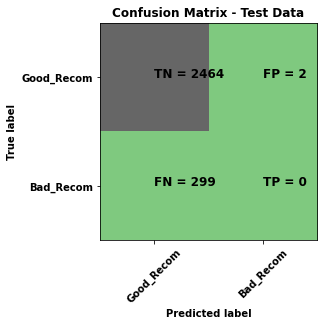

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


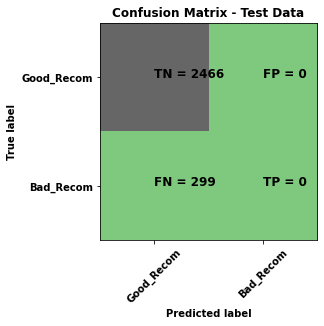

l2 roc_value: 0.6549813246100139
l2 threshold: 0.11801193250988615
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 65.5%


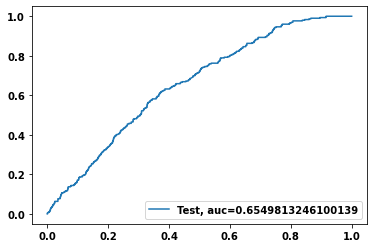

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


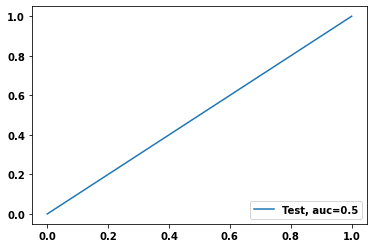

Time Taken by Model: --- 55.917139291763306 seconds ---
------------------------------------------------------------
KNN Model
model score
0.8817359855334539
Confusion Matrix


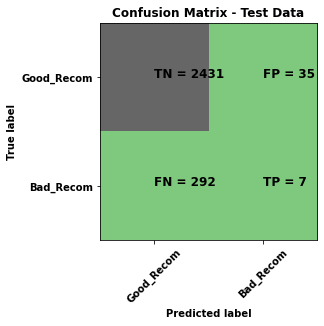

KNN roc_value: 0.580039710633173
KNN threshold: 0.2
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      2466
         1.0       0.17      0.02      0.04       299

    accuracy                           0.88      2765
   macro avg       0.53      0.50      0.49      2765
weighted avg       0.81      0.88      0.84      2765

ROC for the test dataset 58.0%


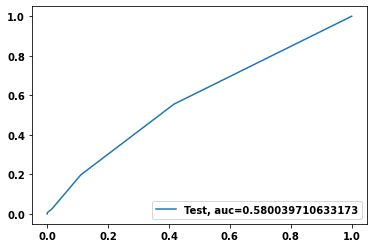

Time Taken by Model: --- 7.135369300842285 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.8144665461121158
Confusion Matrix


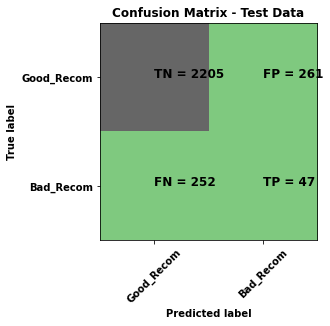

gini tree_roc_value: 0.5265768294965375
Tree threshold: 0.4
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2466
         1.0       0.15      0.16      0.15       299

    accuracy                           0.81      2765
   macro avg       0.53      0.53      0.53      2765
weighted avg       0.82      0.81      0.82      2765

ROC for the test dataset 52.7%


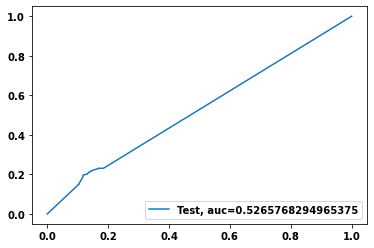

entropy score: 0.8253164556962025
Confusion Matrix


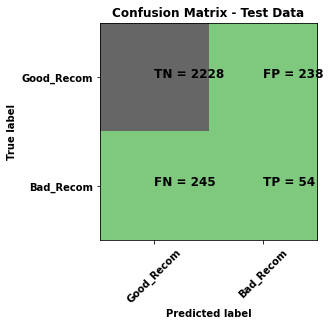

entropy tree_roc_value: 0.5483159599313201
Tree threshold: 0.4
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2466
         1.0       0.18      0.18      0.18       299

    accuracy                           0.83      2765
   macro avg       0.54      0.54      0.54      2765
weighted avg       0.82      0.83      0.82      2765

ROC for the test dataset 54.8%


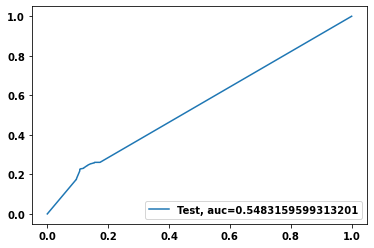

Time Taken by Model: --- 1.2481184005737305 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8784810126582279
Confusion Matrix


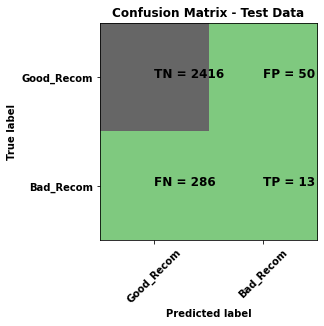

Random Forest roc_value: 0.6140568588997659
Random Forest threshold: 0.07133838383838383
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      2466
         1.0       0.21      0.04      0.07       299

    accuracy                           0.88      2765
   macro avg       0.55      0.51      0.50      2765
weighted avg       0.82      0.88      0.84      2765

ROC for the test dataset 61.4%


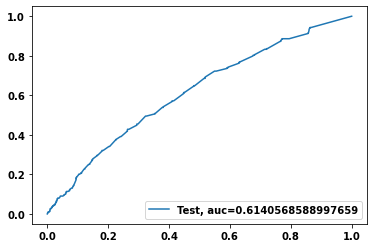

Time Taken by Model: --- 3.6222574710845947 seconds ---
------------------------------------------------------------
XGBoost Model
[13:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.8857142857142857
Confusion Matrix


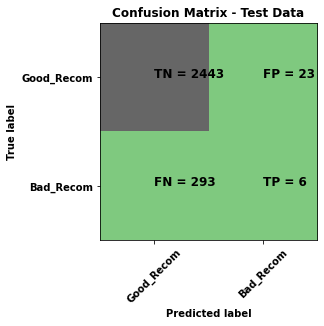

XGboost roc_value: 0.6451621653144979
XGBoost threshold: 0.06857911497354507
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      2466
         1.0       0.21      0.02      0.04       299

    accuracy                           0.89      2765
   macro avg       0.55      0.51      0.49      2765
weighted avg       0.82      0.89      0.84      2765

ROC for the test dataset 64.5%


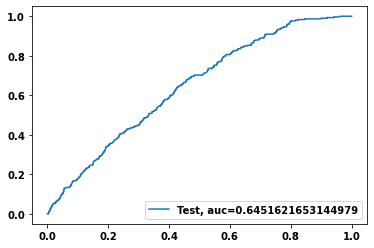

Time Taken by Model: --- 2.4987916946411133 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.891500904159132
Confusion Matrix


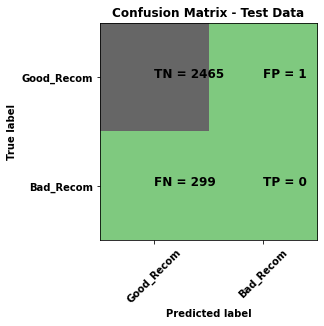

SVM roc_value: 0.506568258075716
SVM threshold: 0.10648082299400416
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 50.7%


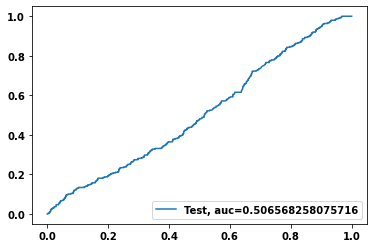

Time Taken by Model: --- 22.13857674598694 seconds ---


In [132]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Default Cross Validation", X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [133]:
# Check dataframe df_result yang berisi hasil gabungan dari semua proses model.
df_Results

Methodology  \
0   SMOTE Oversampling with with Default CV   
1   SMOTE Oversampling with with Default CV   
2   SMOTE Oversampling with with Default CV   
3   SMOTE Oversampling with with Default CV   
4   SMOTE Oversampling with with Default CV   
5   SMOTE Oversampling with with Default CV   
6   SMOTE Oversampling with with Default CV   
7                  Default Cross Validation   
8                  Default Cross Validation   
9                  Default Cross Validation   
10                 Default Cross Validation   
11                 Default Cross Validation   
12                 Default Cross Validation   
13                 Default Cross Validation   
14                 Default Cross Validation   

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.878481  0.614057  0.071338  
13                                     XGBoost  0.885714  0.645162  0.068579  
14                                         SVM  0.891501  0.506568  0.106481

### Hasil dari Default CV :
Melihat nilai Akurasi dan ROC, "Logistic regression model dengan Regularisasi L2" yang telah memberikan hasil terbaik untuk default CV.

## <a name="p4-2">Perform RandomOverSampler Method with Default Cross Validation  </a>

In [134]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy=1.0)
X_over, y_over= ROS.fit_resample(X_train_final, y_train)
  
X_over = pd.DataFrame(data=X_over, columns=X_train_final.columns)

In [135]:
y_over.value_counts()

0.0    9864
1.0    9864
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6710676730981422
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

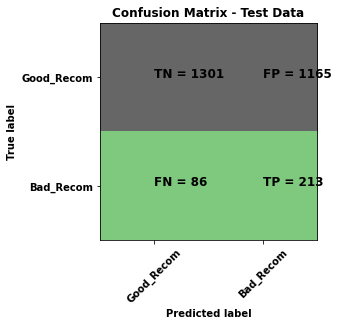

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


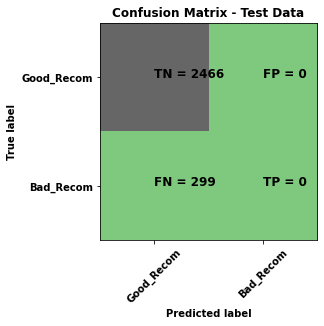

l2 roc_value: 0.6595192951905107
l2 threshold: 0.49267553411724985
classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.53      0.68      2466
         1.0       0.15      0.71      0.25       299

    accuracy                           0.55      2765
   macro avg       0.55      0.62      0.46      2765
weighted avg       0.85      0.55      0.63      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 66.0%


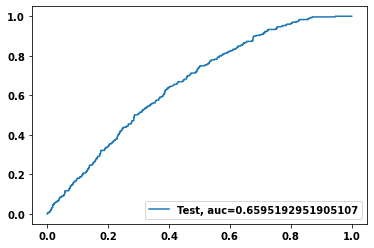

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


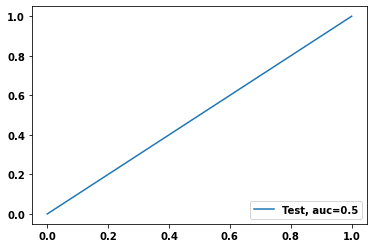

Time Taken by Model: --- 99.80010914802551 seconds ---
------------------------------------------------------------
KNN Model
model score
0.6835443037974683
Confusion Matrix


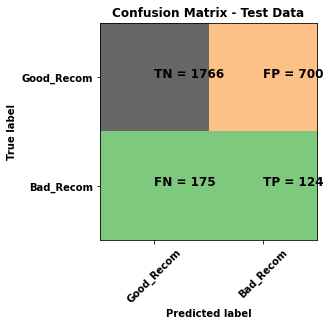

KNN roc_value: 0.5813715358304378
KNN threshold: 0.4
classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80      2466
         1.0       0.15      0.41      0.22       299

    accuracy                           0.68      2765
   macro avg       0.53      0.57      0.51      2765
weighted avg       0.83      0.68      0.74      2765

ROC for the test dataset 58.1%


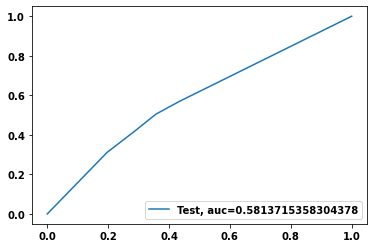

Time Taken by Model: --- 13.911229133605957 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.7808318264014467
Confusion Matrix


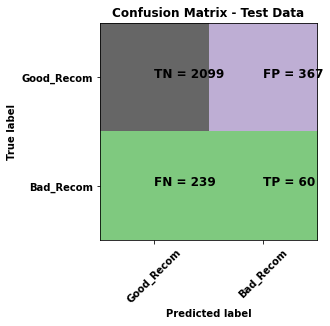

gini tree_roc_value: 0.5190625957842715
Tree threshold: 0.6875
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      2466
         1.0       0.14      0.20      0.17       299

    accuracy                           0.78      2765
   macro avg       0.52      0.53      0.52      2765
weighted avg       0.82      0.78      0.80      2765

ROC for the test dataset 51.9%


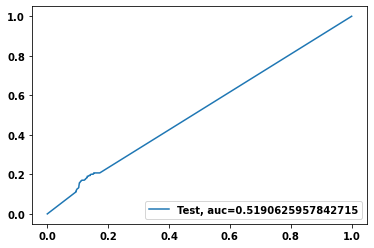

entropy score: 0.779385171790235
Confusion Matrix


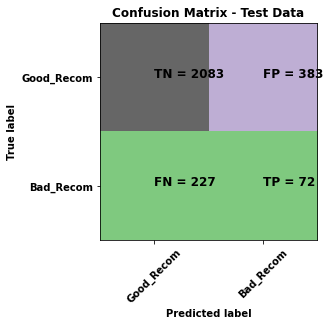

entropy tree_roc_value: 0.535280483471534
Tree threshold: 0.8
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2466
         1.0       0.16      0.24      0.19       299

    accuracy                           0.78      2765
   macro avg       0.53      0.54      0.53      2765
weighted avg       0.82      0.78      0.80      2765

ROC for the test dataset 53.5%


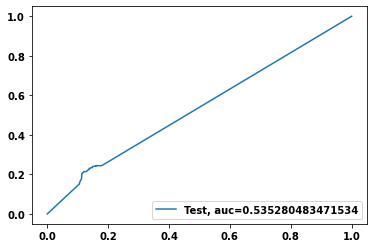

Time Taken by Model: --- 1.4923529624938965 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8386980108499096
Confusion Matrix


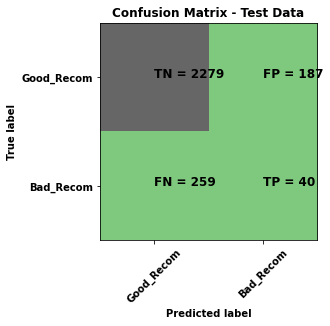

Random Forest roc_value: 0.6167801837430525
Random Forest threshold: 0.17
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      2466
         1.0       0.18      0.13      0.15       299

    accuracy                           0.84      2765
   macro avg       0.54      0.53      0.53      2765
weighted avg       0.82      0.84      0.83      2765

ROC for the test dataset 61.7%


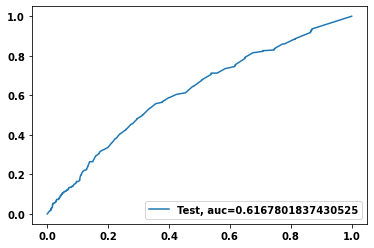

Time Taken by Model: --- 5.361429929733276 seconds ---
------------------------------------------------------------
XGBoost Model
[13:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.7547920433996383
Confusion Matrix


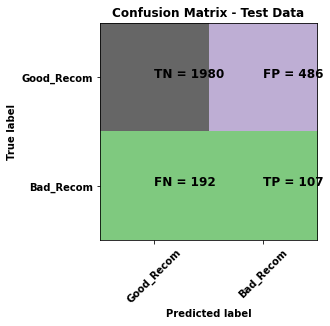

XGboost roc_value: 0.6550511708398093
XGBoost threshold: 0.32151252031326294
classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2466
         1.0       0.18      0.36      0.24       299

    accuracy                           0.75      2765
   macro avg       0.55      0.58      0.55      2765
weighted avg       0.83      0.75      0.79      2765

ROC for the test dataset 65.5%


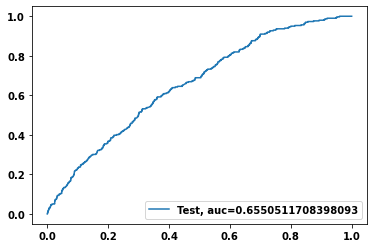

Time Taken by Model: --- 3.684859275817871 seconds ---
------------------------------------------------------------


In [136]:
Data_Imbalance_Handiling	 = "Random Oversampling with Default CV"
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [137]:
# Check dataframe df_result yang berisi hasil gabungan dari semua proses model.
df_Results

Methodology  \
0   SMOTE Oversampling with with Default CV   
1   SMOTE Oversampling with with Default CV   
2   SMOTE Oversampling with with Default CV   
3   SMOTE Oversampling with with Default CV   
4   SMOTE Oversampling with with Default CV   
5   SMOTE Oversampling with with Default CV   
6   SMOTE Oversampling with with Default CV   
7                  Default Cross Validation   
8                  Default Cross Validation   
9                  Default Cross Validation   
10                 Default Cross Validation   
11                 Default Cross Validation   
12                 Default Cross Validation   
13                 Default Cross Validation   
14                 Default Cross Validation   
15      Random Oversampling with Default CV   
16      Random Oversampling with Default CV   
17      Random Oversampling with Default CV   
18      Random Oversampling with Default CV   
19      Random Oversampling with Default CV   
20      Random Oversampling with Default CV   
21      Random Oversampling with Default CV   

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.878481  0.614057  0.071338  
13                                     XGBoost  0.885714  0.645162  0.068579  
14                                         SVM  0.891501  0.506568  0.106481  
15  Logistic Regression with L2 Regularisation  0.547559  0.659519  0.492676  
16  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
17                                         KNN  0.683544  0.581372       0.4  
18               Tree Model with gini criteria  0.780832  0.519063    0.6875  
19            Tree Model with entropy criteria  0.779385   0.53528       0.8  
20                               Random Forest  0.838698   0.61678      0.17  
21                                     XGBoost  0.754792  0.655051  0.321513

### Hasil dari RandomOverSampler dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic regression model dengan Regularisasi L2" yang telah memberikan hasil terbaik untuk RandomOverSampler method dengan default CV.

## <a name="p4-4">Oversampling with SMOTE Oversampling</a>

In [127]:
from imblearn import over_sampling

In [128]:
SMOTE = over_sampling.SMOTE(random_state=21,sampling_strategy=1.0 )
X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train_final, y_train)
  
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=X_train_final.columns)

In [129]:
y_train_Smote.value_counts()

0.0    9864
1.0    9864
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.673457677834388
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0

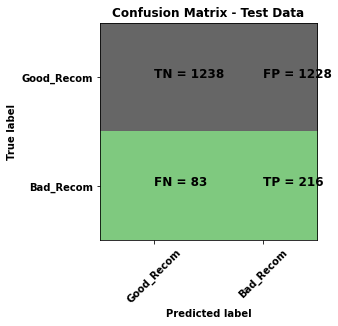

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


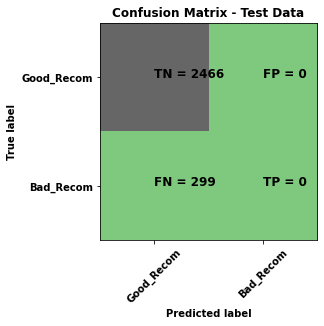

l2 roc_value: 0.6557557362063868
l2 threshold: 0.5360672615493159
classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.50      0.65      2466
         1.0       0.15      0.72      0.25       299

    accuracy                           0.53      2765
   macro avg       0.54      0.61      0.45      2765
weighted avg       0.85      0.53      0.61      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 65.6%


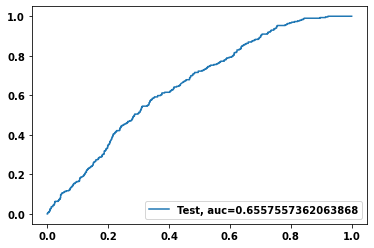

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


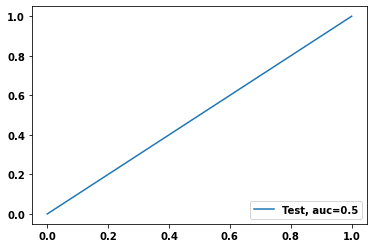

Time Taken by Model: --- 116.74993467330933 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.6629294755877034
Confusion Matrix


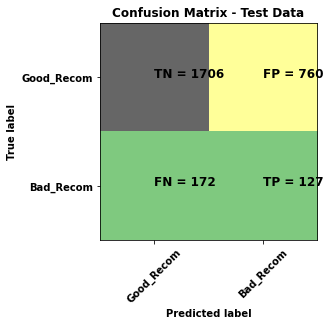

KNN roc_value: 0.5876556621558209
KNN threshold: 0.4
classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.79      2466
         1.0       0.14      0.42      0.21       299

    accuracy                           0.66      2765
   macro avg       0.53      0.56      0.50      2765
weighted avg       0.83      0.66      0.72      2765

ROC for the test dataset 58.8%


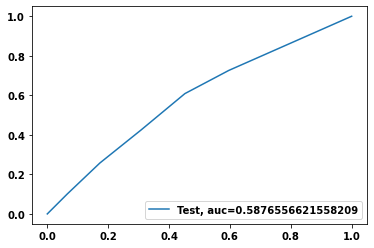

Time Taken by Model: --- 68.9726071357727 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.789873417721519
Confusion Matrix


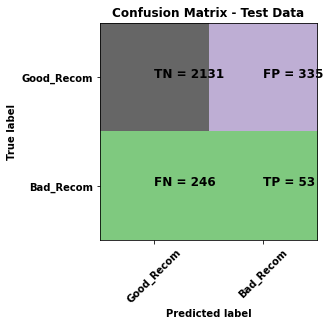

gini tree_roc_value: 0.5257312154328975
Tree threshold: 0.4444444444444444
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2466
         1.0       0.14      0.18      0.15       299

    accuracy                           0.79      2765
   macro avg       0.52      0.52      0.52      2765
weighted avg       0.81      0.79      0.80      2765

ROC for the test dataset 52.6%


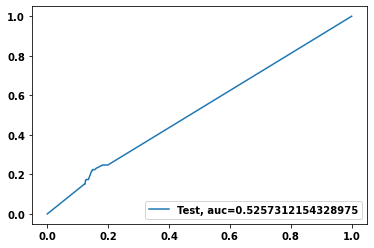

entropy score: 0.7985533453887884
Confusion Matrix


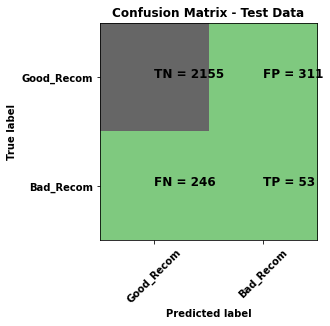

entropy tree_roc_value: 0.5321523217429279
Tree threshold: 0.4444444444444444
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      2466
         1.0       0.15      0.18      0.16       299

    accuracy                           0.80      2765
   macro avg       0.52      0.53      0.52      2765
weighted avg       0.82      0.80      0.81      2765

ROC for the test dataset 53.2%


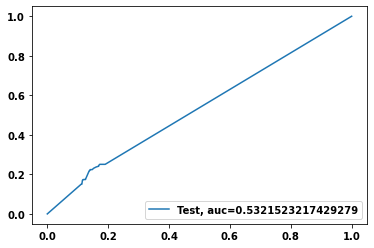

Time Taken by Model: --- 2.7709903717041016 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8553345388788427
Confusion Matrix


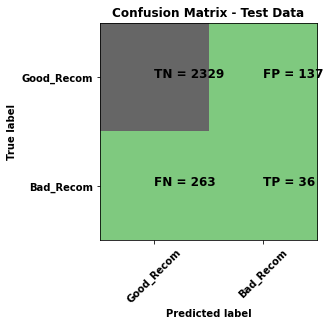

Random Forest roc_value: 0.615075393241055
Random Forest threshold: 0.12133333333333333
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2466
         1.0       0.21      0.12      0.15       299

    accuracy                           0.86      2765
   macro avg       0.55      0.53      0.54      2765
weighted avg       0.82      0.86      0.84      2765

ROC for the test dataset 61.5%


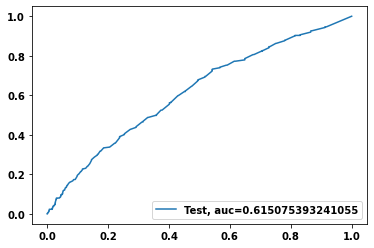

Time Taken by Model: --- 7.3012168407440186 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.8687160940325497
Confusion Matrix


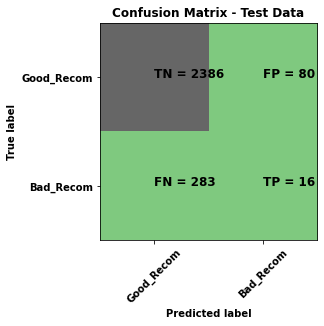

XGboost roc_value: 0.6457141539655028
XGBoost threshold: 0.05938300862908363
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2466
         1.0       0.17      0.05      0.08       299

    accuracy                           0.87      2765
   macro avg       0.53      0.51      0.51      2765
weighted avg       0.82      0.87      0.84      2765

ROC for the test dataset 64.6%


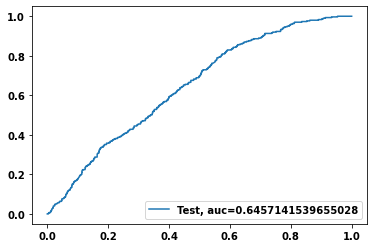

Time Taken by Model: --- 8.588841438293457 seconds ---
--------------------------------------------------------------------------------


In [130]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with with Default CV"
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [131]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0  SMOTE Oversampling with with Default CV   
1  SMOTE Oversampling with with Default CV   
2  SMOTE Oversampling with with Default CV   
3  SMOTE Oversampling with with Default CV   
4  SMOTE Oversampling with with Default CV   
5  SMOTE Oversampling with with Default CV   
6  SMOTE Oversampling with with Default CV   

                                        Model  Accuracy roc_value threshold  
0  Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                         KNN  0.662929  0.587656       0.4  
3               Tree Model with gini criteria  0.789873  0.525731  0.444444  
4            Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                               Random Forest  0.855335  0.615075  0.121333  
6                                     XGBoost  0.868716  0.645714  0.059383

### Hasil SMOTE OverSampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "XGBoost model dengan Regularisasi L2" yang telah memberikan hasil terbaik untuk SMOTE OverSampling method dengan default CV.

## <a name="p4-5">Oversampling with ADASYN Oversampling</a>

In [138]:
from imblearn import over_sampling

In [139]:
ADASYN = over_sampling.ADASYN(random_state=42,sampling_strategy=1.0)
X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train_final, y_train)
  
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=X_train_final.columns)

In [140]:
y_train_ADASYN.value_counts()

1.0    10054
0.0     9864
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6673061952405639
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

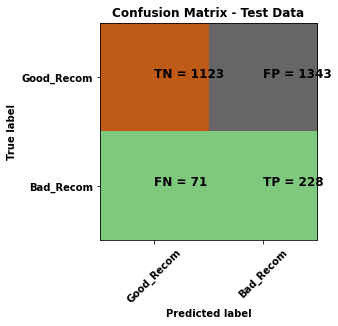

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


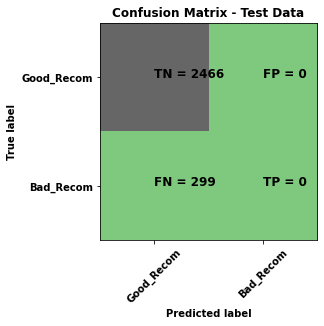

l2 roc_value: 0.6579487721982168
l2 threshold: 0.4575913914304341
classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.61      2466
         1.0       0.15      0.76      0.24       299

    accuracy                           0.49      2765
   macro avg       0.54      0.61      0.43      2765
weighted avg       0.85      0.49      0.57      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 65.8%


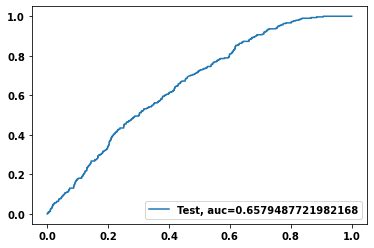

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


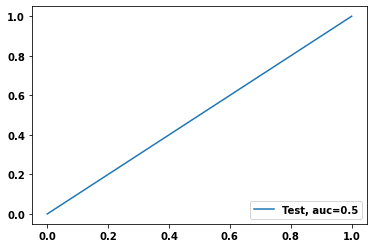

Time Taken by Model: --- 108.619220495224 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.6589511754068716
Confusion Matrix


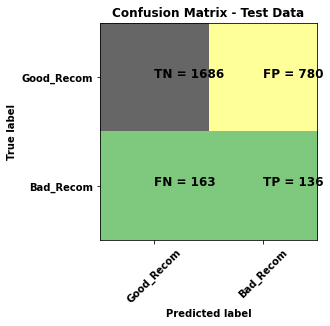

KNN roc_value: 0.5900684086180754
KNN threshold: 0.4
classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      2466
         1.0       0.15      0.45      0.22       299

    accuracy                           0.66      2765
   macro avg       0.53      0.57      0.50      2765
weighted avg       0.83      0.66      0.72      2765

ROC for the test dataset 59.0%


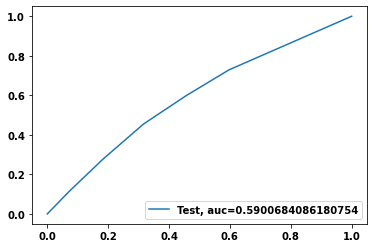

Time Taken by Model: --- 14.207356929779053 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.7956600361663653
Confusion Matrix


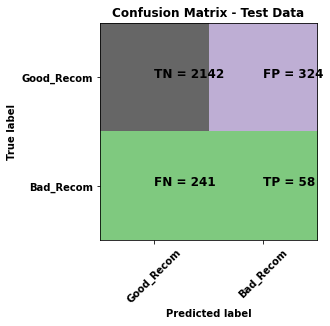

gini tree_roc_value: 0.5382126688854711
Tree threshold: 0.125
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2466
         1.0       0.15      0.19      0.17       299

    accuracy                           0.80      2765
   macro avg       0.53      0.53      0.53      2765
weighted avg       0.82      0.80      0.81      2765

ROC for the test dataset 53.8%


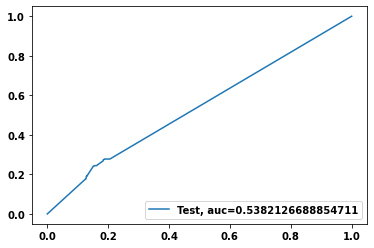

entropy score: 0.8094032549728752
Confusion Matrix


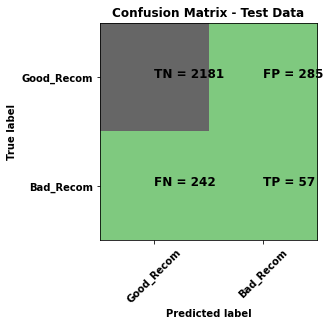

entropy tree_roc_value: 0.5397045301044032
Tree threshold: 0.45
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2466
         1.0       0.17      0.19      0.18       299

    accuracy                           0.81      2765
   macro avg       0.53      0.54      0.54      2765
weighted avg       0.82      0.81      0.81      2765

ROC for the test dataset 54.0%


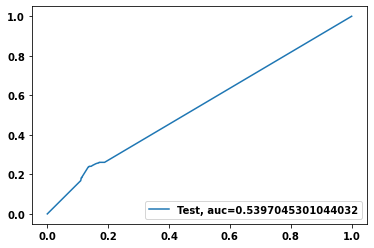

Time Taken by Model: --- 2.1078248023986816 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8582278481012658
Confusion Matrix


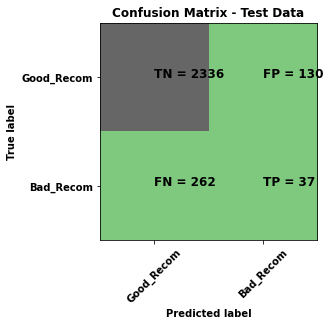

Random Forest roc_value: 0.6166954189010679
Random Forest threshold: 0.15083333333333335
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2466
         1.0       0.22      0.12      0.16       299

    accuracy                           0.86      2765
   macro avg       0.56      0.54      0.54      2765
weighted avg       0.83      0.86      0.84      2765

ROC for the test dataset 61.7%


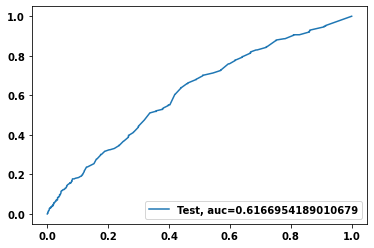

Time Taken by Model: --- 6.946749448776245 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.87124773960217
Confusion Matrix


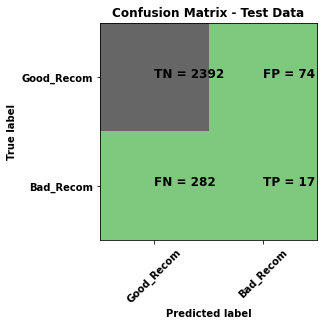

XGboost roc_value: 0.6424991930387043
XGBoost threshold: 0.07625728100538254
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2466
         1.0       0.19      0.06      0.09       299

    accuracy                           0.87      2765
   macro avg       0.54      0.51      0.51      2765
weighted avg       0.82      0.87      0.84      2765

ROC for the test dataset 64.2%


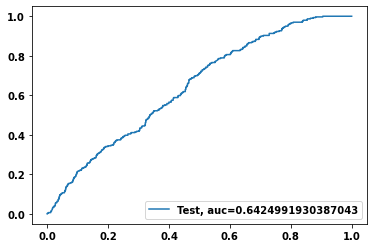

Time Taken by Model: --- 5.673513412475586 seconds ---
--------------------------------------------------------------------------------


In [141]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [142]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0     SMOTE Oversampling with with Default CV   
1     SMOTE Oversampling with with Default CV   
2     SMOTE Oversampling with with Default CV   
3     SMOTE Oversampling with with Default CV   
4     SMOTE Oversampling with with Default CV   
5     SMOTE Oversampling with with Default CV   
6     SMOTE Oversampling with with Default CV   
7                    Default Cross Validation   
8                    Default Cross Validation   
9                    Default Cross Validation   
10                   Default Cross Validation   
11                   Default Cross Validation   
12                   Default Cross Validation   
13                   Default Cross Validation   
14                   Default Cross Validation   
15        Random Oversampling with Default CV   
16        Random Oversampling with Default CV   
17        Random Oversampling with Default CV   
18        Random Oversampling with Default CV   
19        Random Oversampling with Default CV   
20        Random Oversampling with Default CV   
21        Random Oversampling with Default CV   
22  ADASYN Oversampling with with Default CV    
23  ADASYN Oversampling with with Default CV    
24  ADASYN Oversampling with with Default CV    
25  ADASYN Oversampling with with Default CV    
26  ADASYN Oversampling with with Default CV    
27  ADASYN Oversampling with with Default CV    
28  ADASYN Oversampling with with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.878481  0.614057  0.071338  
13                                     XGBoost  0.885714  0.645162  0.068579  
14                                         SVM  0.891501  0.506568  0.106481  
15  Logistic Regression with L2 Regularisation  0.547559  0.659519  0.492676  
16  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
17                                         KNN  0.683544  0.581372       0.4  
18               Tree Model with gini criteria  0.780832  0.519063    0.6875  
19            Tree Model with entropy criteria  0.779385   0.53528       0.8  
20                               Random Forest  0.838698   0.61678      0.17  
21                                     XGBoost  0.754792  0.655051  0.321513  
22  Logistic Regression with L2 Regularisation  0.488608  0.657949  0.457591  
23  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
24                                         KNN  0.658951  0.590068       0.4  
25               Tree Model with gini criteria   0.79566  0.538213     0.125  
26            Tree Model with entropy criteria  0.809403  0.539705      0.45  
27                               Random Forest  0.858228  0.616695  0.150833  
28                                     XGBoost  0.871248  0.642499  0.076257

### Hasil dari ADASYN Oversampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "XGBoost model " yang telah memberikan hasil terbaik untuk ADASYN Oversampling method dengan  default CV.

## <a name="p4-3">Perform RandomUnderSampler Method with Default Cross Validation</a>

In [143]:
from imblearn.under_sampling import RandomUnderSampler

In [144]:
US = RandomUnderSampler(random_state=42,sampling_strategy=1.0)
X_train_US, y_train_US= US.fit_resample(X_train_final, y_train)
  
X_train_US = pd.DataFrame(data=X_train_US,   columns=X_train_final.columns)

In [145]:
y_train_US.value_counts()

0.0    1195
1.0    1195
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6780003122375172
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

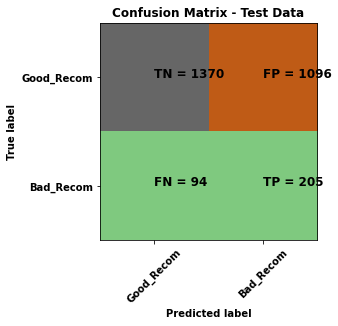

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


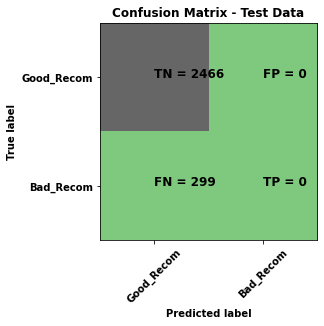

l2 roc_value: 0.6520708389956248
l2 threshold: 0.4936010359608756
classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.56      0.70      2466
         1.0       0.16      0.69      0.26       299

    accuracy                           0.57      2765
   macro avg       0.55      0.62      0.48      2765
weighted avg       0.85      0.57      0.65      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 65.2%


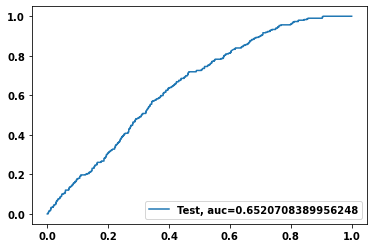

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


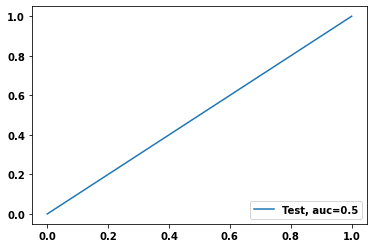

Time Taken by Model: --- 5.917575836181641 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.535623869801085
Confusion Matrix


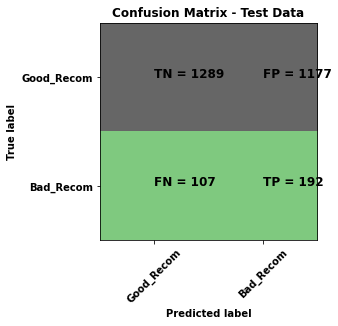

KNN roc_value: 0.6071888723427918
KNN threshold: 0.6
classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.52      0.67      2466
         1.0       0.14      0.64      0.23       299

    accuracy                           0.54      2765
   macro avg       0.53      0.58      0.45      2765
weighted avg       0.84      0.54      0.62      2765

ROC for the test dataset 60.7%


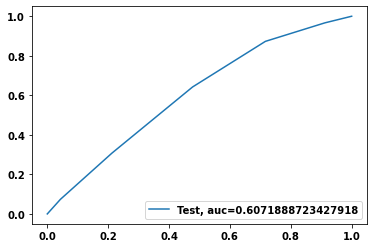

Time Taken by Model: --- 2.2530770301818848 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.5482820976491862
Confusion Matrix


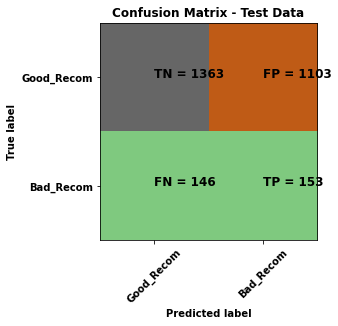

gini tree_roc_value: 0.5259034575918105
Tree threshold: 0.6666666666666666
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.55      0.69      2466
         1.0       0.12      0.51      0.20       299

    accuracy                           0.55      2765
   macro avg       0.51      0.53      0.44      2765
weighted avg       0.82      0.55      0.63      2765

ROC for the test dataset 52.6%


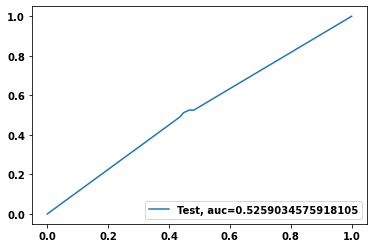

entropy score: 0.5692585895117541
Confusion Matrix


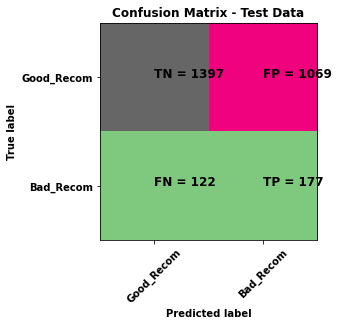

entropy tree_roc_value: 0.5761920649258002
Tree threshold: 0.3333333333333333
classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.57      0.70      2466
         1.0       0.14      0.59      0.23       299

    accuracy                           0.57      2765
   macro avg       0.53      0.58      0.47      2765
weighted avg       0.84      0.57      0.65      2765

ROC for the test dataset 57.6%


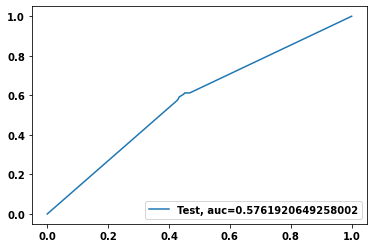

Time Taken by Model: --- 1.0621471405029297 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.5786618444846293
Confusion Matrix


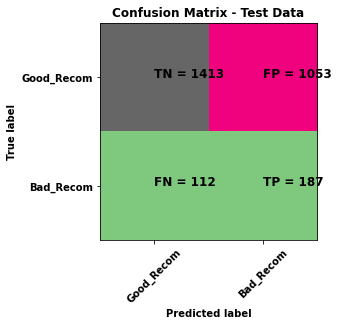

Random Forest roc_value: 0.6368355453566499
Random Forest threshold: 0.45
classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.57      0.71      2466
         1.0       0.15      0.63      0.24       299

    accuracy                           0.58      2765
   macro avg       0.54      0.60      0.48      2765
weighted avg       0.84      0.58      0.66      2765

ROC for the test dataset 63.7%


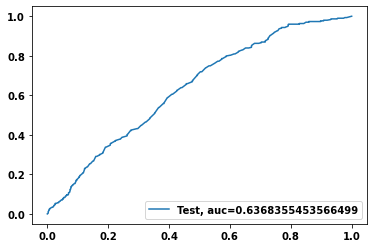

Time Taken by Model: --- 1.8612511157989502 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.5826401446654611
Confusion Matrix


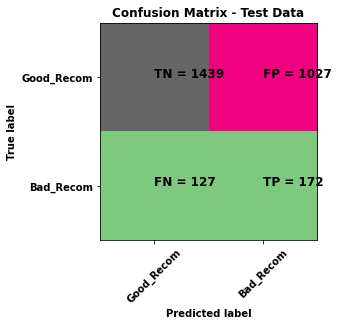

XGboost roc_value: 0.6319144376903818
XGBoost threshold: 0.319358229637146
classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.58      0.71      2466
         1.0       0.14      0.58      0.23       299

    accuracy                           0.58      2765
   macro avg       0.53      0.58      0.47      2765
weighted avg       0.84      0.58      0.66      2765

ROC for the test dataset 63.2%


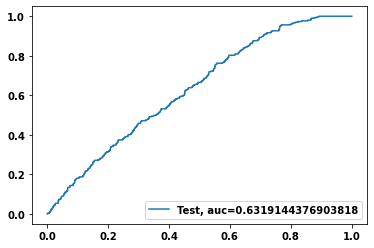

Time Taken by Model: --- 1.1515023708343506 seconds ---
--------------------------------------------------------------------------------


In [146]:
Data_Imbalance_Handiling	 = "RandomUnderSampler with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_US, y_train_US,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_US, y_train_US,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_US, y_train_US,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_US, y_train_US,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_US, y_train_US,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [147]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0     SMOTE Oversampling with with Default CV   
1     SMOTE Oversampling with with Default CV   
2     SMOTE Oversampling with with Default CV   
3     SMOTE Oversampling with with Default CV   
4     SMOTE Oversampling with with Default CV   
5     SMOTE Oversampling with with Default CV   
6     SMOTE Oversampling with with Default CV   
7                    Default Cross Validation   
8                    Default Cross Validation   
9                    Default Cross Validation   
10                   Default Cross Validation   
11                   Default Cross Validation   
12                   Default Cross Validation   
13                   Default Cross Validation   
14                   Default Cross Validation   
15        Random Oversampling with Default CV   
16        Random Oversampling with Default CV   
17        Random Oversampling with Default CV   
18        Random Oversampling with Default CV   
19        Random Oversampling with Default CV   
20        Random Oversampling with Default CV   
21        Random Oversampling with Default CV   
22  ADASYN Oversampling with with Default CV    
23  ADASYN Oversampling with with Default CV    
24  ADASYN Oversampling with with Default CV    
25  ADASYN Oversampling with with Default CV    
26  ADASYN Oversampling with with Default CV    
27  ADASYN Oversampling with with Default CV    
28  ADASYN Oversampling with with Default CV    
29        RandomUnderSampler with Default CV    
30        RandomUnderSampler with Default CV    
31        RandomUnderSampler with Default CV    
32        RandomUnderSampler with Default CV    
33        RandomUnderSampler with Default CV    
34        RandomUnderSampler with Default CV    
35        RandomUnderSampler with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.878481  0.614057  0.071338  
13                                     XGBoost  0.885714  0.645162  0.068579  
14                                         SVM  0.891501  0.506568  0.106481  
15  Logistic Regression with L2 Regularisation  0.547559  0.659519  0.492676  
16  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
17                                         KNN  0.683544  0.581372       0.4  
18               Tree Model with gini criteria  0.780832  0.519063    0.6875  
19            Tree Model with entropy criteria  0.779385   0.53528       0.8  
20                               Random Forest  0.838698   0.61678      0.17  
21                                     XGBoost  0.754792  0.655051  0.321513  
22  Logistic Regression with L2 Regularisation  0.488608  0.657949  0.457591  
23  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
24                                         KNN  0.658951  0.590068       0.4  
25               Tree Model with gini criteria   0.79566  0.538213     0.125  
26            Tree Model with entropy criteria  0.809403  0.539705      0.45  
27      

### Hasil dari RandomUnderSampler dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic Regression with L1 Regularisation " yang telah memberikan hasil terbaik untuk RandomUnderSampler method dengan  default CV.

## <a name="p4-6">Undersampling with Nearmiss V.1 Undersampling</a>

In [148]:
from imblearn.under_sampling import NearMiss

In [149]:
nm1 = NearMiss(sampling_strategy=1.0, version=1)
X_train_nm1, y_train_nm1= nm1.fit_resample(X_train_final, y_train)
  
X_train_nm1 = pd.DataFrame(data=X_train_nm1,   columns=X_train_final.columns)

In [150]:
y_train_nm1.value_counts()

0.0    1195
1.0    1195
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.8976121904416561
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

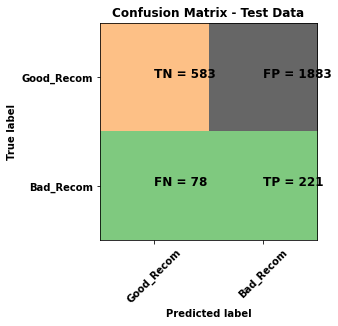

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


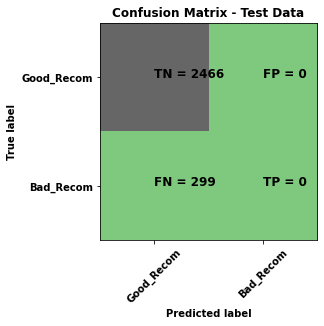

l2 roc_value: 0.45299348734766065
l2 threshold: 0.19592857883303852
classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.24      0.37      2466
         1.0       0.11      0.74      0.18       299

    accuracy                           0.29      2765
   macro avg       0.49      0.49      0.28      2765
weighted avg       0.80      0.29      0.35      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 45.3%


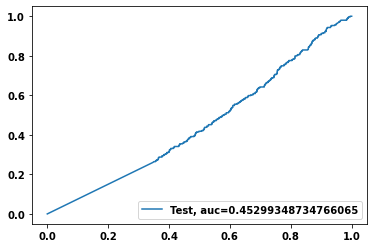

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


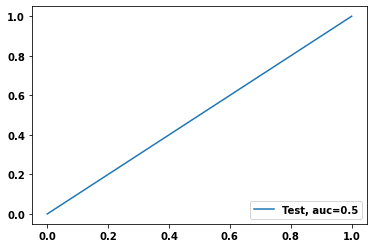

Time Taken by Model: --- 4.3005688190460205 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.32115732368896927
Confusion Matrix


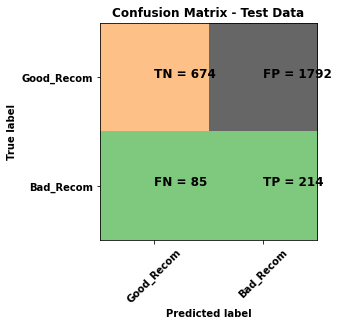

KNN roc_value: 0.4807502434446262
KNN threshold: 0.2
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.27      0.42      2466
         1.0       0.11      0.72      0.19       299

    accuracy                           0.32      2765
   macro avg       0.50      0.49      0.30      2765
weighted avg       0.80      0.32      0.39      2765

ROC for the test dataset 48.1%


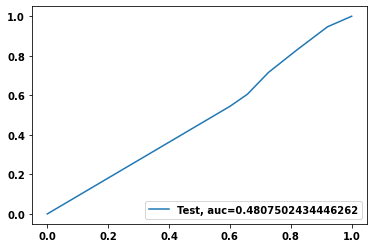

Time Taken by Model: --- 2.0338873863220215 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.23905967450271248
Confusion Matrix


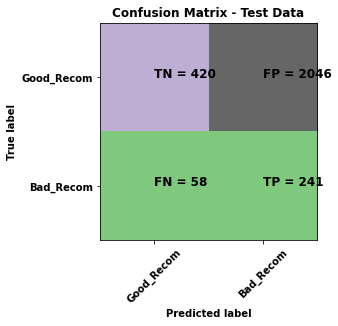

gini tree_roc_value: 0.4885540338571123
Tree threshold: 2.0
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 48.9%


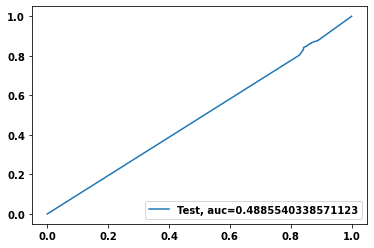

entropy score: 0.23399638336347198
Confusion Matrix


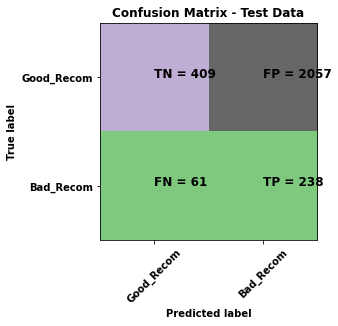

entropy tree_roc_value: 0.48128256665229063
Tree threshold: 2.0
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 48.1%


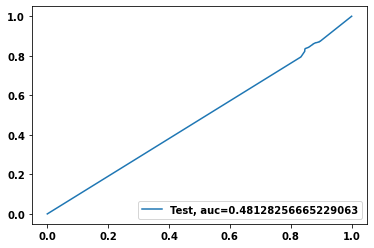

Time Taken by Model: --- 0.9314804077148438 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.22097649186256782
Confusion Matrix


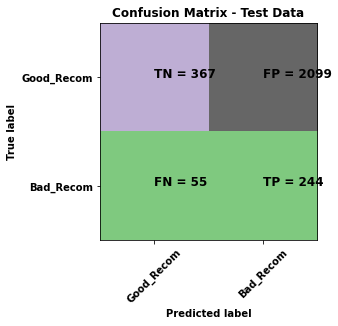

Random Forest roc_value: 0.45912639319494286
Random Forest threshold: 0.13194444444444442
classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.15      0.25      2466
         1.0       0.10      0.82      0.18       299

    accuracy                           0.22      2765
   macro avg       0.49      0.48      0.22      2765
weighted avg       0.79      0.22      0.25      2765

ROC for the test dataset 45.9%


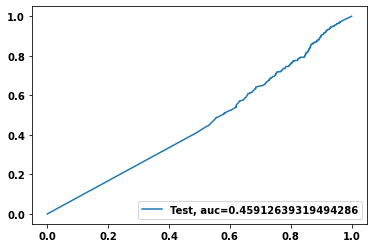

Time Taken by Model: --- 1.4168853759765625 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.247377938517179
Confusion Matrix


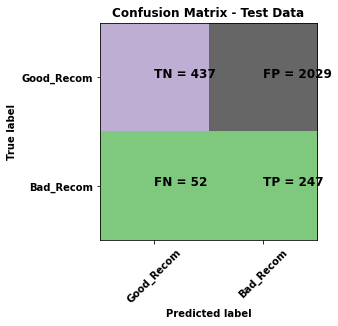

XGboost roc_value: 0.4505210664366488
XGBoost threshold: 0.22260791063308716
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.18      0.30      2466
         1.0       0.11      0.83      0.19       299

    accuracy                           0.25      2765
   macro avg       0.50      0.50      0.24      2765
weighted avg       0.81      0.25      0.28      2765

ROC for the test dataset 45.1%


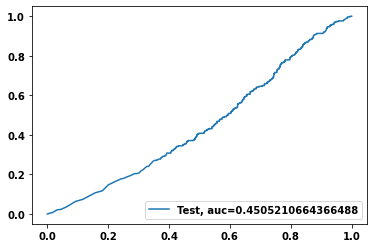

Time Taken by Model: --- 1.1709668636322021 seconds ---
--------------------------------------------------------------------------------


In [151]:
Data_Imbalance_Handiling	 = "NearMiss V.1 Undersampling with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_nm1, y_train_nm1,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_nm1, y_train_nm1,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_nm1, y_train_nm1,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_nm1, y_train_nm1,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_nm1, y_train_nm1,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [152]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0       SMOTE Oversampling with with Default CV   
1       SMOTE Oversampling with with Default CV   
2       SMOTE Oversampling with with Default CV   
3       SMOTE Oversampling with with Default CV   
4       SMOTE Oversampling with with Default CV   
5       SMOTE Oversampling with with Default CV   
6       SMOTE Oversampling with with Default CV   
7                      Default Cross Validation   
8                      Default Cross Validation   
9                      Default Cross Validation   
10                     Default Cross Validation   
11                     Default Cross Validation   
12                     Default Cross Validation   
13                     Default Cross Validation   
14                     Default Cross Validation   
15          Random Oversampling with Default CV   
16          Random Oversampling with Default CV   
17          Random Oversampling with Default CV   
18          Random Oversampling with Default CV   
19          Random Oversampling with Default CV   
20          Random Oversampling with Default CV   
21          Random Oversampling with Default CV   
22    ADASYN Oversampling with with Default CV    
23    ADASYN Oversampling with with Default CV    
24    ADASYN Oversampling with with Default CV    
25    ADASYN Oversampling with with Default CV    
26    ADASYN Oversampling with with Default CV    
27    ADASYN Oversampling with with Default CV    
28    ADASYN Oversampling with with Default CV    
29          RandomUnderSampler with Default CV    
30          RandomUnderSampler with Default CV    
31          RandomUnderSampler with Default CV    
32          RandomUnderSampler with Default CV    
33          RandomUnderSampler with Default CV    
34          RandomUnderSampler with Default CV    
35          RandomUnderSampler with Default CV    
36  NearMiss V.1 Undersampling with Default CV    
37  NearMiss V.1 Undersampling with Default CV    
38  NearMiss V.1 Undersampling with Default CV    
39  NearMiss V.1 Undersampling with Default CV    
40  NearMiss V.1 Undersampling with Default CV    
41  NearMiss V.1 Undersampling with Default CV    
42  NearMiss V.1 Undersampling with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.878481  0.614057  0.071338  
13                                     XGBoost  0.885714  0.645162  0.068579  
14                                         SVM  0.891501  0.506568  0.106481  
15  Logistic Regression with L2 Regularisation  0.547559  0.659519  0.492676  
16  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
17                                         KNN  0.683544  0.581372       0.4  
18               Tree Model with gini criteria  0.780832  0.519063    0.6875  
19            Tree Model with entropy criteria  0.779385   0.53528       0.8  
20                               Random Forest  0.838698   0.61678      0.17  
21                                     XGBoost  0.754

### Hasil dari NearMiss V.1 Undersampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic Regression with L1 Regularisation " yang telah memberikan hasil terbaik untuk NearMiss V.1 Undersampling method dengan  default CV.

## <a name="p4-7">Undersampling with Nearmiss V.2 Undersampling</a>

In [153]:
from imblearn.under_sampling import NearMiss

nm2 = NearMiss(sampling_strategy=1.0, version=2)
X_train_nm2, y_train_nm2= nm2.fit_resample(X_train_final, y_train)
  
X_train_nm2 = pd.DataFrame(data=X_train_nm2,   columns=X_train_final.columns)

In [154]:
y_train_nm2.value_counts()

0.0    1195
1.0    1195
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9249501461872743
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

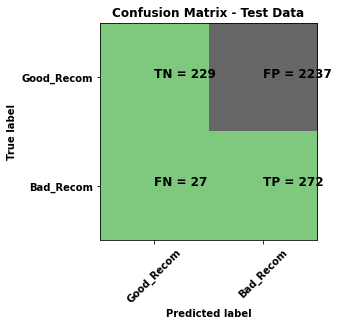

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


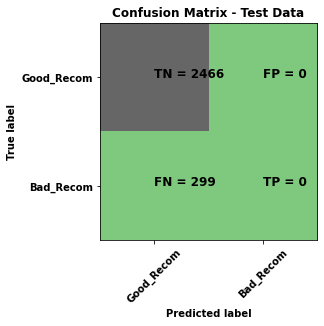

l2 roc_value: 0.5546631512991399
l2 threshold: 0.657587065735834
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.09      0.17      2466
         1.0       0.11      0.91      0.19       299

    accuracy                           0.18      2765
   macro avg       0.50      0.50      0.18      2765
weighted avg       0.81      0.18      0.17      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 55.5%


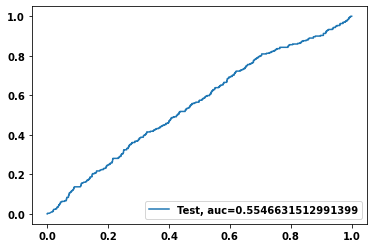

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


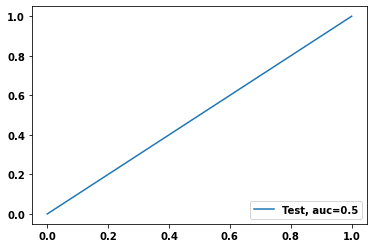

Time Taken by Model: --- 8.845543384552002 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.21229656419529838
Confusion Matrix


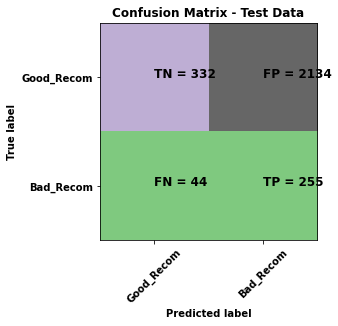

KNN roc_value: 0.49393897473872084
KNN threshold: 0.2
classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.13      0.23      2466
         1.0       0.11      0.85      0.19       299

    accuracy                           0.21      2765
   macro avg       0.49      0.49      0.21      2765
weighted avg       0.80      0.21      0.23      2765

ROC for the test dataset 49.4%


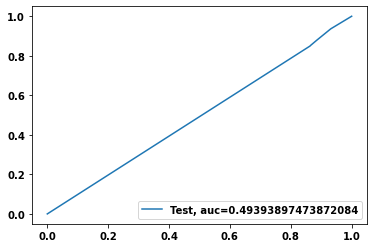

Time Taken by Model: --- 2.134681463241577 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.19891500904159132
Confusion Matrix


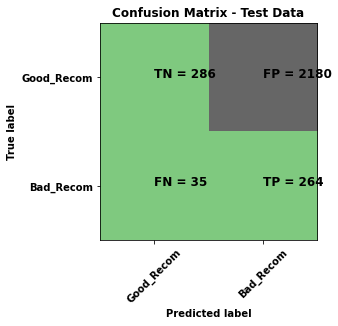

gini tree_roc_value: 0.499460217486241
Tree threshold: 2.0
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 49.9%


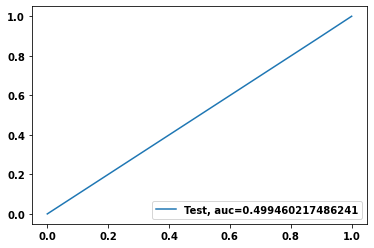

entropy score: 0.19746835443037974
Confusion Matrix


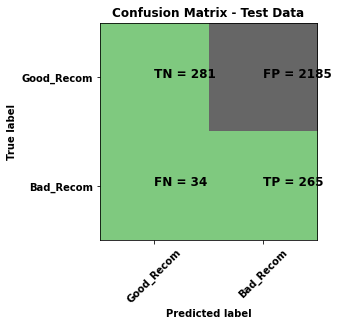

entropy tree_roc_value: 0.5001186707787787
Tree threshold: 1.0
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 50.0%


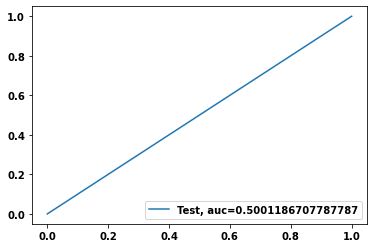

Time Taken by Model: --- 0.9189767837524414 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.2104882459312839
Confusion Matrix


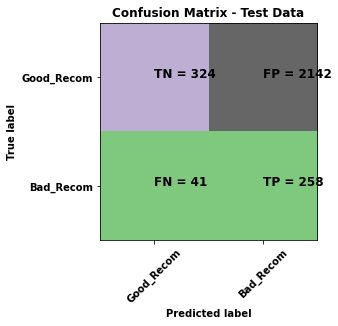

Random Forest roc_value: 0.5600758950489194
Random Forest threshold: 0.98
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.13      0.23      2466
         1.0       0.11      0.86      0.19       299

    accuracy                           0.21      2765
   macro avg       0.50      0.50      0.21      2765
weighted avg       0.80      0.21      0.22      2765

ROC for the test dataset 56.0%


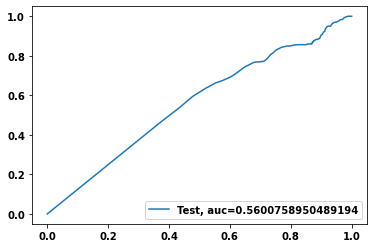

Time Taken by Model: --- 1.4541387557983398 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.20723327305605788
Confusion Matrix


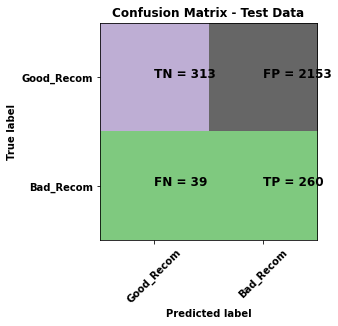

XGboost roc_value: 0.5624269327062091
XGBoost threshold: 0.9994204044342041
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.13      0.22      2466
         1.0       0.11      0.87      0.19       299

    accuracy                           0.21      2765
   macro avg       0.50      0.50      0.21      2765
weighted avg       0.80      0.21      0.22      2765

ROC for the test dataset 56.2%


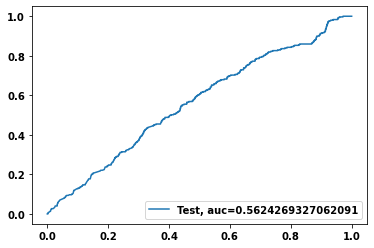

Time Taken by Model: --- 1.2277939319610596 seconds ---
--------------------------------------------------------------------------------


In [155]:
Data_Imbalance_Handiling	 = "NearMiss V.2 Undersampling with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_nm2, y_train_nm2,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_nm2, y_train_nm2,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_nm2, y_train_nm2,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_nm2, y_train_nm2,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_nm2, y_train_nm2,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [156]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0       SMOTE Oversampling with with Default CV   
1       SMOTE Oversampling with with Default CV   
2       SMOTE Oversampling with with Default CV   
3       SMOTE Oversampling with with Default CV   
4       SMOTE Oversampling with with Default CV   
5       SMOTE Oversampling with with Default CV   
6       SMOTE Oversampling with with Default CV   
7                      Default Cross Validation   
8                      Default Cross Validation   
9                      Default Cross Validation   
10                     Default Cross Validation   
11                     Default Cross Validation   
12                     Default Cross Validation   
13                     Default Cross Validation   
14                     Default Cross Validation   
15          Random Oversampling with Default CV   
16          Random Oversampling with Default CV   
17          Random Oversampling with Default CV   
18          Random Oversampling with Default CV   
19          Random Oversampling with Default CV   
20          Random Oversampling with Default CV   
21          Random Oversampling with Default CV   
22    ADASYN Oversampling with with Default CV    
23    ADASYN Oversampling with with Default CV    
24    ADASYN Oversampling with with Default CV    
25    ADASYN Oversampling with with Default CV    
26    ADASYN Oversampling with with Default CV    
27    ADASYN Oversampling with with Default CV    
28    ADASYN Oversampling with with Default CV    
29          RandomUnderSampler with Default CV    
30          RandomUnderSampler with Default CV    
31          RandomUnderSampler with Default CV    
32          RandomUnderSampler with Default CV    
33          RandomUnderSampler with Default CV    
34          RandomUnderSampler with Default CV    
35          RandomUnderSampler with Default CV    
36  NearMiss V.1 Undersampling with Default CV    
37  NearMiss V.1 Undersampling with Default CV    
38  NearMiss V.1 Undersampling with Default CV    
39  NearMiss V.1 Undersampling with Default CV    
40  NearMiss V.1 Undersampling with Default CV    
41  NearMiss V.1 Undersampling with Default CV    
42  NearMiss V.1 Undersampling with Default CV    
43  NearMiss V.2 Undersampling with Default CV    
44  NearMiss V.2 Undersampling with Default CV    
45  NearMiss V.2 Undersampling with Default CV    
46  NearMiss V.2 Undersampling with Default CV    
47  NearMiss V.2 Undersampling with Default CV    
48  NearMiss V.2 Undersampling with Default CV    
49  NearMiss V.2 Undersampling with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.878481  0.614057  0.071338  
13                                     XGBoost  0.885714  0.645162  0.068579  
14                                         SVM  0.891501  0.506568  0.106481  
15  Logistic Regression with L2 Regularisation  0.547559  0.659519  0.492676  
16  Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
17          

### Hasil dari NearMiss V.2 Undersampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic Regression with L1 Regularisation " yang telah memberikan hasil terbaik untuk NearMiss V.2 Undersampling method dengan  default CV.

## <a name="p4-8">Undersampling with Nearmiss V.3 Undersampling</a>

In [157]:
from imblearn.under_sampling import NearMiss

nm3 = NearMiss(sampling_strategy=1.0, version=3)
X_train_nm3, y_train_nm3= nm3.fit_resample(X_train_final, y_train)
  
X_train_nm3 = pd.DataFrame(data=X_train_nm3,   columns=X_train_final.columns)

In [158]:
y_train_nm3.value_counts()

0.0    1195
1.0    1195
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.7678526872170037
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

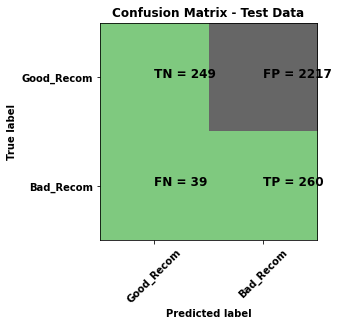

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


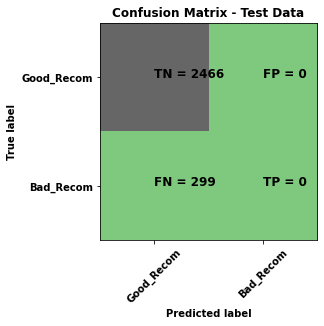

l2 roc_value: 0.5438783509237334
l2 threshold: 0.5169312535961939
classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.10      0.18      2466
         1.0       0.10      0.87      0.19       299

    accuracy                           0.18      2765
   macro avg       0.48      0.49      0.18      2765
weighted avg       0.78      0.18      0.18      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 54.4%


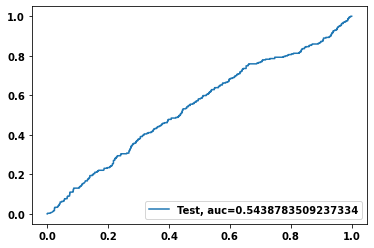

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


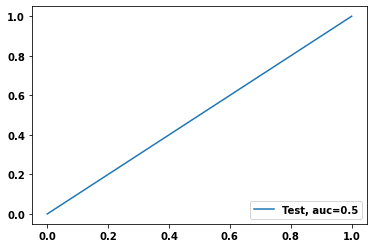

Time Taken by Model: --- 7.178962707519531 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.5001808318264015
Confusion Matrix


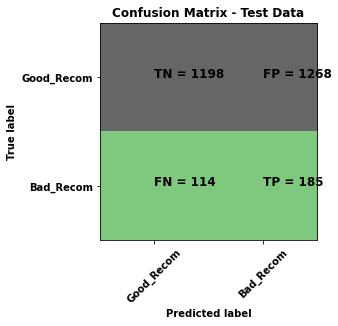

KNN roc_value: 0.5532675829407026
KNN threshold: 0.6
classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.49      0.63      2466
         1.0       0.13      0.62      0.21       299

    accuracy                           0.50      2765
   macro avg       0.52      0.55      0.42      2765
weighted avg       0.83      0.50      0.59      2765

ROC for the test dataset 55.3%


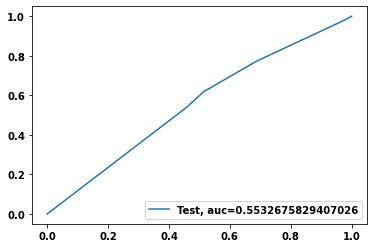

Time Taken by Model: --- 2.3402493000030518 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.3971066907775769
Confusion Matrix


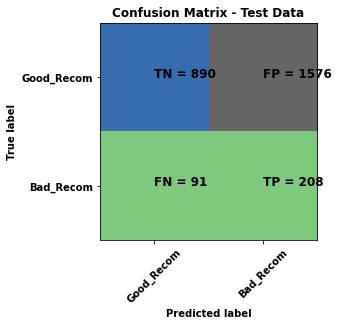

gini tree_roc_value: 0.5282802637610635
Tree threshold: 1.0
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 52.8%


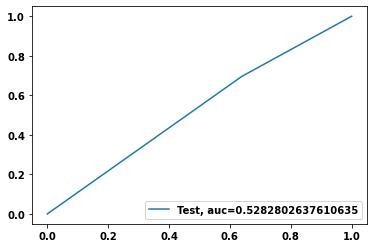

entropy score: 0.41374321880650994
Confusion Matrix


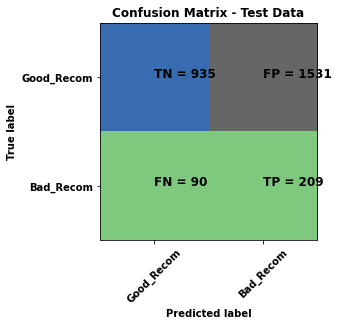

entropy tree_roc_value: 0.5390765921549799
Tree threshold: 1.0
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 53.9%


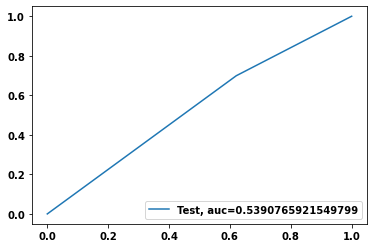

Time Taken by Model: --- 0.9621801376342773 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.5012658227848101
Confusion Matrix


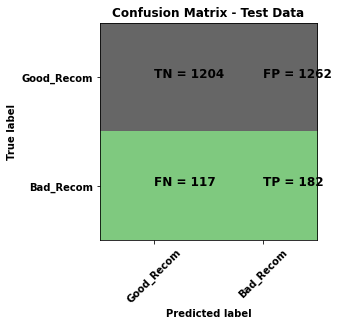

Random Forest roc_value: 0.5749477170454638
Random Forest threshold: 0.43
classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.49      0.64      2466
         1.0       0.13      0.61      0.21       299

    accuracy                           0.50      2765
   macro avg       0.52      0.55      0.42      2765
weighted avg       0.83      0.50      0.59      2765

ROC for the test dataset 57.5%


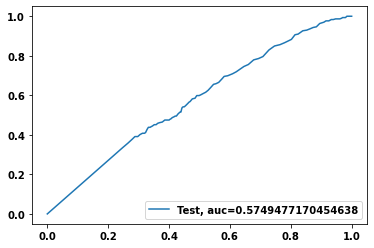

Time Taken by Model: --- 1.5825188159942627 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.4799276672694394
Confusion Matrix


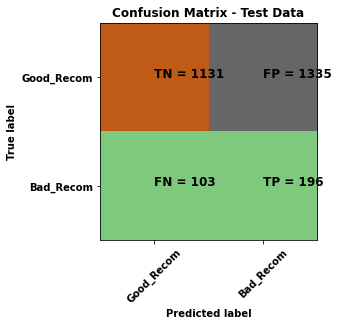

XGboost roc_value: 0.5791846029072306
XGBoost threshold: 0.11836549639701843
classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.46      0.61      2466
         1.0       0.13      0.66      0.21       299

    accuracy                           0.48      2765
   macro avg       0.52      0.56      0.41      2765
weighted avg       0.83      0.48      0.57      2765

ROC for the test dataset 57.9%


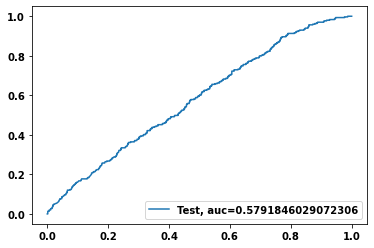

Time Taken by Model: --- 1.2885088920593262 seconds ---
--------------------------------------------------------------------------------


In [159]:
Data_Imbalance_Handiling	 = "NearMiss V.3 Undersampling with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_nm3, y_train_nm3,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_nm3, y_train_nm3,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_nm3, y_train_nm3,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_nm3, y_train_nm3,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_nm3, y_train_nm3,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [160]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0       SMOTE Oversampling with with Default CV   
1       SMOTE Oversampling with with Default CV   
2       SMOTE Oversampling with with Default CV   
3       SMOTE Oversampling with with Default CV   
4       SMOTE Oversampling with with Default CV   
5       SMOTE Oversampling with with Default CV   
6       SMOTE Oversampling with with Default CV   
7                      Default Cross Validation   
8                      Default Cross Validation   
9                      Default Cross Validation   
10                     Default Cross Validation   
11                     Default Cross Validation   
12                     Default Cross Validation   
13                     Default Cross Validation   
14                     Default Cross Validation   
15          Random Oversampling with Default CV   
16          Random Oversampling with Default CV   
17          Random Oversampling with Default CV   
18          Random Oversampling with Default CV   
19          Random Oversampling with Default CV   
20          Random Oversampling with Default CV   
21          Random Oversampling with Default CV   
22    ADASYN Oversampling with with Default CV    
23    ADASYN Oversampling with with Default CV    
24    ADASYN Oversampling with with Default CV    
25    ADASYN Oversampling with with Default CV    
26    ADASYN Oversampling with with Default CV    
27    ADASYN Oversampling with with Default CV    
28    ADASYN Oversampling with with Default CV    
29          RandomUnderSampler with Default CV    
30          RandomUnderSampler with Default CV    
31          RandomUnderSampler with Default CV    
32          RandomUnderSampler with Default CV    
33          RandomUnderSampler with Default CV    
34          RandomUnderSampler with Default CV    
35          RandomUnderSampler with Default CV    
36  NearMiss V.1 Undersampling with Default CV    
37  NearMiss V.1 Undersampling with Default CV    
38  NearMiss V.1 Undersampling with Default CV    
39  NearMiss V.1 Undersampling with Default CV    
40  NearMiss V.1 Undersampling with Default CV    
41  NearMiss V.1 Undersampling with Default CV    
42  NearMiss V.1 Undersampling with Default CV    
43  NearMiss V.2 Undersampling with Default CV    
44  NearMiss V.2 Undersampling with Default CV    
45  NearMiss V.2 Undersampling with Default CV    
46  NearMiss V.2 Undersampling with Default CV    
47  NearMiss V.2 Undersampling with Default CV    
48  NearMiss V.2 Undersampling with Default CV    
49  NearMiss V.2 Undersampling with Default CV    
50  NearMiss V.3 Undersampling with Default CV    
51  NearMiss V.3 Undersampling with Default CV    
52  NearMiss V.3 Undersampling with Default CV    
53  NearMiss V.3 Undersampling with Default CV    
54  NearMiss V.3 Undersampling with Default CV    
55  NearMiss V.3 Undersampling with Default CV    
56  NearMiss V.3 Undersampling with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
9                                          KNN  0.881736   0.58004       0.2  
10               Tree Model with gini criteria  0.814467  0.526577       0.4  
11            Tree Model with entropy criteria  0.825316  0.548316       0.4  
12                               Random Forest  0.

### Hasil dari NearMiss V.3 Undersampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic Regression with L1 Regularisation " yang telah memberikan hasil terbaik untuk NearMiss V.3 Undersampling method dengan  default CV.

## <a name="p4-9">Undersampling with ENN Undersampling</a>

In [161]:
from imblearn.under_sampling import EditedNearestNeighbours, CondensedNearestNeighbour, TomekLinks

In [162]:
enn = EditedNearestNeighbours(sampling_strategy='auto',n_jobs=1,n_neighbors=5, kind_sel='mode')
X_train_enn, y_train_enn= enn.fit_resample(X_train_final, y_train)
  
X_train_enn = pd.DataFrame(data=X_train_enn,   columns=X_train_final.columns)

In [163]:
y_train_enn.value_counts()

0.0    9682
1.0    1195
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6680006213143189
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

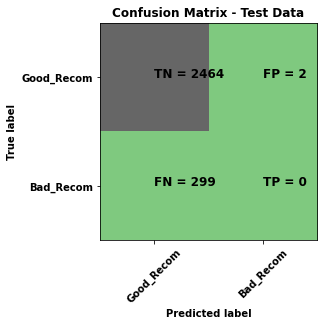

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


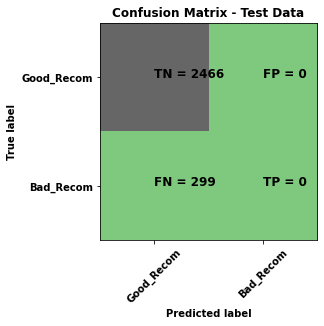

l2 roc_value: 0.6563009436700329
l2 threshold: 0.12130113928366679
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 65.6%


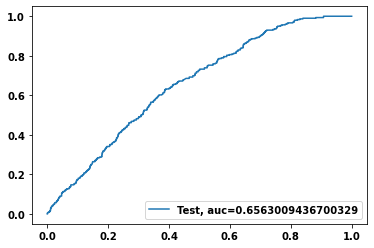

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


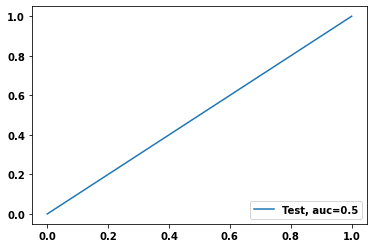

Time Taken by Model: --- 105.58347630500793 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.8737793851717902
Confusion Matrix


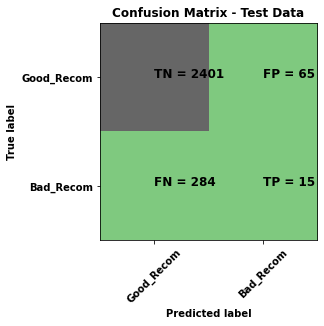

KNN roc_value: 0.5761615495826856
KNN threshold: 0.2
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2466
         1.0       0.19      0.05      0.08       299

    accuracy                           0.87      2765
   macro avg       0.54      0.51      0.51      2765
weighted avg       0.82      0.87      0.84      2765

ROC for the test dataset 57.6%


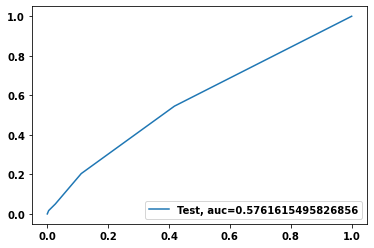

Time Taken by Model: --- 15.06904935836792 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.8112115732368896
Confusion Matrix


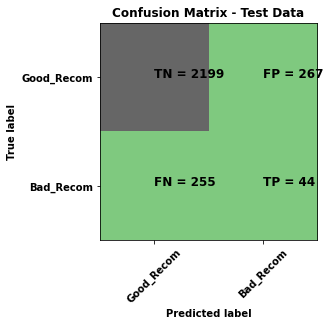

gini tree_roc_value: 0.5244163432040297
Tree threshold: 0.21428571428571427
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2466
         1.0       0.14      0.15      0.14       299

    accuracy                           0.81      2765
   macro avg       0.52      0.52      0.52      2765
weighted avg       0.81      0.81      0.81      2765

ROC for the test dataset 52.4%


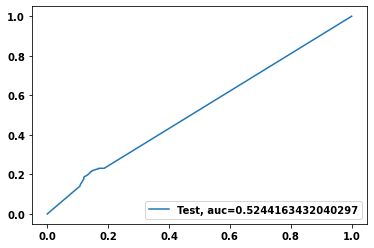

entropy score: 0.8122965641952984
Confusion Matrix


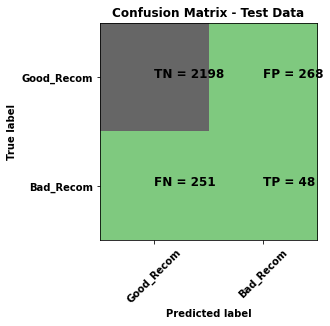

entropy tree_roc_value: 0.5310931002774862
Tree threshold: 0.4
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2466
         1.0       0.15      0.16      0.16       299

    accuracy                           0.81      2765
   macro avg       0.52      0.53      0.53      2765
weighted avg       0.82      0.81      0.81      2765

ROC for the test dataset 53.1%


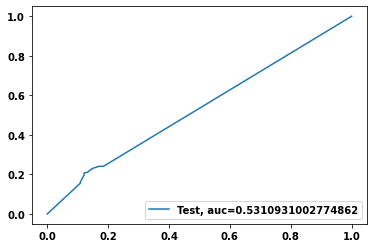

Time Taken by Model: --- 43.070639848709106 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8759493670886076
Confusion Matrix


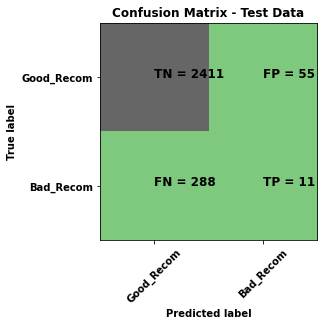

Random Forest roc_value: 0.6178726330265525
Random Forest threshold: 0.11
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      2466
         1.0       0.17      0.04      0.06       299

    accuracy                           0.88      2765
   macro avg       0.53      0.51      0.50      2765
weighted avg       0.81      0.88      0.84      2765

ROC for the test dataset 61.8%


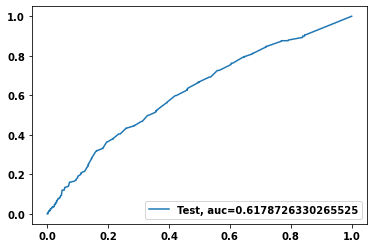

Time Taken by Model: --- 3.762460231781006 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.8886075949367088
Confusion Matrix


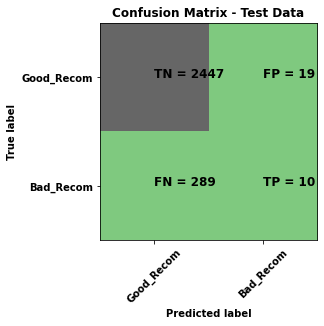

XGboost roc_value: 0.6523427646087119
XGBoost threshold: 0.029964299872517586
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      2466
         1.0       0.34      0.03      0.06       299

    accuracy                           0.89      2765
   macro avg       0.62      0.51      0.50      2765
weighted avg       0.83      0.89      0.85      2765

ROC for the test dataset 65.2%


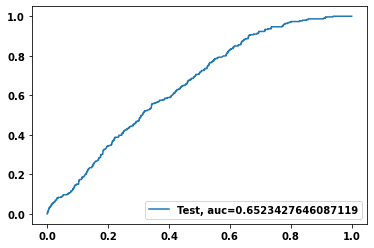

Time Taken by Model: --- 4.058093070983887 seconds ---
--------------------------------------------------------------------------------


In [164]:
Data_Imbalance_Handiling	 = "ENN Undersampling with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_enn, y_train_enn,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_enn, y_train_enn,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_enn, y_train_enn,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_enn, y_train_enn,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_enn, y_train_enn,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [165]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0       SMOTE Oversampling with with Default CV   
1       SMOTE Oversampling with with Default CV   
2       SMOTE Oversampling with with Default CV   
3       SMOTE Oversampling with with Default CV   
4       SMOTE Oversampling with with Default CV   
5       SMOTE Oversampling with with Default CV   
6       SMOTE Oversampling with with Default CV   
7                      Default Cross Validation   
8                      Default Cross Validation   
9                      Default Cross Validation   
10                     Default Cross Validation   
11                     Default Cross Validation   
12                     Default Cross Validation   
13                     Default Cross Validation   
14                     Default Cross Validation   
15          Random Oversampling with Default CV   
16          Random Oversampling with Default CV   
17          Random Oversampling with Default CV   
18          Random Oversampling with Default CV   
19          Random Oversampling with Default CV   
20          Random Oversampling with Default CV   
21          Random Oversampling with Default CV   
22    ADASYN Oversampling with with Default CV    
23    ADASYN Oversampling with with Default CV    
24    ADASYN Oversampling with with Default CV    
25    ADASYN Oversampling with with Default CV    
26    ADASYN Oversampling with with Default CV    
27    ADASYN Oversampling with with Default CV    
28    ADASYN Oversampling with with Default CV    
29          RandomUnderSampler with Default CV    
30          RandomUnderSampler with Default CV    
31          RandomUnderSampler with Default CV    
32          RandomUnderSampler with Default CV    
33          RandomUnderSampler with Default CV    
34          RandomUnderSampler with Default CV    
35          RandomUnderSampler with Default CV    
36  NearMiss V.1 Undersampling with Default CV    
37  NearMiss V.1 Undersampling with Default CV    
38  NearMiss V.1 Undersampling with Default CV    
39  NearMiss V.1 Undersampling with Default CV    
40  NearMiss V.1 Undersampling with Default CV    
41  NearMiss V.1 Undersampling with Default CV    
42  NearMiss V.1 Undersampling with Default CV    
43  NearMiss V.2 Undersampling with Default CV    
44  NearMiss V.2 Undersampling with Default CV    
45  NearMiss V.2 Undersampling with Default CV    
46  NearMiss V.2 Undersampling with Default CV    
47  NearMiss V.2 Undersampling with Default CV    
48  NearMiss V.2 Undersampling with Default CV    
49  NearMiss V.2 Undersampling with Default CV    
50  NearMiss V.3 Undersampling with Default CV    
51  NearMiss V.3 Undersampling with Default CV    
52  NearMiss V.3 Undersampling with Default CV    
53  NearMiss V.3 Undersampling with Default CV    
54  NearMiss V.3 Undersampling with Default CV    
55  NearMiss V.3 Undersampling with Default CV    
56  NearMiss V.3 Undersampling with Default CV    
57           ENN Undersampling with Default CV    
58           ENN Undersampling with Default CV    
59           ENN Undersampling with Default CV    
60           ENN Undersampling with Default CV    
61           ENN Undersampling with Default CV    
62           ENN Undersampling with Default CV    
63           ENN Undersampling with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria  0.789873  0.525731  0.444444  
4             Tree Model with entropy criteria  0.798553  0.532152  0.444444  
5                                Random Forest  0.855335  0.615075  0.121333  
6                                      XGBoost  0.868716  0.645714  0.059383  
7   Logistic Regression with L2 Regularisation  0.891139  0.654981  0.118012  
8   Logis

### Hasil dari ENN Undersampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic Regression with L2 Regularisation " yang telah memberikan hasil terbaik untuk ENN Undersampling method dengan  default CV.

## <a name="p4-10">Undersampling with TomekLink Undersampling</a>

In [166]:
tl = TomekLinks(sampling_strategy='auto',n_jobs=1)
X_train_tl, y_train_tl= tl.fit_resample(X_train_final, y_train)
  
X_train_tl = pd.DataFrame(data=X_train_tl,   columns=X_train_final.columns)

In [167]:
y_train_tl.value_counts()

0.0    9500
1.0    1195
Name: flag, dtype: int64

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6672115378790513
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1.0: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

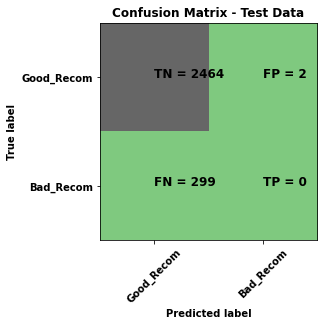

Accuarcy of Logistic model with l1 regularisation : 0.8918625678119348
Confusion Matrix


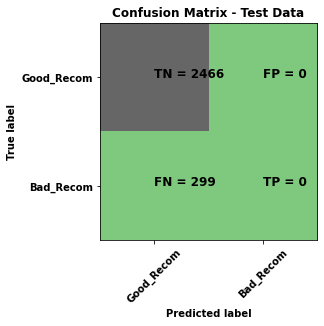

l2 roc_value: 0.6549311438235589
l2 threshold: 0.1256685144493341
classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2466
         1.0       0.00      0.00      0.00       299

    accuracy                           0.89      2765
   macro avg       0.45      0.50      0.47      2765
weighted avg       0.80      0.89      0.84      2765

ROC for the test dataset 65.5%


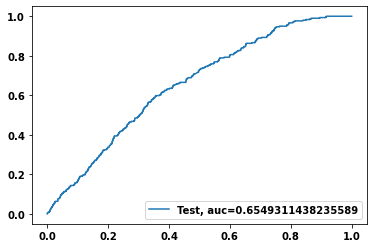

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


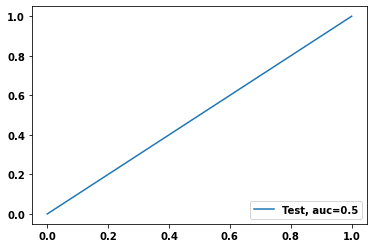

Time Taken by Model: --- 101.10404539108276 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.8737793851717902
Confusion Matrix


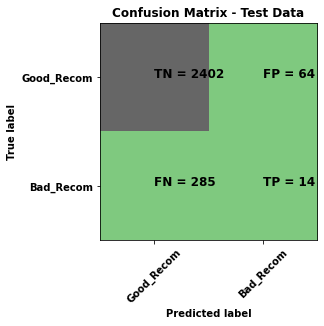

KNN roc_value: 0.5813708577117018
KNN threshold: 0.2
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2466
         1.0       0.18      0.05      0.07       299

    accuracy                           0.87      2765
   macro avg       0.54      0.51      0.50      2765
weighted avg       0.82      0.87      0.84      2765

ROC for the test dataset 58.1%


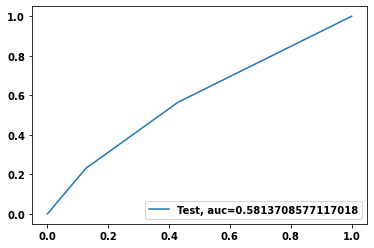

Time Taken by Model: --- 14.050225973129272 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.7967450271247739
Confusion Matrix


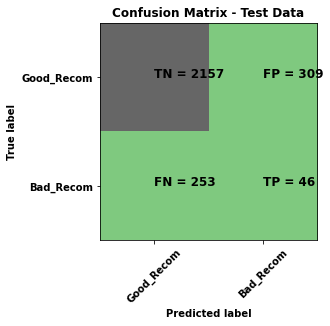

gini tree_roc_value: 0.520028236864162
Tree threshold: 0.2857142857142857
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2466
         1.0       0.13      0.15      0.14       299

    accuracy                           0.80      2765
   macro avg       0.51      0.51      0.51      2765
weighted avg       0.81      0.80      0.80      2765

ROC for the test dataset 52.0%


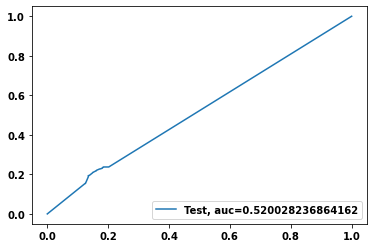

entropy score: 0.813381555153707
Confusion Matrix


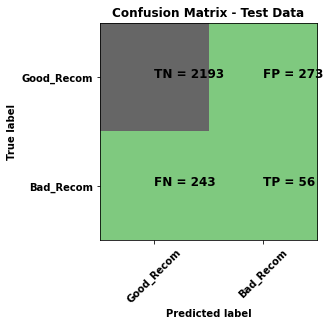

entropy tree_roc_value: 0.5531468778057164
Tree threshold: 0.21428571428571427
classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2466
         1.0       0.17      0.19      0.18       299

    accuracy                           0.81      2765
   macro avg       0.54      0.54      0.54      2765
weighted avg       0.82      0.81      0.82      2765

ROC for the test dataset 55.3%


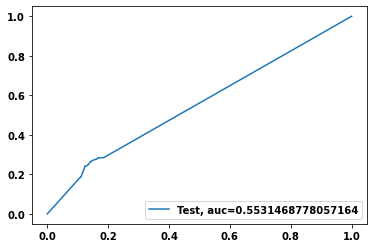

Time Taken by Model: --- 3.807196617126465 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8734177215189873
Confusion Matrix


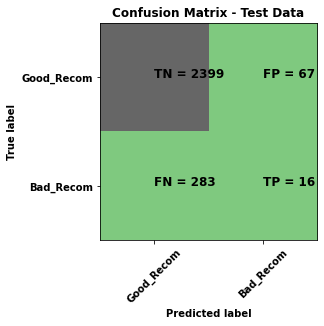

Random Forest roc_value: 0.6217691032829085
Random Forest threshold: 0.09
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2466
         1.0       0.19      0.05      0.08       299

    accuracy                           0.87      2765
   macro avg       0.54      0.51      0.51      2765
weighted avg       0.82      0.87      0.84      2765

ROC for the test dataset 62.2%


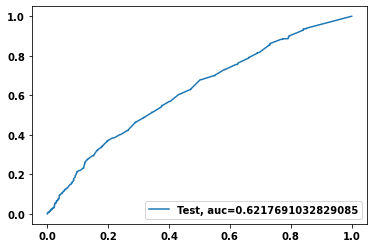

Time Taken by Model: --- 5.257216691970825 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[13:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.8864376130198915
Confusion Matrix


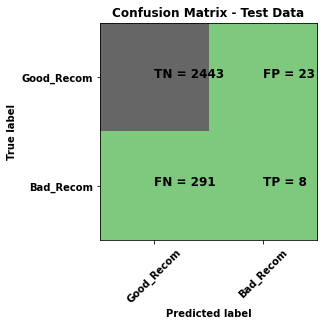

XGboost roc_value: 0.6502975585013033
XGBoost threshold: 0.04792476072907448
classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      2466
         1.0       0.26      0.03      0.05       299

    accuracy                           0.89      2765
   macro avg       0.58      0.51      0.49      2765
weighted avg       0.82      0.89      0.84      2765

ROC for the test dataset 65.0%


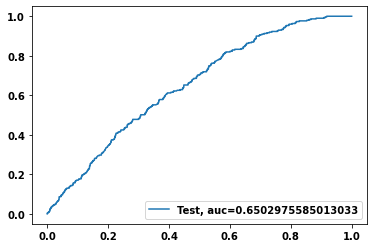

Time Taken by Model: --- 33.35596752166748 seconds ---
--------------------------------------------------------------------------------


In [168]:
Data_Imbalance_Handiling	 = "TomekLink Undersampling with Default CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_tl, y_train_tl,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_tl, y_train_tl,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_tl, y_train_tl,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_tl, y_train_tl,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_tl, y_train_tl,X_test_final,y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [169]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0       SMOTE Oversampling with with Default CV   
1       SMOTE Oversampling with with Default CV   
2       SMOTE Oversampling with with Default CV   
3       SMOTE Oversampling with with Default CV   
4       SMOTE Oversampling with with Default CV   
5       SMOTE Oversampling with with Default CV   
6       SMOTE Oversampling with with Default CV   
7                      Default Cross Validation   
8                      Default Cross Validation   
9                      Default Cross Validation   
10                     Default Cross Validation   
11                     Default Cross Validation   
12                     Default Cross Validation   
13                     Default Cross Validation   
14                     Default Cross Validation   
15          Random Oversampling with Default CV   
16          Random Oversampling with Default CV   
17          Random Oversampling with Default CV   
18          Random Oversampling with Default CV   
19          Random Oversampling with Default CV   
20          Random Oversampling with Default CV   
21          Random Oversampling with Default CV   
22    ADASYN Oversampling with with Default CV    
23    ADASYN Oversampling with with Default CV    
24    ADASYN Oversampling with with Default CV    
25    ADASYN Oversampling with with Default CV    
26    ADASYN Oversampling with with Default CV    
27    ADASYN Oversampling with with Default CV    
28    ADASYN Oversampling with with Default CV    
29          RandomUnderSampler with Default CV    
30          RandomUnderSampler with Default CV    
31          RandomUnderSampler with Default CV    
32          RandomUnderSampler with Default CV    
33          RandomUnderSampler with Default CV    
34          RandomUnderSampler with Default CV    
35          RandomUnderSampler with Default CV    
36  NearMiss V.1 Undersampling with Default CV    
37  NearMiss V.1 Undersampling with Default CV    
38  NearMiss V.1 Undersampling with Default CV    
39  NearMiss V.1 Undersampling with Default CV    
40  NearMiss V.1 Undersampling with Default CV    
41  NearMiss V.1 Undersampling with Default CV    
42  NearMiss V.1 Undersampling with Default CV    
43  NearMiss V.2 Undersampling with Default CV    
44  NearMiss V.2 Undersampling with Default CV    
45  NearMiss V.2 Undersampling with Default CV    
46  NearMiss V.2 Undersampling with Default CV    
47  NearMiss V.2 Undersampling with Default CV    
48  NearMiss V.2 Undersampling with Default CV    
49  NearMiss V.2 Undersampling with Default CV    
50  NearMiss V.3 Undersampling with Default CV    
51  NearMiss V.3 Undersampling with Default CV    
52  NearMiss V.3 Undersampling with Default CV    
53  NearMiss V.3 Undersampling with Default CV    
54  NearMiss V.3 Undersampling with Default CV    
55  NearMiss V.3 Undersampling with Default CV    
56  NearMiss V.3 Undersampling with Default CV    
57           ENN Undersampling with Default CV    
58           ENN Undersampling with Default CV    
59           ENN Undersampling with Default CV    
60           ENN Undersampling with Default CV    
61           ENN Undersampling with Default CV    
62           ENN Undersampling with Default CV    
63           ENN Undersampling with Default CV    
64     TomekLink Undersampling with Default CV    
65     TomekLink Undersampling with Default CV    
66     TomekLink Undersampling with Default CV    
67     TomekLink Undersampling with Default CV    
68     TomekLink Undersampling with Default CV    
69     TomekLink Undersampling with Default CV    
70     TomekLink Undersampling with Default CV    

                                         Model  Accuracy roc_value threshold  
0   Logistic Regression with L2 Regularisation  0.525859  0.655756  0.536067  
1   Logistic Regression with L1 Regularisation  0.891863       0.5       1.5  
2                                          KNN  0.662929  0.587656       0.4  
3                Tree Model with gini criteria 

### Hasil dari TomekLink Undersampling dengan Default CV :
Melihat nilai Akurasi dan ROC, "Logistic Regression with L2 Regularisation " yang telah memberikan hasil terbaik untuk TomekLink Undersampling method dengan  default CV.

### Overall conclusion setelah menjalankan beberapa model dengan Oversampled dan Undersampled data :

setelah running beberapa model dengan beberapa teknik Over dan Under sample, saya memutuskan menggunakan Logistic Regression model dengan penalty L2 karna selain Accu dan ROC value nya, Recall dan FPR model tersebut yang model criterianya yang paling mendekati. jadi, sekarang akan mencoba tunning dengan Hyperparameter untuk mendapatkan hasil terbaik.

## <a name="p5">Hyperparameter Tuning</a>

In [170]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

### Default

In [176]:
clf_def = linear_model.LogisticRegressionCV()
clf_def.fit(X_over, y_over)

#find predicted vallues
y_pred_l2_train = clf_def.predict(X_over)
y_pred_l2_test = clf_def.predict(X_test_final)


#Find predicted probabilities
y_pred_probs_l2_train = clf_def.predict_proba(X_over)[:,1] 
y_pred_probs_l2_test = clf_def.predict_proba(X_test_final)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2_train = metrics.accuracy_score(y_pred=y_pred_l2_train, y_true=y_over)
Accuracy_l2_test = metrics.accuracy_score(y_pred=y_pred_l2_test, y_true=y_test)


print("Train Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2_train))
print("Test Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2_test))

from sklearn.metrics import roc_auc_score

l2_roc_value_train = roc_auc_score(y_over, y_pred_probs_l2_train)
print("l2 roc_value: {0}" .format(l2_roc_value_train))
fpr, tpr, thresholds = metrics.roc_curve(y_over, y_pred_probs_l2_train)
threshold_train_l2 = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold_train_l2))


l2_roc_value_test = roc_auc_score(y_test, y_pred_probs_l2_test)
print("l2 roc_value: {0}" .format(l2_roc_value_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2_test)
threshold_test_l2 = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold_test_l2))


print("classification Report Train")
print(classification_report(y_over, y_pred_l2_train>threshold_train_l2))

print("classification Report Test")
print(classification_report(y_test, y_pred_l2_test>threshold_test_l2))


Train Accuracy of Logistic model with l2 regularisation : 0.5376115166261152
Test Accuracy of Logistic model with l2 regularisation : 0.5580470162748644
l2 roc_value: 0.5960092743879618
l2 threshold: 0.47791567015791897
l2 roc_value: 0.584581749926085
l2 threshold: 0.48564347900599736
classification Report Train
              precision    recall  f1-score   support

         0.0       0.54      0.55      0.54      9864
         1.0       0.54      0.52      0.53      9864

    accuracy                           0.54     19728
   macro avg       0.54      0.54      0.54     19728
weighted avg       0.54      0.54      0.54     19728

classification Report Test
              precision    recall  f1-score   support

         0.0       0.91      0.56      0.69      2466
         1.0       0.13      0.52      0.20       299

    accuracy                           0.56      2765
   macro avg       0.52      0.54      0.45      2765
weighted avg       0.82      0.56      0.64      2765



### After Tunning

In [172]:
num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )
clf.fit(X_over, y_over)

#find predicted vallues
y_pred_l2_train = clf.predict(X_over)
y_pred_l2_test = clf.predict(X_test_final)


#Find predicted probabilities
y_pred_probs_l2_train = clf.predict_proba(X_over)[:,1] 
y_pred_probs_l2_test = clf.predict_proba(X_test_final)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2_train = metrics.accuracy_score(y_pred=y_pred_l2_train, y_true=y_over)
Accuracy_l2_test = metrics.accuracy_score(y_pred=y_pred_l2_test, y_true=y_test)


print("Train Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2_train))
print("Test Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2_test))

from sklearn.metrics import roc_auc_score

l2_roc_value_train = roc_auc_score(y_over, y_pred_probs_l2_train)
print("l2 roc_value: {0}" .format(l2_roc_value_train))
fpr, tpr, thresholds = metrics.roc_curve(y_over, y_pred_probs_l2_train)
threshold_train_l2 = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold_train_l2))


l2_roc_value_test = roc_auc_score(y_test, y_pred_probs_l2_test)
print("l2 roc_value: {0}" .format(l2_roc_value_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2_test)
threshold_test_l2 = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold_test_l2))


print("classification Report Train")
print(classification_report(y_over, y_pred_l2_train>threshold_train_l2))

print("classification Report Test")
print(classification_report(y_test, y_pred_l2_test>threshold_test_l2))


Train Accuracy of Logistic model with l2 regularisation : 0.6195762368207623
Test Accuracy of Logistic model with l2 regularisation : 0.5475587703435805
l2 roc_value: 0.6736924792753218
l2 threshold: 0.49770926161347473
l2 roc_value: 0.6595192951905107
l2 threshold: 0.49267553411724985
classification Report Train
              precision    recall  f1-score   support

         0.0       0.65      0.53      0.58      9864
         1.0       0.60      0.71      0.65      9864

    accuracy                           0.62     19728
   macro avg       0.62      0.62      0.62     19728
weighted avg       0.62      0.62      0.62     19728

classification Report Test
              precision    recall  f1-score   support

         0.0       0.94      0.53      0.68      2466
         1.0       0.15      0.71      0.25       299

    accuracy                           0.55      2765
   macro avg       0.55      0.62      0.46      2765
weighted avg       0.85      0.55      0.63      2765



In [173]:
# Checking for the coefficient values
clf.coef_

array([[ 4.38472469e-05,  5.11322393e-05, -2.56660243e-07,
        -5.88844748e-03, -2.47093335e-02,  4.76525307e-02,
         9.35156851e-03, -1.11047475e-01, -1.99940316e-02,
         1.97964983e-02,  4.77537070e-02,  9.89066470e-03,
        -4.64076759e-03,  2.14942122e-02, -8.31156751e-02,
         1.10711433e-01, -9.14764848e-01,  8.63774417e-01,
        -1.07292298e+00, -1.94504912e+00, -3.43945539e-01,
        -1.54590524e-05,  4.33669603e-01, -2.38608288e+00,
         3.71061870e-01,  3.23701404e-01,  2.28853012e-01,
        -2.97323838e-01, -1.56959032e-01, -1.22627356e-01,
        -3.62002137e-01,  4.04017833e-02]])

In [174]:
# Dataframe untuk nilai koefisien setiap feature.
coefficients = pd.concat([pd.DataFrame(X_over.columns),pd.DataFrame(np.transpose(clf.coef_))],sort=False, axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [175]:
coefficients

Feature  Importance Coefficient
0                      sisauang_tersedia_1BT            4.384725e-05
1                       jumlah_pemasukan_6BT            5.113224e-05
2                      sisauang_tersedia_6BT           -2.566602e-07
3                    frekuensi_pemasukan_2BT           -5.888447e-03
4                  frekuensi_pengeluaran_3BT           -2.470933e-02
5                    frekuensi_pemasukan_1BT            4.765253e-02
6                  frekuensi_pengeluaran_2BT            9.351569e-03
7                  frekuensi_pengeluaran_1BT           -1.110475e-01
8                  frekuensi_pengeluaran_5BT           -1.999403e-02
9                    frekuensi_pemasukan_3BT            1.979650e-02
10                 frekuensi_pengeluaran_4BT            4.775371e-02
11                   frekuensi_pemasukan_5BT            9.890665e-03
12                 frekuensi_pengeluaran_6BT           -4.640768e-03
13                   frekuensi_pemasukan_6BT            2.149421e-02
14                   frekuensi_pemasukan_4BT           -8.311568e-02
15                                      umur            1.107114e-01
16                                    kota_B           -9.147648e-01
17                                    kota_G            8.637744e-01
18                                    kota_N           -1.072923e+00
19  Pekerjaan_Produksi / Operasi / Manufatur           -1.945049e+00
20                             punya_produk6           -3.439455e-01
21                     sisauang_tertahan_6BT           -1.545905e-05
22                             punya_produk2            4.336696e-01
23                                    kota_S           -2.386083e+00
24                                    kota_M            3.710619e-01
25                                    kota_R            3.237014e-01
26                                    kota_X            2.288530e-01
27                             punya_produk3           -2.973238e-01
28                                    kota_L           -1.569590e-01
29                                keluarga_K           -1.226274e-01
30                                    kota_E           -3.620021e-01
31                                  gender_M            4.040178e-02

In [241]:
import joblib

filename = '../Final Project/logreg_l2_ricky.sav'
joblib.dump(clf, filename)

['../Final Project/logreg_l2_ricky.sav']

In [243]:
logreg_model = joblib.load('logreg_l2_ricky.sav')
print(logreg_model.score(X_test_final, y_test))

0.6595192951905107


## <a name="p6">Conclusion</a>

Dalam kasus model diatas dimana datanya imbalance maka dilakukan beberapa teknik sampling untuk mendapatkan model terbaik, dari semua model yang sudah saya buat, ditemukan bahwa model Logistic Regression dengan penalty L2 Random Oversampling CV memberikan akurasi dan ROC terbaik pada model diatas dan juga paling mendekati model sucess criteria. dibawah ini merupakan hasil hyperparameter tunning dan mendapatkan metrik di bawah ini : 

* Test Accuracy of Logistic model with l2 regularisation : 0.5475587703435805
* l2 roc_value: 0.6595192951905107
* l2 threshold: 0.49267553411724985

dari beberapa model yang sudah saya buat banyak juga yang hasilnya bagus, dengan accuracy lebih tinggi, tapi untuk kasus data imbalance dari beberapa sumber yang saya cari bahwa Accuracy tidak bisa dijadikan patokan untuk data imbalance. yang bisa dijadikan patokan adalah F1-score, precision, dan recall.

Dari hasil pertimbangan tersebut, model Logistic Regression dengan penalty L2 Random Oversampling CV yang paling idel hasilnya menurut saya.


Memang bila kita melihat dari model sucess criteria, hanya 1 yang terpenuhi yaitu dibagian recall nya saja, sedangkan FPR masih kurang 0.17, saya sudah berusaha untuk membuat modelnya dengan beberapa kali modifikasi juga, dan ini hasil terbaik yang bisa saya dapatkan. tapi bila kita melihat kembali, dari tujuan utama pembuatan model ini yaitu memprediksi semaksimal mungkin siapa saja yang jika ditawarkan produk 7 maka flag 'good' atau label 1.0, bukan memprediksi flag 'bad'  atau label 0.0, soalnya perusahaan dapat revenue dari penjualan produk 7 yang 'laku'. oleh karna itu, model yang kita buat itu harus bisa mengcapture customer semaksimal mungkin bila ditawarkan produk 7 maka flag nya '1.0', dengan goals ini makanya kita perbesar recallnya, supaya peluang mengabaikan toko yang sebenarnya berpotensi (FPR) bisa kita perkecil. 

Memang di sisi lain FPR juga jadi pertimbangan karna FPR merupakan patokan untuk cost penawaran yang kita lakukan. Karna kalo FPR besar artinya ada toko - toko yang sebenarnya tidak berpotensi, tapi malah kita tawarkan produk kita tadi dan ujung - ujungnya mereka tidak beli (flag 'bad'), dan kita rugi di cost nya. jadi kenapa saya lebih mengutamakan Recall dibanding FPR nya, karna saya berasumsi untuk cost penawarannya mungkin kecil/murah (menggunakan telpon maybe, yang biayanya relatif kecil bila dibanding iklan - iklan lain), jadi misal setelah kita tawarkan produknya, ujung - ujungnya mereka tidak beli, jadi rugi di cost penawarannya juga tidak terlalu besar/bisa diminimalisir. 

### Selanjutnya, saya mencoba backtesting model untuk prediksi sesuai kebutuhan Business Understanding yang sudah dijelaskan diatas.

## <a name="p7">Backtesting Model</a>

In [178]:
df_backtest = pd.read_csv('backtestset.csv')
df_backtest

kode pelanggan  umur kota gender  education keluarga  \
0           MLAD727  31.0    X      M        NaN        B   
1           PFX6589   7.0    R    NaN        NaN      NaN   
2           SLZ0654  62.0    H      M        NaN        K   
3           FG33624  41.0    H      M        NaN        K   
4           PEH8457  30.0    K      F        NaN        J   
...             ...   ...  ...    ...        ...      ...   
3451        JFN9399  64.0    F      M        NaN        K   
3452        ASN3636  33.0    R      M        NaN        B   
3453        ATN3137  38.0    N      M        NaN        B   
3454        JL75730   8.0    I    NaN        NaN      NaN   
3455        PFF7472   3.0    R    NaN        NaN      NaN   

                  Pekerjaan Penanggung                       Usaha  \
0             Usaha Mandiri        NaN                         NaN   
1                       NaN        NaN        Jasa Kegiatan Sosial   
2                  Pedagang        NaN                         NaN   
3             Usaha Mandiri        NaN                         NaN   
4             Usaha Mandiri        NaN                         NaN   
...                     ...        ...                         ...   
3451          Usaha Mandiri        NaN                         NaN   
3452          Usaha Mandiri        NaN                         NaN   
3453  Karyawan Usaha Negara        NaN                         NaN   
3454                    NaN        NaN            Jasa Real Estate   
3455                    NaN        NaN  Distribusi Alat Elektronik   

      punya_produk1  ...  frekuensi_pengeluaran_4BT  \
0               0.0  ...                        3.0   
1               0.0  ...                        0.0   
2               0.0  ...                      539.0   
3               1.0  ...                      361.0   
4               1.0  ...                       44.0   
...             ...  ...                        ...   
3451            0.0  ...                        0.0   
3452            0.0  ...                       45.0   
3453            1.0  ...                        4.0   
3454            0.0  ...                        1.0   
3455            0.0  ...                        0.0   

      frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                           2.0                        4.0   
1                           0.0                        0.0   
2                         618.0                      620.0   
3                         444.0                      647.0   
4                          55.0                       62.0   
...                         ...                        ...   
3451                        0.0                        0.0   
3452                       34.0                        7.0   
3453                        4.0                        3.0   
3454                        1.0                        1.0   
3455                        0.0                        0.0   

      frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  \
0                         0.0                      0.0   
1                        14.0                      0.0   
2                       732.0                    905.0   
3                       132.0                    128.0   
4                        23.0                     19.0   
...                       ...                      ...   
3451                      0.0                      0.0   
3452                    117.0                     94.0   
3453                      3.0                      3.0   
3454                      2.0                      2.0   
3455                      0.0                      0.0   

     frekuensi_pemasukan_3BT  frekuensi_pemasukan_4BT  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                      814.0                    826.0   
3                      103.0                    104.0   
4                       38.0               

In [179]:
df_backtest.isna().sum()/len(df_backtest)*100

kode pelanggan                     0.000000
umur                               1.620370
kota                               1.620370
gender                            17.708333
education                        100.000000
keluarga                          18.026620
Pekerjaan                         22.974537
Penanggung                        91.898148
Usaha                             86.834491
punya_produk1                      1.620370
punya_produk2                      1.620370
punya_produk3                      1.620370
punya_produk4                      1.620370
punya_produk5                      1.620370
punya_produk6                      1.620370
jualan                            65.856481
omset                            100.000000
penghasilan                      100.000000
average_sisauang_mingguan_1BT      0.000000
average_sisauang_mingguan_2BT      0.000000
average_sisauang_mingguan_3BT      0.000000
average_sisauang_mingguan_4BT      0.000000
average_sisauang_mingguan_5BT   

In [180]:
df_backtest = df_backtest.drop(['kode pelanggan','education','Penanggung','Usaha','jualan','omset','penghasilan'], axis=1)
df_backtest

umur kota gender keluarga              Pekerjaan  punya_produk1  \
0     31.0    X      M        B          Usaha Mandiri            0.0   
1      7.0    R    NaN      NaN                    NaN            0.0   
2     62.0    H      M        K               Pedagang            0.0   
3     41.0    H      M        K          Usaha Mandiri            1.0   
4     30.0    K      F        J          Usaha Mandiri            1.0   
...    ...  ...    ...      ...                    ...            ...   
3451  64.0    F      M        K          Usaha Mandiri            0.0   
3452  33.0    R      M        B          Usaha Mandiri            0.0   
3453  38.0    N      M        B  Karyawan Usaha Negara            1.0   
3454   8.0    I    NaN      NaN                    NaN            0.0   
3455   3.0    R    NaN      NaN                    NaN            0.0   

      punya_produk2  punya_produk3  punya_produk4  punya_produk5  ...  \
0               0.0            1.0            0.0            0.0  ...   
1               1.0            1.0            1.0            0.0  ...   
2               1.0            1.0            0.0            0.0  ...   
3               1.0            1.0            0.0            0.0  ...   
4               1.0            1.0            0.0            0.0  ...   
...             ...            ...            ...            ...  ...   
3451            0.0            0.0            1.0            0.0  ...   
3452            1.0            1.0            0.0            1.0  ...   
3453            1.0            1.0            0.0            0.0  ...   
3454            0.0            0.0            1.0            1.0  ...   
3455            0.0            1.0            0.0            0.0  ...   

      frekuensi_pengeluaran_4BT  frekuensi_pengeluaran_5BT  \
0                           3.0                        2.0   
1                           0.0                        0.0   
2                         539.0                      618.0   
3                         361.0                      444.0   
4                          44.0                       55.0   
...                         ...                        ...   
3451                        0.0                        0.0   
3452                       45.0                       34.0   
3453                        4.0                        4.0   
3454                        1.0                        1.0   
3455                        0.0                        0.0   

      frekuensi_pengeluaran_6BT  frekuensi_pemasukan_1BT  \
0                           4.0                      0.0   
1                           0.0                     14.0   
2                         620.0                    732.0   
3                         647.0                    132.0   
4                          62.0                     23.0   
...                         ...                      ...   
3451                        0.0                      0.0   
3452                        7.0                    117.0   
3453                        3.0                      3.0   
3454                        1.0                      2.0   
3455                        0.0                      0.0   

      frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                       905.0                    814.0   
3                       128.0                    103.0   
4                        19.0                     38.0   
...                       ...                      ...   
3451                      0.0                      0.0   
3452                     94.0                     60.0   
3453                      3.0                     10.0   
3454                      2.0                      4.0   
3455                      0.0                      0.0   

      frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  \
0                         0.0  

In [181]:
df_backtest_cat = df_backtest.select_dtypes(exclude=np.number)
df_backtest_num = df_backtest.select_dtypes(include=np.number)

In [182]:
df_backtest_num.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0  31.0            0.0            0.0            1.0            0.0   
1   7.0            0.0            1.0            1.0            1.0   
2  62.0            0.0            1.0            1.0            0.0   
3  41.0            1.0            1.0            1.0            0.0   
4  30.0            1.0            1.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            1.0                       0.000000   
1            0.0            0.0                   18364.940200   
2            0.0            1.0                       0.000000   
3            0.0            0.0                    2344.958532   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       0.000000                       0.000000  ...   
2                       0.000000                       0.000000  ...   
3                     561.904165                     534.328365  ...   
4                       0.000000                       0.000000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        0.0                        3.0   
1                        0.0                        0.0   
2                      497.0                      539.0   
3                      390.0                      361.0   
4                       54.0                       44.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        2.0                        4.0   
1                        0.0                        0.0   
2                      618.0                      620.0   
3                      444.0                      647.0   
4                       55.0                       62.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                     14.0                      0.0                      0.0   
2                    732.0                    905.0                    814.0   
3                    132.0                    128.0                    103.0   
4                     23.0                     19.0                     38.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                    826.0                    829.0                    808.0  
3                    104.0                    123.0                    131.0  
4                     27.0                     28.0                      5.0  

[5 rows x 67 columns]

In [183]:
df_backtest_cat.head()

kota gender keluarga      Pekerjaan        tgl data
0    X      M        B  Usaha Mandiri  04/08/23 14.17
1    R    NaN      NaN            NaN  04/08/23 14.17
2    H      M        K       Pedagang  04/08/23 14.17
3    H      M        K  Usaha Mandiri  04/08/23 14.17
4    K      F        J  Usaha Mandiri  04/08/23 14.17

In [184]:
df_backtest_num2 = df_backtest_num.copy()
df_backtest_cat2 = df_backtest_cat.copy()

In [185]:
df_backtest_num2_knn = imputer_KNN.transform(df_backtest_num2)

In [186]:
df_backtest_num2_knn = pd.DataFrame(df_backtest_num2_knn)
df_backtest_num2_knn.columns = df_backtest_num2.columns

In [187]:
df_backtest_num2_knn.isna().sum()

umur                             0
punya_produk1                    0
punya_produk2                    0
punya_produk3                    0
punya_produk4                    0
punya_produk5                    0
punya_produk6                    0
average_sisauang_mingguan_1BT    0
average_sisauang_mingguan_2BT    0
average_sisauang_mingguan_3BT    0
average_sisauang_mingguan_4BT    0
average_sisauang_mingguan_5BT    0
average_sisauang_mingguan_6BT    0
sisauang_akhir_1BT               0
sisauang_akhir_2BT               0
sisauang_akhir_3BT               0
sisauang_akhir_4BT               0
sisauang_akhir_5BT               0
sisauang_akhir_6BT               0
sisauang_tertahan_1BT            0
sisauang_tertahan_2BT            0
sisauang_tertahan_3BT            0
sisauang_tertahan_4BT            0
sisauang_tertahan_5BT            0
sisauang_tertahan_6BT            0
sisauang_tersedia_1BT            0
sisauang_tersedia_2BT            0
sisauang_tersedia_3BT            0
sisauang_tersedia_4B

In [188]:
df_backtest_num2_knn.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0  31.0            0.0            0.0            1.0            0.0   
1   7.0            0.0            1.0            1.0            1.0   
2  62.0            0.0            1.0            1.0            0.0   
3  41.0            1.0            1.0            1.0            0.0   
4  30.0            1.0            1.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            1.0                       0.000000   
1            0.0            0.0                   18364.940200   
2            0.0            1.0                       0.000000   
3            0.0            0.0                    2344.958532   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                       0.000000  ...   
1                       0.000000                       0.000000  ...   
2                       0.000000                       0.000000  ...   
3                     561.904165                     534.328365  ...   
4                       0.000000                       0.000000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        0.0                        3.0   
1                        0.0                        0.0   
2                      497.0                      539.0   
3                      390.0                      361.0   
4                       54.0                       44.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        2.0                        4.0   
1                        0.0                        0.0   
2                      618.0                      620.0   
3                      444.0                      647.0   
4                       55.0                       62.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                     14.0                      0.0                      0.0   
2                    732.0                    905.0                    814.0   
3                    132.0                    128.0                    103.0   
4                     23.0                     19.0                     38.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                    826.0                    829.0                    808.0  
3                    104.0                    123.0                    131.0  
4                     27.0                     28.0                      5.0  

[5 rows x 67 columns]

In [189]:
df_backtest_num2_knn=round(df_backtest_num2_knn)
df_backtest_num2_knn.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0  31.0            0.0            0.0            1.0            0.0   
1   7.0            0.0            1.0            1.0            1.0   
2  62.0            0.0            1.0            1.0            0.0   
3  41.0            1.0            1.0            1.0            0.0   
4  30.0            1.0            1.0            1.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            1.0                            0.0   
1            0.0            0.0                        18365.0   
2            0.0            1.0                            0.0   
3            0.0            0.0                         2345.0   
4            0.0            1.0                            0.0   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                            0.0                            0.0  ...   
1                            0.0                            0.0  ...   
2                            0.0                            0.0  ...   
3                          562.0                          534.0  ...   
4                            0.0                            0.0  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                        0.0                        3.0   
1                        0.0                        0.0   
2                      497.0                      539.0   
3                      390.0                      361.0   
4                       54.0                       44.0   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                        2.0                        4.0   
1                        0.0                        0.0   
2                      618.0                      620.0   
3                      444.0                      647.0   
4                       55.0                       62.0   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                      0.0                      0.0                      0.0   
1                     14.0                      0.0                      0.0   
2                    732.0                    905.0                    814.0   
3                    132.0                    128.0                    103.0   
4                     23.0                     19.0                     38.0   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                    826.0                    829.0                    808.0  
3                    104.0                    123.0                    131.0  
4                     27.0                     28.0                      5.0  

[5 rows x 67 columns]

In [190]:
df_backtest_cat2_enc = ordinal_encode.transform(df_backtest_cat2)

In [191]:
df_backtest_cat2_enc = pd.DataFrame(df_backtest_cat2_enc)

In [192]:
df_backtest_cat2_enc.head()

0    1    2     3    4
0  18.0  1.0  0.0  29.0  0.0
1  16.0  NaN  NaN   NaN  0.0
2   6.0  1.0  3.0  15.0  0.0
3   6.0  1.0  3.0  29.0  0.0
4   9.0  0.0  2.0  29.0  0.0

In [193]:
df_backtest_cat2_enc.columns = df_backtest_cat2.columns

In [194]:
df_backtest_cat2_enc.head()

kota  gender  keluarga  Pekerjaan  tgl data
0  18.0     1.0       0.0       29.0       0.0
1  16.0     NaN       NaN        NaN       0.0
2   6.0     1.0       3.0       15.0       0.0
3   6.0     1.0       3.0       29.0       0.0
4   9.0     0.0       2.0       29.0       0.0

In [195]:
df_backtest_cat2_knn = imputer_KNN_cat.transform(df_backtest_cat2_enc)

In [196]:
df_backtest_cat2_knn = pd.DataFrame(df_backtest_cat2_knn)
df_backtest_cat2_knn.columns = df_backtest_cat2_enc.columns

In [197]:
df_backtest_cat2_knn.isna().sum()

kota         0
gender       0
keluarga     0
Pekerjaan    0
tgl data     0
dtype: int64

In [198]:
df_backtest_cat2_knn.head()

kota  gender  keluarga  Pekerjaan  tgl data
0  18.0     1.0       0.0       29.0       0.0
1  16.0     0.2       1.2       21.8       0.0
2   6.0     1.0       3.0       15.0       0.0
3   6.0     1.0       3.0       29.0       0.0
4   9.0     0.0       2.0       29.0       0.0

In [199]:
df_backtest_cat2_knn = round(df_backtest_cat2_knn)
df_backtest_cat2_knn.head()

kota  gender  keluarga  Pekerjaan  tgl data
0  18.0     1.0       0.0       29.0       0.0
1  16.0     0.0       1.0       22.0       0.0
2   6.0     1.0       3.0       15.0       0.0
3   6.0     1.0       3.0       29.0       0.0
4   9.0     0.0       2.0       29.0       0.0

In [200]:
df_backtest_cat2_knn = ordinal_encode.inverse_transform(df_backtest_cat2_knn)
df_backtest_cat2_knn = pd.DataFrame(df_backtest_cat2_knn)
df_backtest_cat2_knn.columns = df_backtest_cat2_enc.columns
df_backtest_cat2_knn.head()

kota gender keluarga      Pekerjaan        tgl data
0    X      M        B  Usaha Mandiri  04/08/23 14.17
1    R      F        D      Pensiunan  04/08/23 14.17
2    H      M        K       Pedagang  04/08/23 14.17
3    H      M        K  Usaha Mandiri  04/08/23 14.17
4    K      F        J  Usaha Mandiri  04/08/23 14.17

In [201]:
df_backtest_cat2_knn2 = df_backtest_cat2_knn.copy()

In [202]:
df_backtest_ohe = pd.DataFrame(ohe.transform(df_backtest_cat2_knn2).toarray())
df_backtest_ohe.columns = ohe.get_feature_names_out(df_backtest_cat2_knn2.columns)
df_backtest_ohe.head()

kota_B  kota_C  kota_D  kota_E  kota_F  kota_G  kota_H  kota_I  kota_J  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   kota_K  ...  Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja  \
0     0.0  ...                                               0.0   
1     0.0  ...                                               0.0   
2     0.0  ...                                               0.0   
3     0.0  ...                                               0.0   
4     1.0  ...                                               0.0   

   Pekerjaan_Pensiunan  Pekerjaan_Produksi / Operasi / Manufatur  \
0                  0.0                                       0.0   
1                  1.0                                       0.0   
2                  0.0                                       0.0   
3                  0.0                                       0.0   
4                  0.0                                       0.0   

   Pekerjaan_Riset & Pengembangan  Pekerjaan_Sales / Marketing / Promosi  \
0                             0.0                                    0.0   
1                             0.0                                    0.0   
2                             0.0                                    0.0   
3                             0.0                                    0.0   
4                             0.0                                    0.0   

   Pekerjaan_Seniman  Pekerjaan_Service / Customer Support / Layanan  \
0                0.0                                             0.0   
1                0.0                                             0.0   
2                0.0                                             0.0   
3                0.0                                             0.0   
4                0.0                                             0.0   

   Pekerjaan_Technical / Engineering-lainnya  Pekerjaan_Usaha Mandiri  \
0                                        0.0                      1.0   
1                                        0.0                      0.0   
2                                        0.0                      0.0   
3                                        0.0                      1.0   
4                                        0.0                      1.0   

   tgl data_04/08/23 14.17  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  

[5 rows x 56 columns]

In [203]:
df_backtest_scal = pd.DataFrame(rscaler.transform(df_backtest_num2_knn), index = df_backtest.index, columns = df_backtest_num2.columns)

In [204]:
df_backtest_scal.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -0.352941            0.0           -1.0            0.0            0.0   
1 -1.764706            0.0            0.0            0.0            1.0   
2  1.470588            0.0            0.0            0.0            0.0   
3  0.235294            1.0            0.0            0.0            0.0   
4 -0.411765            1.0            0.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            1.0                       0.000000   
1            0.0            0.0                      10.393322   
2            0.0            1.0                       0.000000   
3            0.0            0.0                       1.327108   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                        0.00000  ...   
1                       0.000000                        0.00000  ...   
2                       0.000000                        0.00000  ...   
3                       0.502459                        0.78703  ...   
4                       0.000000                        0.00000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                  -0.074074                       0.12   
1                  -0.074074                       0.00   
2                  18.333333                      21.56   
3                  14.370370                      14.44   
4                   1.925926                       1.76   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                   0.086957                   0.190476   
1                   0.000000                   0.000000   
2                  26.869565                  29.523810   
3                  19.304348                  30.809524   
4                   2.391304                   2.952381   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                    -0.08                -0.045455                 0.000000   
1                     0.48                -0.045455                 0.000000   
2                    29.20                41.090909                42.842105   
3                     5.20                 5.772727                 5.421053   
4                     0.84                 0.818182                 2.000000   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                 0.000000                   0.0000                 0.000000  
1                 0.000000                   0.0000                 0.000000  
2                48.588235                  51.8125                57.714286  
3                 6.117647                   7.6875                 9.357143  
4                 1.588235                   1.7500                 0.357143  

[5 rows x 67 columns]

In [205]:
df_backtest_scal.reset_index(drop=True, inplace=True)

In [206]:
df_backtest_scal.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -0.352941            0.0           -1.0            0.0            0.0   
1 -1.764706            0.0            0.0            0.0            1.0   
2  1.470588            0.0            0.0            0.0            0.0   
3  0.235294            1.0            0.0            0.0            0.0   
4 -0.411765            1.0            0.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            1.0                       0.000000   
1            0.0            0.0                      10.393322   
2            0.0            1.0                       0.000000   
3            0.0            0.0                       1.327108   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                        0.00000  ...   
1                       0.000000                        0.00000  ...   
2                       0.000000                        0.00000  ...   
3                       0.502459                        0.78703  ...   
4                       0.000000                        0.00000  ...   

   frekuensi_pengeluaran_3BT  frekuensi_pengeluaran_4BT  \
0                  -0.074074                       0.12   
1                  -0.074074                       0.00   
2                  18.333333                      21.56   
3                  14.370370                      14.44   
4                   1.925926                       1.76   

   frekuensi_pengeluaran_5BT  frekuensi_pengeluaran_6BT  \
0                   0.086957                   0.190476   
1                   0.000000                   0.000000   
2                  26.869565                  29.523810   
3                  19.304348                  30.809524   
4                   2.391304                   2.952381   

   frekuensi_pemasukan_1BT  frekuensi_pemasukan_2BT  frekuensi_pemasukan_3BT  \
0                    -0.08                -0.045455                 0.000000   
1                     0.48                -0.045455                 0.000000   
2                    29.20                41.090909                42.842105   
3                     5.20                 5.772727                 5.421053   
4                     0.84                 0.818182                 2.000000   

   frekuensi_pemasukan_4BT  frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT  
0                 0.000000                   0.0000                 0.000000  
1                 0.000000                   0.0000                 0.000000  
2                48.588235                  51.8125                57.714286  
3                 6.117647                   7.6875                 9.357143  
4                 1.588235                   1.7500                 0.357143  

[5 rows x 67 columns]

In [207]:
df_backtest_rbs = pd.concat([df_backtest_scal,df_backtest_ohe], axis = 1)
df_backtest_rbs.head()

umur  punya_produk1  punya_produk2  punya_produk3  punya_produk4  \
0 -0.352941            0.0           -1.0            0.0            0.0   
1 -1.764706            0.0            0.0            0.0            1.0   
2  1.470588            0.0            0.0            0.0            0.0   
3  0.235294            1.0            0.0            0.0            0.0   
4 -0.411765            1.0            0.0            0.0            0.0   

   punya_produk5  punya_produk6  average_sisauang_mingguan_1BT  \
0            0.0            1.0                       0.000000   
1            0.0            0.0                      10.393322   
2            0.0            1.0                       0.000000   
3            0.0            0.0                       1.327108   
4            0.0            1.0                       0.000000   

   average_sisauang_mingguan_2BT  average_sisauang_mingguan_3BT  ...  \
0                       0.000000                        0.00000  ...   
1                       0.000000                        0.00000  ...   
2                       0.000000                        0.00000  ...   
3                       0.502459                        0.78703  ...   
4                       0.000000                        0.00000  ...   

   Pekerjaan_Penganggur/Belum Bekerja/Pencari Kerja  Pekerjaan_Pensiunan  \
0                                               0.0                  0.0   
1                                               0.0                  1.0   
2                                               0.0                  0.0   
3                                               0.0                  0.0   
4                                               0.0                  0.0   

   Pekerjaan_Produksi / Operasi / Manufatur  Pekerjaan_Riset & Pengembangan  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   

   Pekerjaan_Sales / Marketing / Promosi  Pekerjaan_Seniman  \
0                                    0.0                0.0   
1                                    0.0                0.0   
2                                    0.0                0.0   
3                                    0.0                0.0   
4                                    0.0                0.0   

   Pekerjaan_Service / Customer Support / Layanan  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Pekerjaan_Technical / Engineering-lainnya  Pekerjaan_Usaha Mandiri  \
0                                        0.0                      1.0   
1                                        0.0                      0.0   
2                                        0.0                      0.0   
3                                        0.0                      1.0   
4                                        0.0                      1.0   

   tgl data_04/08/23 14.17  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  

[5 rows x 123 columns]

In [208]:
df_backtest_rbs2 = df_backtest_rbs[preselected_features]
df_backtest_rbs2.head()

jumlah_pemasukan_1BT  jumlah_pengeluaran_1BT  jumlah_pemasukan_2BT  \
0              0.000000                0.000000              0.000000   
1             23.636774               22.961591              0.000000   
2              5.635305                5.718476              7.669734   
3              7.652402                7.624670              6.416982   
4              0.000000                0.000000              0.000000   

   jumlah_pengeluaran_2BT  average_sisauang_mingguan_1BT  \
0                0.000000                       0.000000   
1                0.000000                      10.393322   
2                7.937297                       0.000000   
3                6.601970                       1.327108   
4                0.000000                       0.000000   

   jumlah_pemasukan_3BT  sisauang_akhir_1BT  jumlah_pengeluaran_3BT  \
0              0.000000            0.000000                0.000000   
1              0.000000            4.234035                0.000000   
2              6.750980            0.000000                7.072350   
3              6.024872            1.815446                6.027996   
4              0.000000            0.000000                0.016672   

   jumlah_pemasukan_4BT  jumlah_pengeluaran_4BT  ...  kota_E  \
0              0.000000                0.000000  ...     0.0   
1              0.000000                0.000000  ...     0.0   
2              8.377257                8.555921  ...     0.0   
3              6.750047                7.033581  ...     0.0   
4              0.227806                0.741228  ...     0.0   

   Pekerjaan_Dokter  kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0               0.0     0.0            0.0         0.0                 0.0   
1               0.0     0.0            0.0         0.0                 0.0   
2               0.0     0.0            0.0         0.0                 0.0   
3               0.0     0.0            0.0         0.0                 0.0   
4               0.0     0.0            0.0         1.0                 0.0   

   Pekerjaan_Militer (POLRI)  gender_F  gender_M  Pekerjaan_Notaris  
0                        0.0       0.0       1.0                0.0  
1                        0.0       1.0       0.0                0.0  
2                        0.0       0.0       1.0                0.0  
3                        0.0       0.0       1.0                0.0  
4                        0.0       1.0       0.0                0.0  

[5 rows x 90 columns]

In [209]:
df_backtest_woe = woe.transform(df_backtest_rbs2)

In [210]:
df_backtest_rbs3 = df_backtest_rbs2.drop(linear_columns, axis=1)

In [211]:
df_backtest_rbs3.head()

sisauang_tersedia_1BT  jumlah_pemasukan_6BT  sisauang_tersedia_6BT  \
0               0.000000              0.000000                    0.0   
1               5.838635              0.000000                    0.0   
2               0.000000             13.397797                    0.0   
3               2.503458             16.064655                  603.0   
4               0.000000              0.840509                    0.0   

   sisa_hutang_5BT  frekuensi_pemasukan_2BT  frekuensi_pengeluaran_3BT  \
0          22708.0                -0.045455                  -0.074074   
1              0.0                -0.045455                  -0.074074   
2             51.0                41.090909                  18.333333   
3              0.0                 5.772727                  14.370370   
4           1961.0                 0.818182                   1.925926   

   frekuensi_pemasukan_1BT  frekuensi_pengeluaran_2BT  \
0                    -0.08                  -0.064516   
1                     0.48                  -0.096774   
2                    29.20                  18.096774   
3                     5.20                  17.161290   
4                     0.84                   1.225806   

   frekuensi_pengeluaran_1BT  frekuensi_pengeluaran_5BT  ...  kota_D  kota_E  \
0                  -0.085714                   0.086957  ...     0.0     0.0   
1                   0.114286                   0.000000  ...     0.0     0.0   
2                  14.685714                  26.869565  ...     0.0     0.0   
3                  15.257143                  19.304348  ...     0.0     0.0   
4                   0.828571                   2.391304  ...     0.0     0.0   

   Pekerjaan_Dokter  kota_I  punya_produk5  keluarga_J  Pekerjaan_Pendidik  \
0               0.0     0.0            0.0         0.0                 0.0   
1               0.0     0.0            0.0         0.0                 0.0   
2               0.0     0.0            0.0         0.0                 0.0   
3               0.0     0.0            0.0         0.0                 0.0   
4               0.0     0.0            0.0         1.0                 0.0   

   Pekerjaan_Militer (POLRI)  gender_M  Pekerjaan_Notaris  
0                        0.0       1.0                0.0  
1                        0.0       0.0                0.0  
2                        0.0       1.0                0.0  
3                        0.0       1.0                0.0  
4                        0.0       0.0                0.0  

[5 rows x 51 columns]

In [212]:
kbest.transform(df_backtest_rbs3)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.83863532e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.33977972e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.73911480e+02, 2.69947075e+00, 1.86468000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [213]:
df_backtest_rbs3.columns[kbest.get_support()]

Index(['sisauang_tersedia_1BT', 'jumlah_pemasukan_6BT',
       'sisauang_tersedia_6BT', 'frekuensi_pemasukan_2BT',
       'frekuensi_pengeluaran_3BT', 'frekuensi_pemasukan_1BT',
       'frekuensi_pengeluaran_2BT', 'frekuensi_pengeluaran_1BT',
       'frekuensi_pengeluaran_5BT', 'frekuensi_pemasukan_3BT',
       'frekuensi_pengeluaran_4BT', 'frekuensi_pemasukan_5BT',
       'frekuensi_pengeluaran_6BT', 'frekuensi_pemasukan_6BT',
       'frekuensi_pemasukan_4BT', 'umur', 'kota_B', 'kota_G', 'kota_N',
       'Pekerjaan_Produksi / Operasi / Manufatur', 'punya_produk6',
       'sisauang_tertahan_6BT', 'punya_produk2', 'kota_S', 'kota_M', 'kota_R',
       'kota_X', 'punya_produk3', 'kota_L', 'keluarga_K', 'kota_E',
       'gender_M'],
      dtype='object')

In [214]:
df_backtest_final = df_backtest_rbs3[df_backtest_rbs3.columns[kbest.get_support()]]

In [215]:
df_backtest_final

sisauang_tersedia_1BT  jumlah_pemasukan_6BT  sisauang_tersedia_6BT  \
0                  0.000000              0.000000                    0.0   
1                  5.838635              0.000000                    0.0   
2                  0.000000             13.397797                    0.0   
3                  2.503458             16.064655                  603.0   
4                  0.000000              0.840509                    0.0   
...                     ...                   ...                    ...   
3451               0.000000              0.000000                    0.0   
3452               0.000000              1.707338                 5816.0   
3453               0.000000              0.000000                    0.0   
3454             373.911480              2.699471               186468.0   
3455               0.000000              0.000000                    0.0   

      frekuensi_pemasukan_2BT  frekuensi_pengeluaran_3BT  \
0                   -0.045455                  -0.074074   
1                   -0.045455                  -0.074074   
2                   41.090909                  18.333333   
3                    5.772727                  14.370370   
4                    0.818182                   1.925926   
...                       ...                        ...   
3451                -0.045455                  -0.074074   
3452                 4.227273                   4.074074   
3453                 0.090909                   0.592593   
3454                 0.045455                  -0.037037   
3455                -0.045455                  -0.074074   

      frekuensi_pemasukan_1BT  frekuensi_pengeluaran_2BT  \
0                       -0.08                  -0.064516   
1                        0.48                  -0.096774   
2                       29.20                  18.096774   
3                        5.20                  17.161290   
4                        0.84                   1.225806   
...                       ...                        ...   
3451                    -0.08                  -0.096774   
3452                     4.60                   6.870968   
3453                     0.04                   0.064516   
3454                     0.00                  -0.064516   
3455                    -0.08                  -0.096774   

      frekuensi_pengeluaran_1BT  frekuensi_pengeluaran_5BT  \
0                     -0.085714                   0.086957   
1                      0.114286                   0.000000   
2                     14.685714                  26.869565   
3                     15.257143                  19.304348   
4                      0.828571                   2.391304   
...                         ...                        ...   
3451                  -0.142857                   0.000000   
3452                   8.542857                   1.478261   
3453                   0.085714                   0.173913   
3454                  -0.114286                   0.043478   
3455                  -0.142857                   0.000000   

      frekuensi_pemasukan_3BT  ...  punya_produk2  kota_S  kota_M  kota_R  \
0                    0.000000  ...           -1.0     0.0     0.0     0.0   
1                    0.000000  ...            0.0     0.0     0.0     1.0   
2                   42.842105  ...            0.0     0.0     0.0     0.0   
3                    5.421053  ...            0.0     0.0     0.0     0.0   
4                    2.000000  ...            0.0     0.0     0.0     0.0   
...                       ...  ...            ...     ...     ...     ...   
3451                 0.000000  ...           -1.0     0.0     0.0     0.0   
3452                 3.157895  ...            0.0     0.0     0.0     1.0   
3453                 0.526316  ...            0.0     0.0     0.0     0.0   
3454                 0.210526  ...           -1.0     0.0     0.0     0.0   
3455                 0.000000  ...           -1.0     0.0  

In [216]:
y_pred_backtest = clf.predict(df_backtest_final)

In [218]:
y_pred_backtest = pd.DataFrame(y_pred_backtest)

In [227]:
df_backtest_3 = pd.read_csv('backtestset.csv')
df_backtest_3.head()

kode pelanggan  umur kota gender  education keluarga      Pekerjaan  \
0        MLAD727  31.0    X      M        NaN        B  Usaha Mandiri   
1        PFX6589   7.0    R    NaN        NaN      NaN            NaN   
2        SLZ0654  62.0    H      M        NaN        K       Pedagang   
3        FG33624  41.0    H      M        NaN        K  Usaha Mandiri   
4        PEH8457  30.0    K      F        NaN        J  Usaha Mandiri   

  Penanggung                 Usaha  punya_produk1  ...  \
0        NaN                   NaN            0.0  ...   
1        NaN  Jasa Kegiatan Sosial            0.0  ...   
2        NaN                   NaN            0.0  ...   
3        NaN                   NaN            1.0  ...   
4        NaN                   NaN            1.0  ...   

   frekuensi_pengeluaran_4BT  frekuensi_pengeluaran_5BT  \
0                        3.0                        2.0   
1                        0.0                        0.0   
2                      539.0                      618.0   
3                      361.0                      444.0   
4                       44.0                       55.0   

   frekuensi_pengeluaran_6BT  frekuensi_pemasukan_1BT  \
0                        4.0                      0.0   
1                        0.0                     14.0   
2                      620.0                    732.0   
3                      647.0                    132.0   
4                       62.0                     23.0   

   frekuensi_pemasukan_2BT frekuensi_pemasukan_3BT  frekuensi_pemasukan_4BT  \
0                      0.0                     0.0                      0.0   
1                      0.0                     0.0                      0.0   
2                    905.0                   814.0                    826.0   
3                    128.0                   103.0                    104.0   
4                     19.0                    38.0                     27.0   

   frekuensi_pemasukan_5BT  frekuensi_pemasukan_6BT        tgl data  
0                      0.0                      0.0  04/08/23 14.17  
1                      0.0                      0.0  04/08/23 14.17  
2                    829.0                    808.0  04/08/23 14.17  
3                    123.0                    131.0  04/08/23 14.17  
4                     28.0                      5.0  04/08/23 14.17  

[5 rows x 79 columns]

### Hasil Prediksi

In [235]:
hasil_prediksi_backtest_fix = pd.concat([df_backtest_3['kode pelanggan'], y_pred_backtest], axis = 1)

In [237]:
hasil_prediksi_backtest_fix

kode pelanggan    0
0           MLAD727  0.0
1           PFX6589  1.0
2           SLZ0654  0.0
3           FG33624  0.0
4           PEH8457  0.0
...             ...  ...
3451        JFN9399  1.0
3452        ASN3636  0.0
3453        ATN3137  0.0
3454        JL75730  0.0
3455        PFF7472  1.0

[3456 rows x 2 columns]

In [238]:
hasil_prediksi_backtest_fix.to_csv('hasil_prediksi_backtest_Ricky_Hermanto.csv', index = False)